<h1> Utility Functions

In [1]:
import warnings
warnings.filterwarnings('ignore')
def plotCorr(df):
    """Derives & plots correlation between supplied series"""
    try:
        oCorr = df.corr()
        fig, ax = plt.subplots(figsize=(size, size))
        ax.matshow(oCorr)
        plt.yticks(range(len(oCorr.columns)), oCorr.columns);
        plt.xticks(range(len(oCorr.columns)), oCorr.columns);
        #sns.heatmap(oCorr, xticklabels=oCorr.columns.values, yticklabels=oCorr.columns.values)
        #oCorr.style.background_gradient(cmap='coolwarm').set_precision(2)
    except:
        pass

#######################################

def plotCorrSNSreg(df):
    """Derives & fit a reg along with distribution between supplied series"""
    try:
        x = sns.pairplot(df.dropna(), diag_kind="kde", kind="reg")
        #x.map_lower(corrfunc)
        plt.show()
    except:
        pass
    
#######################################
    
def plotCorrSNSvalue(df, x):
    """Derives & plots correlation between supplied series"""
    try:
        plt.figure(figsize=(15,15))
        sns.heatmap(df.dropna().corr(), annot=x)
        plt.show()
    except:
        pass

#######################################   
    
def nullPer(df):
    """Quantifies missing values"""
    try:        
        return(df.isnull().mean()*100)
    except:
        pass

#######################################

def uniVar(x):
    """Computes univariate matrics"""
    try: 
        print(x.describe())
        print("Skewness: %f" % x.skew())
        print("Kurtosis: %f" % x.kurt())
    except:
        pass
    
#######################################

def edaScatter(x):
    """Renders Scatter plot (Multivariate)"""
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    try:    
        for i in range(1, len(yDF.columns)):
            fig.add_subplot(5, 5, i)
            plt.scatter(x=xDF[x], y=yDF.iloc[:, i], alpha=0.5)
            plt.title(yDF.columns[i])
    except:
        pass

#######################################
    
def edaCat(x):
    """Renders Scatter plot (Multivariate - categorical)"""
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    try:      
        for i in range(1, len(yDF.columns)):
            fig.add_subplot(5, 5, i)
            plt.scatter(x=xDF[x].astype("category"), y=yDF.iloc[:, i], alpha=0.5)
            plt.title(yDF.columns[i])
    except:
        pass

#######################################

def imputeMedian(df, x):
    """Imputes median - treatement for missing values in Pandas series"""
    try:
        df[x].fillna(df[x].median(), inplace = True)
    except:
        pass
    
#######################################  
#0.5 is too punishing for the sample size so I've reduced alpha to make more features qualify.

def regLasso(x, y, alphas=[.0001, .01, .1, 1, 10]):
    """Iterates lasso regularization over various levels of alpha, any value closer to zero is linear reg,
    values farther are more regularized"""
    df = pd.DataFrame()
    df['FeatureSpace'] = xDF.columns
    #try:
    for a in alphas:
        lasso = Lasso(alpha = a)
        lasso.fit(x, y)
        col_name = 'alpha = %f' % a
        df[col_name] = lasso.coef_
        #df.iloc[:,2] = df.iloc[:,2].abs()
    return df
#     except:
#         pass
    
#######################################  
    
def elasticNet(x, y):
    """This fucntion Instantiates the ElasticNet model, grrid search the hyper parameters
    & compares the metrics with baseline model"""
    try:
        elastic = ElasticNet (normalize = True)
        gridSearch = GridSearchCV(estimator = elastic, param_grid={'alpha': np.logspace(-5,2,8), 
                                               'l1_ratio':[.2,.4,.6,.8]}, scoring = 'neg_mean_squared_error', 
                                                n_jobs=1, refit = True, cv=10)
        gridSearch.fit(x, y)
        elastic = ElasticNet(normalize = True, alpha = gridSearch.best_params_['alpha'], 
                     l1_ratio = gridSearch.best_params_['l1_ratio'])
        elastic.fit(x, y)
        elasticMetric = mean_squared_error(y, elastic.predict(x))
        elasticRMSE = np.sqrt(elasticMetric)
        elasticR2 = r2_score(y, elastic.predict(x))

        # comparing the metrics with baseline model
        baseRegression = LinearRegression(normalize = True)
        baseRegression.fit(x, y)
        baseMetric = mean_squared_error(y, baseRegression.predict(x))
        baseRMSE = np.sqrt(baseMetric)
        baseR2 = r2_score(y, baseRegression.predict(x))
        #return("ElasticNet MSE:" + str(elasticMetric) +' '+"Baseline MSE:" + str(baseMetric))
        return([str(elasticMetric),str(baseMetric), str(elasticRMSE), str(baseRMSE), str(elasticR2), str(baseR2)])
    except:
        pass
    
#######################################  
    
def responseVarAnalysis(x, y):
    """wrapper around the above function (ElasticNet) to spit out metrics in a tabular format"""
    df = pd.DataFrame()
    df['responseVar'] = y.columns
    try: 
        for a in range(0, len(y.columns)):
            df.loc[a,'elasticMSE'] = elasticNet(x, y.iloc[:,a])[0]
            df.loc[a,'baseMSE'] = elasticNet(x, y.iloc[:,a])[1]
            df.loc[a, 'elasticRMSE'] = elasticNet(x, y.iloc[:,a])[2]
            df.loc[a, 'baseRMSE'] = elasticNet(x, y.iloc[:,a])[3]
            df.loc[a, 'elasticR2'] = elasticNet(x, y.iloc[:,a])[4]
            df.loc[a, 'baseR2'] = elasticNet(x, y.iloc[:,a])[5]
        return df
    except:
        pass
    
####################################### 

def regPLS(x, y):
    """Returns mse computed based on array of n_component (40) w.r.t., PLS Regression"""
    mse = []
    component = np.arange(1, 40)
    df = pd.DataFrame()
    #df['component'] = component
    try:     
        for i in component:
            pls = PLSRegression(n_components = i)
            pls.fit(x, y)
            df.loc[i,'mse']= mean_squared_error(y, pls.predict(x))
        return df
    except:
        pass

<h1> Loading the Data
 <h5> The aggregated data which is created by converting the frame level data to video level is loaded here.

In [2]:
import pandas as pd

inp_df = pd.read_excel("MSFT_Data_Problem_Description_V2.xlsx", sheet_name="Data")

We have 67 videos and 225 aggregated features

In [3]:
inp_df.shape

(67, 225)

<h1> Exploratory Data Analysis

Converting the multiple brand variables into related brand variable and unrelated brand variable

In [4]:
#col_list = inp_df.loc[:,"Microsoft_first_ocr":"Latino_total_duration"].columns
inp_df['Unrelated_dur'] = inp_df[inp_df.loc[:,["Intel_dur","Apple_dur","Asus_dur","Hp_dur","Dell_dur"]].columns].sum(axis=1)
inp_df['Unrelated_first_ocr'] = inp_df[inp_df.loc[:,["Intel_first_ocr","Apple_first_ocr","Asus_first_ocr","Hp_first_ocr","Dell_first_ocr"]].columns].sum(axis=1)
inp_df['Unrelated_last_ocr'] = inp_df[inp_df.loc[:,["Intel_last_ocr","Apple_last_ocr","Asus_last_ocr","Hp_last_ocr","Dell_last_ocr"]].columns].sum(axis=1)
inp_df['Unrelated_total_ocr'] = inp_df[inp_df.loc[:,["Intel_total_ocr","Apple_total_ocr","Asus_total_ocr","Hp_total_ocr","Dell_total_ocr"]].columns].sum(axis=1)

In [5]:
inp_df = inp_df.drop(['Intel_dur',
       'Intel_first_ocr', 'Intel_last_ocr', 'Intel_total_ocr', 'Apple_dur',
       'Apple_first_ocr', 'Apple_last_ocr', 'Apple_total_ocr', 'Asus_dur',
       'Asus_first_ocr', 'Asus_last_ocr', 'Asus_total_ocr', 'Hp_dur',
       'Hp_first_ocr', 'Hp_last_ocr', 'Hp_total_ocr', 'Dell_dur',
       'Dell_first_ocr', 'Dell_last_ocr', 'Dell_total_ocr'], axis=1)

In [6]:
inp_df.columns[4:9]

Index(['Microsoft_frame_count', 'Microsoft_dur', 'Microsoft_first_ocr',
       'Microsoft_last_ocr', 'Microsoft_total_ocr'],
      dtype='object')

In [7]:
inp_df.rename(columns=dict(zip(inp_df.columns[4:9], ['Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr', 'Related_Brand_total_ocr'])),inplace=True)

In [8]:
inp_df.columns.values

array(['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Female_frame_count',
       'Male_frame_count', 'Female_total_duration', 'Male_total_duration',
       'Age_0_15_frame_count', 'Age_0_5_frame_count',
       'Age_15_24_frame_count', 'Age_25_34_frame_count', 'Age_35_44',
       'Age_45_60_frame_count', 'Age_0_15_total_duration',
       'Age_0_5_total_duration', 'Age_15_24_total_duration',
       'Age_25_34_total_duration', 'Age_35_44_total_duration',
       'Age_45_60_total_duration', 'Angry_frame_count',
       'Disgust_frame_count', 'Fear_frame_count', 'Happiness_frame_count',
       'Neutral_frame_count', 'Sadness_frame_count',
       'Surprise_frame_count', 'Angry_total_duration',
       'Disgust_total_duration', 'Fear_total_duration',
       'Happiness_total_duration', 'Neutral_total_duration',
       'Sadness_total_d

In [9]:
xDF = inp_df.loc[:,['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count','Related_Brand_dur', 'Related_Brand_first_ocr',
       'Related_Brand_last_ocr', 'Related_Brand_total_ocr', 'Female_frame_count',
       'Male_frame_count', 'Female_total_duration', 'Male_total_duration',
       'Age_0_15_frame_count', 'Age_0_5_frame_count', 'Age_15_24_frame_count',
       'Age_25_34_frame_count', 'Age_35_44', 'Age_45_60_frame_count',
       'Age_0_15_total_duration', 'Age_0_5_total_duration',
       'Age_15_24_total_duration', 'Age_25_34_total_duration',
       'Age_35_44_total_duration', 'Age_45_60_total_duration',
       'Angry_frame_count', 'Disgust_frame_count', 'Fear_frame_count',
       'Happiness_frame_count', 'Neutral_frame_count', 'Sadness_frame_count',
       'Surprise_frame_count', 'Angry_total_duration',
       'Disgust_total_duration', 'Fear_total_duration',
       'Happiness_total_duration', 'Neutral_total_duration',
       'Sadness_total_duration', 'Surprise_total_duration',
       'African_frame_count', 'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count', 'African_total_duration',
       'Caucasian_total_duration', 'Eastasian_total_duration',
       'Latino_total_duration',
       'Unrelated_dur', 'Unrelated_first_ocr', 'Unrelated_last_ocr',
       'Unrelated_total_ocr','ASUS T102_frame_count', 'Dell XPS 13_frame_count',
       'HP Spectre x360_frame_count',
       'HP Spectre x360, Windows_frame_count',
       'Lenovo Yoga 910_frame_count', 'MacBook Air_frame_count',
       'MacBook Pro_frame_count', 'Macbook Air_frame_count',
       'Microsoft Surface_frame_count', 'Surface Book_frame_count',
       'Surface Pen_frame_count', 'Surface Pro 4_frame_count',
       'Surface Pro 4, Apple_MacBookAir13_frame_count',
       'Surface Pro 4, HP Spectre x360_frame_count',
       'Surface Pro 4, MacBook Air_frame_count',
       'Surface Pro 4, MacBook Air13, MacBook Air_frame_count',
       'Surface Pro 4, Surface Book_frame_count',
       'Surface Pro 4, Windows 10_frame_count',
       'Surface pro 4_frame_count', 'Windows_frame_count',
       'Windows 10_frame_count', 'Windows 10 PC_frame_count',
       'Windows 10 PCs', 'Windows 10, HP_Spectre_frame_count',
       'Windows 10, Windows_frame_count', 'Yoga_frame_count',
       'ASUS T102_dur', 'Dell XPS 13_dur', 'HP Spectre x360_dur',
       'HP Spectre x360, Windows_dur', 'Lenovo Yoga 910_dur',
       'MacBook Air_dur', 'MacBook Pro_dur', 'Macbook Air_dur',
       'Microsoft Surface_dur', 'Surface Book_dur', 'Surface Pen_dur',
       'Surface Pro 4_dur', 'Surface Pro 4, Apple_MacBookAir13_dur',
       'Surface Pro 4, HP Spectre x360_dur',
       'Surface Pro 4, MacBook Air_dur',
       'Surface Pro 4, MacBook Air13, MacBook Air_dur',
       'Surface Pro 4, Surface Book_dur', 'Surface Pro 4, Windows 10_dur',
       'Surface pro 4_dur', 'Windows_dur', 'Windows 10_dur',
       'Windows 10 PC_dur', 'Windows 10 PCs_dur',
       'Windows 10, HP_Spectre_dur', 'Windows 10, Windows_dur',
       'Yoga_dur', 'Windows 10_first_ocr', 'Windows 10_last_ocr',
       'Windows 10_total_ocr', 'Lenovo Yoga 910_first_ocr',
       'Lenovo Yoga 910_last_ocr', 'Lenovo Yoga 910_total_ocr',
       'Yoga_first_ocr', 'Yoga_last_ocr', 'Yoga_total_ocr',
       'Surface Pro 4_first_ocr', 'Surface Pro 4_last_ocr',
       'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
       'Microsoft Surface_first_ocr', 'Microsoft Surface_last_ocr',
       'Microsoft Surface_total_ocr', 'MacBook Air_first_ocr',
       'MacBook Air_last_ocr', 'MacBook Air_total_ocr',
       'Surface Pro 4, Surface Book_first_ocr',
       'Surface Pro 4, Surface Book_last_ocr',
       'Surface Pro 4, Surface Book_total_ocr', 'ASUS T102_first_ocr',
       'ASUS T102_last_ocr', 'ASUS T102_total_ocr',
       'Windows 10, HP_Spectre_first_ocr',
       'Windows 10, HP_Spectre_last_ocr',
       'Windows 10, HP_Spectre_total_ocr', 'HP Spectre x360_first_ocr',
       'HP Spectre x360_last_ocr', 'HP Spectre x360_total_ocr',
       'Surface Pro 4, Windows 10_first_ocr',
       'Surface Pro 4, Windows 10_last_ocr',
       'Surface Pro 4, Windows 10_total_ocr',
       'Surface Pro 4, HP Spectre x360_first_ocr',
       'Surface Pro 4, HP Spectre x360_last_ocr',
       'Surface Pro 4, HP Spectre x360_total_ocr',
       'Windows 10, Windows_first_ocr', 'Windows 10, Windows_last_ocr',
       'Windows 10, Windows_total_ocr', 'Windows_first_ocr',
       'Windows_last_ocr', 'Windows_total_ocr',
       'HP Spectre x360, Windows_first_ocr',
       'HP Spectre x360, Windows_last_ocr',
       'HP Spectre x360, Windows_total_ocr', 'Dell XPS 13_first_ocr',
       'Dell XPS 13_last_ocr', 'Dell XPS 13_total_ocr',
       'Surface Pen_first_ocr', 'Surface Pen_last_ocr',
       'Surface Pen_total_ocr', 'Macbook Air_first_ocr',
       'Macbook Air_last_ocr', 'Macbook Air_total_ocr',
       'Windows 10 PC_first_ocr', 'Windows 10 PC_last_ocr',
       'Windows 10 PC_total_ocr', 'Windows 10 PCs_first_ocr',
       'Windows 10 PCs_last_ocr', 'Windows 10 PCs_total_ocr',
       'Surface Pro 4, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air_total_ocr', 'Surface pro 4_first_ocr',
       'Surface pro 4_last_ocr', 'Surface pro 4_total_ocr',
       'Asus_frame_count', 'Dell_frame_count', 'Hp_frame_count',
       'Lenovo_frame_count','Lenovo_dur', 'Lenovo_first_ocr', 
       'Lenovo_last_ocr','Lenovo_total_ocr',
       'Asus_first_ocr.1', 'Asus_last_ocr.1',
       'Asus_total_ocr.1', 'Hp_first_ocr.1', 'Hp_last_ocr.1',
       'Hp_total_ocr.1', 'Dell_first_ocr.1', 'Dell_last_ocr.1',
       'Dell_total_ocr.1']]
# yDF = inp_df.loc[:,['Interest_trace', 'Enjoyment_-_mean',
#        'Persuasion_score', 'Brand_appeal', 'Relevance_of_information','New_information', 'Credibility_of_information', 'Understanding']]
yDF = target_data = pd.read_excel("Updated_targets_220519.xlsx")
yDF = yDF.drop(['Video_Name'],1)

<h1> Feature Engineering

Possible combination : ['Ethnicity', 'Age'], 

In [10]:
new_features =[["Happiness_frame_count",'Female_frame_count'],["Surprise_frame_count","Male_frame_count"],["Neutral_frame_count","Male_frame_count"],["Happiness_frame_count","Age_0_5_frame_count"],["Disgust_frame_count","Age_45_60_frame_count"],["Surprise_frame_count","Age_0_5_frame_count"],["Neutral_frame_count","Age_25_34_frame_count"],["Happiness_frame_count","Eastasian_frame_count"],["Surprise_frame_count","Eastasian_frame_count"]]
age_cols = ['Age_0_15_frame_count', 'Age_0_5_frame_count', 'Age_15_24_frame_count','Age_25_34_frame_count', 'Age_35_44', 'Age_45_60_frame_count']
ethinicity_cols = ['African_frame_count', 'Caucasian_frame_count', 'Eastasian_frame_count','Latino_frame_count']

In [11]:
import itertools
age_ethinicity_col = list(itertools.product(age_cols,ethinicity_cols))
new_features.extend(age_ethinicity_col)

In [12]:
for feature in new_features:
    index_1,index_2 = feature[0].rfind("_frame_count"),feature[1].rfind("_frame_count")
    split_1,split_2 = feature[0][:index_1],feature[1][:index_2]
    try:
        xDF.insert(len(xDF.columns)-12,split_1+"_"+split_2+"_frame_count",xDF[feature[1]]/xDF[feature[0]])
    except:
        xDF[split_1+"_"+split_2+"_frame_count"] = xDF[feature[1]]/xDF[feature[0]]

In [13]:
xDF.head()

,Video_name,Software,Length_of_ad_15,Ad_type_tv,Related_Brand_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Related_Brand_total_ocr,Female_frame_count,...,Lenovo_total_ocr,Asus_first_ocr.1,Asus_last_ocr.1,Asus_total_ocr.1,Hp_first_ocr.1,Hp_last_ocr.1,Hp_total_ocr.1,Dell_first_ocr.1,Dell_last_ocr.1,Dell_total_ocr.1
0,Angela - SW Win 10 30 TV US,1,0,1,10.0,5.0,23.5,29.5,2.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angela Inking - SW Win 10 15 TV US,1,1,1,8.0,4.0,11.0,16.0,2.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angela Versatility - SW Win 10 15 TV US,1,1,1,8.0,4.0,11.0,16.0,2.0,3,...,NaN,NaN,NaN,NaN,2.5,15.0,2.0,NaN,NaN,NaN
3,Ariela - Surface SP4 30 TV US,0,0,1,7.0,3.5,1.0,29.5,3.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beowulf - SW Win 10 30 TV US,1,0,1,4.0,2.0,26.5,30.0,2.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2> Checking for null values in input

In [14]:
print(nullPer(xDF).sort_values(ascending=False).head(10))
#xDF = xDF.loc[:, nullPer(xDF)< 70]

Surface Pro 4, Apple_MacBookAir13_first_ocr    98.507463
MacBook Air_total_ocr                          98.507463
Surface Pro 4, Surface Book_last_ocr           98.507463
Surface Pro 4, Surface Book_total_ocr          98.507463
Windows 10, HP_Spectre_first_ocr               98.507463
Surface pro 4_total_ocr                        98.507463
Windows 10, HP_Spectre_total_ocr               98.507463
Macbook Air_first_ocr                          98.507463
Macbook Air_last_ocr                           98.507463
Macbook Air_total_ocr                          98.507463
dtype: float64


<h1> Analyzing targets variables
<h5> No significant number of outliers. So not removing any outliers

In [15]:
import matplotlib.pyplot as plt

for column in yDF:
    plt.figure()
    yDF.boxplot([column])

<h1> Correlation
<h5> Correlation as high as 0.81 can be seen with few input variables

In [16]:
xDF.corr(method='pearson')

,Software,Length_of_ad_15,Ad_type_tv,Related_Brand_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Related_Brand_total_ocr,Female_frame_count,Male_frame_count,...,Lenovo_total_ocr,Asus_first_ocr.1,Asus_last_ocr.1,Asus_total_ocr.1,Hp_first_ocr.1,Hp_last_ocr.1,Hp_total_ocr.1,Dell_first_ocr.1,Dell_last_ocr.1,Dell_total_ocr.1
Software,1.000000,0.139898,-0.078591,-0.101806,-0.101806,0.408311,-0.109137,-0.038351,0.132375,-0.140802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length_of_ad_15,0.139898,1.000000,-0.255766,-0.304917,-0.304917,-0.486260,-0.995758,-0.359322,-0.135431,-0.372875,...,NaN,-1.000000,-1.000000,NaN,-0.907876,-0.991942,0.356753,NaN,NaN,NaN
Ad_type_tv,-0.078591,-0.255766,1.000000,0.158500,0.158500,0.097794,0.216571,0.031986,-0.019276,0.168527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Related_Brand_frame_count,-0.101806,-0.304917,0.158500,1.000000,1.000000,-0.199708,0.303810,0.635179,0.283178,0.194110,...,NaN,0.987829,0.987829,NaN,0.351926,0.391816,-0.230873,NaN,NaN,NaN
Related_Brand_dur,-0.101806,-0.304917,0.158500,1.000000,1.000000,-0.199708,0.303810,0.635179,0.283178,0.194110,...,NaN,0.987829,0.987829,NaN,0.351926,0.391816,-0.230873,NaN,NaN,NaN
Related_Brand_first_ocr,0.408311,-0.486260,0.097794,-0.199708,-0.199708,1.000000,0.496448,-0.239499,0.015726,0.051277,...,NaN,0.277350,0.277350,NaN,0.871926,0.944847,-0.251734,NaN,NaN,NaN
Related_Brand_last_ocr,-0.109137,-0.995758,0.216571,0.303810,0.303810,0.496448,1.000000,0.354149,0.149664,0.349553,...,NaN,0.999622,0.999622,NaN,0.916610,0.995403,-0.350846,NaN,NaN,NaN
Related_Brand_total_ocr,-0.038351,-0.359322,0.031986,0.635179,0.635179,-0.239499,0.354149,1.000000,0.055417,0.179875,...,NaN,0.970725,0.970725,NaN,0.469272,0.540925,-0.289775,NaN,NaN,NaN
Female_frame_count,0.132375,-0.135431,-0.019276,0.283178,0.283178,0.015726,0.149664,0.055417,1.000000,-0.362349,...,NaN,0.755929,0.755929,NaN,0.029346,0.030815,0.042220,NaN,NaN,NaN
Male_frame_count,-0.140802,-0.372875,0.168527,0.194110,0.194110,0.051277,0.349553,0.179875,-0.362349,1.000000,...,NaN,NaN,NaN,NaN,0.693044,0.708911,-0.381314,NaN,NaN,NaN


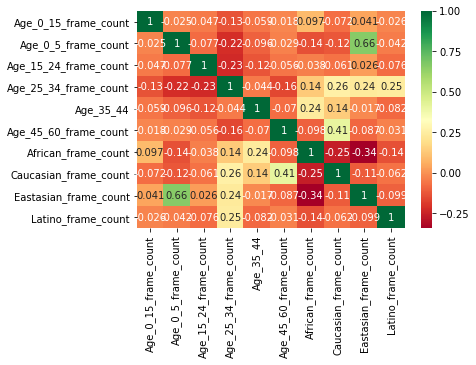

In [17]:
import seaborn as sns
age_ethinicity_col = ['Age_0_15_frame_count', 'Age_0_5_frame_count', 'Age_15_24_frame_count',
       'Age_25_34_frame_count', 'Age_35_44', 'Age_45_60_frame_count','African_frame_count', 'Caucasian_frame_count', 'Eastasian_frame_count',
       'Latino_frame_count']
sns.heatmap(xDF[age_ethinicity_col].corr(method="pearson"),cmap="RdYlGn",annot=True)

<h1> Imputation of Missing values
<h5> Imputing with median values

In [18]:
nullPer(xDF)[nullPer(xDF) != 0].index.values

array(['Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Windows 10_first_ocr',
       'Windows 10_last_ocr', 'Windows 10_total_ocr',
       'Lenovo Yoga 910_first_ocr', 'Lenovo Yoga 910_last_ocr',
       'Lenovo Yoga 910_total_ocr', 'Yoga_first_ocr', 'Yoga_last_ocr',
       'Yoga_total_ocr', 'Surface Pro 4_first_ocr',
       'Surface Pro 4_last_ocr', 'Surface Pro 4_total_ocr',
       'Surface Pro 4, Apple_MacBookAir13_first_ocr',
       'Surface Pro 4, Apple_MacBookAir13_last_ocr',
       'Surface Pro 4, Apple_MacBookAir13_total_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_first_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_last_ocr',
       'Surface Pro 4, MacBook Air13, MacBook Air_total_ocr',
       'Surface Book_first_ocr', 'Surface Book_last_ocr',
       'Surface Book_total_ocr', 'MacBook Pro_first_ocr',
       'MacBook Pro_last_ocr', 'MacBook Pro_total_ocr',
      

In [19]:
import numpy as np

ocr_columns = [col for col in xDF.columns if "ocr" in col]
frame_count_columns = [col for col in xDF.columns if "_frame_count" in col]

xDF[ocr_columns] = xDF[ocr_columns].fillna(-1)
xDF = xDF.replace(np.inf,np.NaN)
xDF[frame_count_columns] = xDF[frame_count_columns].fillna(0)
xDF = xDF.fillna(-1)

In [20]:
#nullPer(xDF)
# imputeMedian(xDF, 'Microsoft_frame_count')
# imputeMedian(xDF, 'Related_Brand_dur')
# imputeMedian(xDF, 'Related_Brand_first_ocr')
# imputeMedian(xDF, 'Related_Brand_last_ocr')
# imputeMedian(xDF, 'Microsoft_total_ocr')

# imputeMedian(yDF, 'Persuasion_score')

#xDF[x].fillna(xDF[x].median(), inplace = True)
                           
# Asus_frame_count                                 
# Dell_frame_count                                 
# Hp_frame_count                                   
# Lenovo_frame_count  

# Windows 10_first_ocr                             
# Windows 10_last_ocr                              
# Windows 10_total_ocr  

# Asus_dur.1                                       
# Dell_dur.1                                       
# Hp_dur.1                                         
# Lenovo_dur
#assert xDF.isnull().sum().sum() == 0, "Check for missing values in feature space"

In [21]:
xDF.isnull().sum().sort_values

<bound method Series.sort_values of Video_name                         0
Software                           0
Length_of_ad_15                    0
Ad_type_tv                         0
Related_Brand_frame_count          0
Related_Brand_dur                  0
Related_Brand_first_ocr            0
Related_Brand_last_ocr             0
Related_Brand_total_ocr            0
Female_frame_count                 0
Male_frame_count                   0
Female_total_duration              0
Male_total_duration                0
Age_0_15_frame_count               0
Age_0_5_frame_count                0
Age_15_24_frame_count              0
Age_25_34_frame_count              0
Age_35_44                          0
Age_45_60_frame_count              0
Age_0_15_total_duration            0
Age_0_5_total_duration             0
Age_15_24_total_duration           0
Age_25_34_total_duration           0
Age_35_44_total_duration           0
Age_45_60_total_duration           0
Angry_frame_count                  0
Di

In [22]:
yDF.isnull().sum()

Unaided_Branding                         0
Q_12_Brand_Cues__Mean                    0
Q_11a_Aided_Branding__Mean               0
Q_7_8_9_Active_Involvement__Mean         0
Q_35_New_Information__Mean               0
Q_6_Enjoyment__Mean                      0
Q_20_Brand_Appeal__Mean                  0
Q_32_Understanding__Mean                 0
Q_33_Relevance_of_Information__Mean      0
Q_34_Credibility_of_Information__Mean    0
Q_35_New_Information__Mean.1             0
Q_36_Brand_Difference__Mean              0
dtype: int64

<h1> Oversampling
<h5> Increasing the sample by creating synthetic samples using SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = {0:200,1:200},random_state=12)

In [24]:
temp_inp_df = pd.concat([xDF,yDF],1).drop(['Video_name','Length_of_ad_15'],1)

In [25]:
X_res, y_res = sm.fit_resample(temp_inp_df,inp_df.Length_of_ad_15)

/home/internbmilap562/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (200) in class 0 will be larger than the number of samples in the majority class (class #0 -> 34)
  n_samples_majority))
/home/internbmilap562/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (200) in class 1 will be larger than the number of samples in the majority class (class #0 -> 34)
  n_samples_majority))


In [26]:
resamp_inputs_df = pd.DataFrame(X_res,columns=temp_inp_df.columns)
resamp_target_df = pd.DataFrame(y_res,columns=['Length_of_ad_15'])
resamp_data_df = pd.concat([resamp_inputs_df,resamp_target_df],1)
resamp_data_df['Video_name'] = inp_df['Video_name']
resamp_inputs_df = resamp_data_df[xDF.columns]
resamp_target_df = resamp_data_df[yDF.columns]
resamp_data_df

,Software,Ad_type_tv,Related_Brand_frame_count,Related_Brand_dur,Related_Brand_first_ocr,Related_Brand_last_ocr,Related_Brand_total_ocr,Female_frame_count,Male_frame_count,Female_total_duration,...,Q_35_New_Information__Mean,Q_6_Enjoyment__Mean,Q_20_Brand_Appeal__Mean,Q_32_Understanding__Mean,Q_33_Relevance_of_Information__Mean,Q_34_Credibility_of_Information__Mean,Q_35_New_Information__Mean.1,Q_36_Brand_Difference__Mean,Length_of_ad_15,Video_name
0,1.000000,1.000000,10.000000,5.000000,23.500000,29.500000,2.000000,9.000000,0.000000,4.500000,...,3.100000,3.830000,4.010000,3.610000,3.240000,4.360000,3.100000,4.090000,0,Angela - SW Win 10 30 TV US
1,1.000000,1.000000,8.000000,4.000000,11.000000,16.000000,2.000000,4.000000,0.000000,2.000000,...,2.970000,3.890000,4.040000,3.530000,3.200000,4.360000,2.970000,4.060000,1,Angela Inking - SW Win 10 15 TV US
2,1.000000,1.000000,8.000000,4.000000,11.000000,16.000000,2.000000,3.000000,0.000000,1.500000,...,3.050000,3.850000,3.900000,3.520000,3.360000,4.350000,3.050000,3.960000,1,Angela Versatility - SW Win 10 15 TV US
3,0.000000,1.000000,7.000000,3.500000,1.000000,29.500000,3.000000,10.000000,0.000000,5.000000,...,3.110000,3.710000,4.050000,3.430000,3.270000,4.280000,3.110000,4.080000,0,Ariela - Surface SP4 30 TV US
4,1.000000,1.000000,4.000000,2.000000,26.500000,30.000000,2.000000,0.000000,20.000000,0.000000,...,2.950000,3.590000,4.020000,3.510000,3.130000,4.200000,2.950000,3.890000,0,Beowulf - SW Win 10 30 TV US
5,1.000000,1.000000,9.000000,4.500000,11.000000,16.500000,2.000000,0.000000,6.000000,0.000000,...,2.870000,3.520000,3.880000,3.580000,3.000000,4.160000,2.870000,3.750000,1,Beowulf Pen - SW Win 10 15 TV US
6,1.000000,1.000000,9.000000,4.500000,11.000000,16.500000,2.000000,0.000000,4.000000,0.000000,...,2.960000,3.720000,3.940000,3.640000,3.270000,4.270000,2.960000,3.910000,1,Beowulf Versatility - SW Win 10 15 TV US
7,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,12.000000,0.000000,...,3.010000,3.750000,4.050000,3.530000,3.210000,4.230000,3.010000,3.790000,0,Best Buy No VO - SW HP 30 TV US
8,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,10.000000,0.000000,...,2.940000,3.790000,3.920000,3.580000,3.210000,4.260000,2.940000,3.840000,0,Best Buy No VO - SW HP Computers 30 TV US
9,1.000000,1.000000,12.000000,6.000000,17.500000,30.000000,4.000000,0.000000,12.000000,0.000000,...,3.010000,3.890000,4.070000,3.650000,3.400000,4.390000,3.010000,4.000000,0,Best Buy No VO - SW Win 10 30 TV US


<h1> XGBoost model

<h2> Hyper parameter search

In [36]:
#####
parameters_tree={"colsample_bytree":[0.2,0.4,0.6,0.8,1],"max_depth":[2,3,4,5,6,8,10,13,14],"min_samples_leaf":[2,3,4],"n_estimators":[100,150,200,300,400,600]}
parameters_learning = {"learning_rate":[0.001,0.01,0.1],"alpha":[1,10,100,1000]}
param_estimators ={"n_estimators":[600,800,1000,2000]}

In [37]:
#### RMSE was decreasing with increaasing n_estimators
Unaided_Branding_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 350,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Brand_mean_cues_params = {'colsample_bytree': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Aided_Branding__Mean_params ={'colsample_bytree': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 1000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Active_Involvement__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":1}
Enjoyment__Mean_params= {'colsample_bytree': 0.4, 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Brand_Appeal__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.1,"reg_lambda":100}
Understanding__Mean_params = {'colsample_bytree': 0.6, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.1,"reg_lambda":1}
Relevance_of_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 600,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}
Credibility_of_Information__Mean_params = {'colsample_bytree': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":10,"learning_rate":0.01,"reg_lambda":0.01}
# New_Information__Mean_params = {'colsample_bytree': 0.4, 'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 10000,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01}
Brand_Difference__Mean_params= {'colsample_bytree': 0.2, 'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 700,"objective":'reg:linear',"silent":False,"alpha":1,"learning_rate":0.01,"reg_lambda":1}

In [38]:
training_params=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


R2_SCORE (training set): 0.982018
R2_SCORE (cross validation set): 0.945715


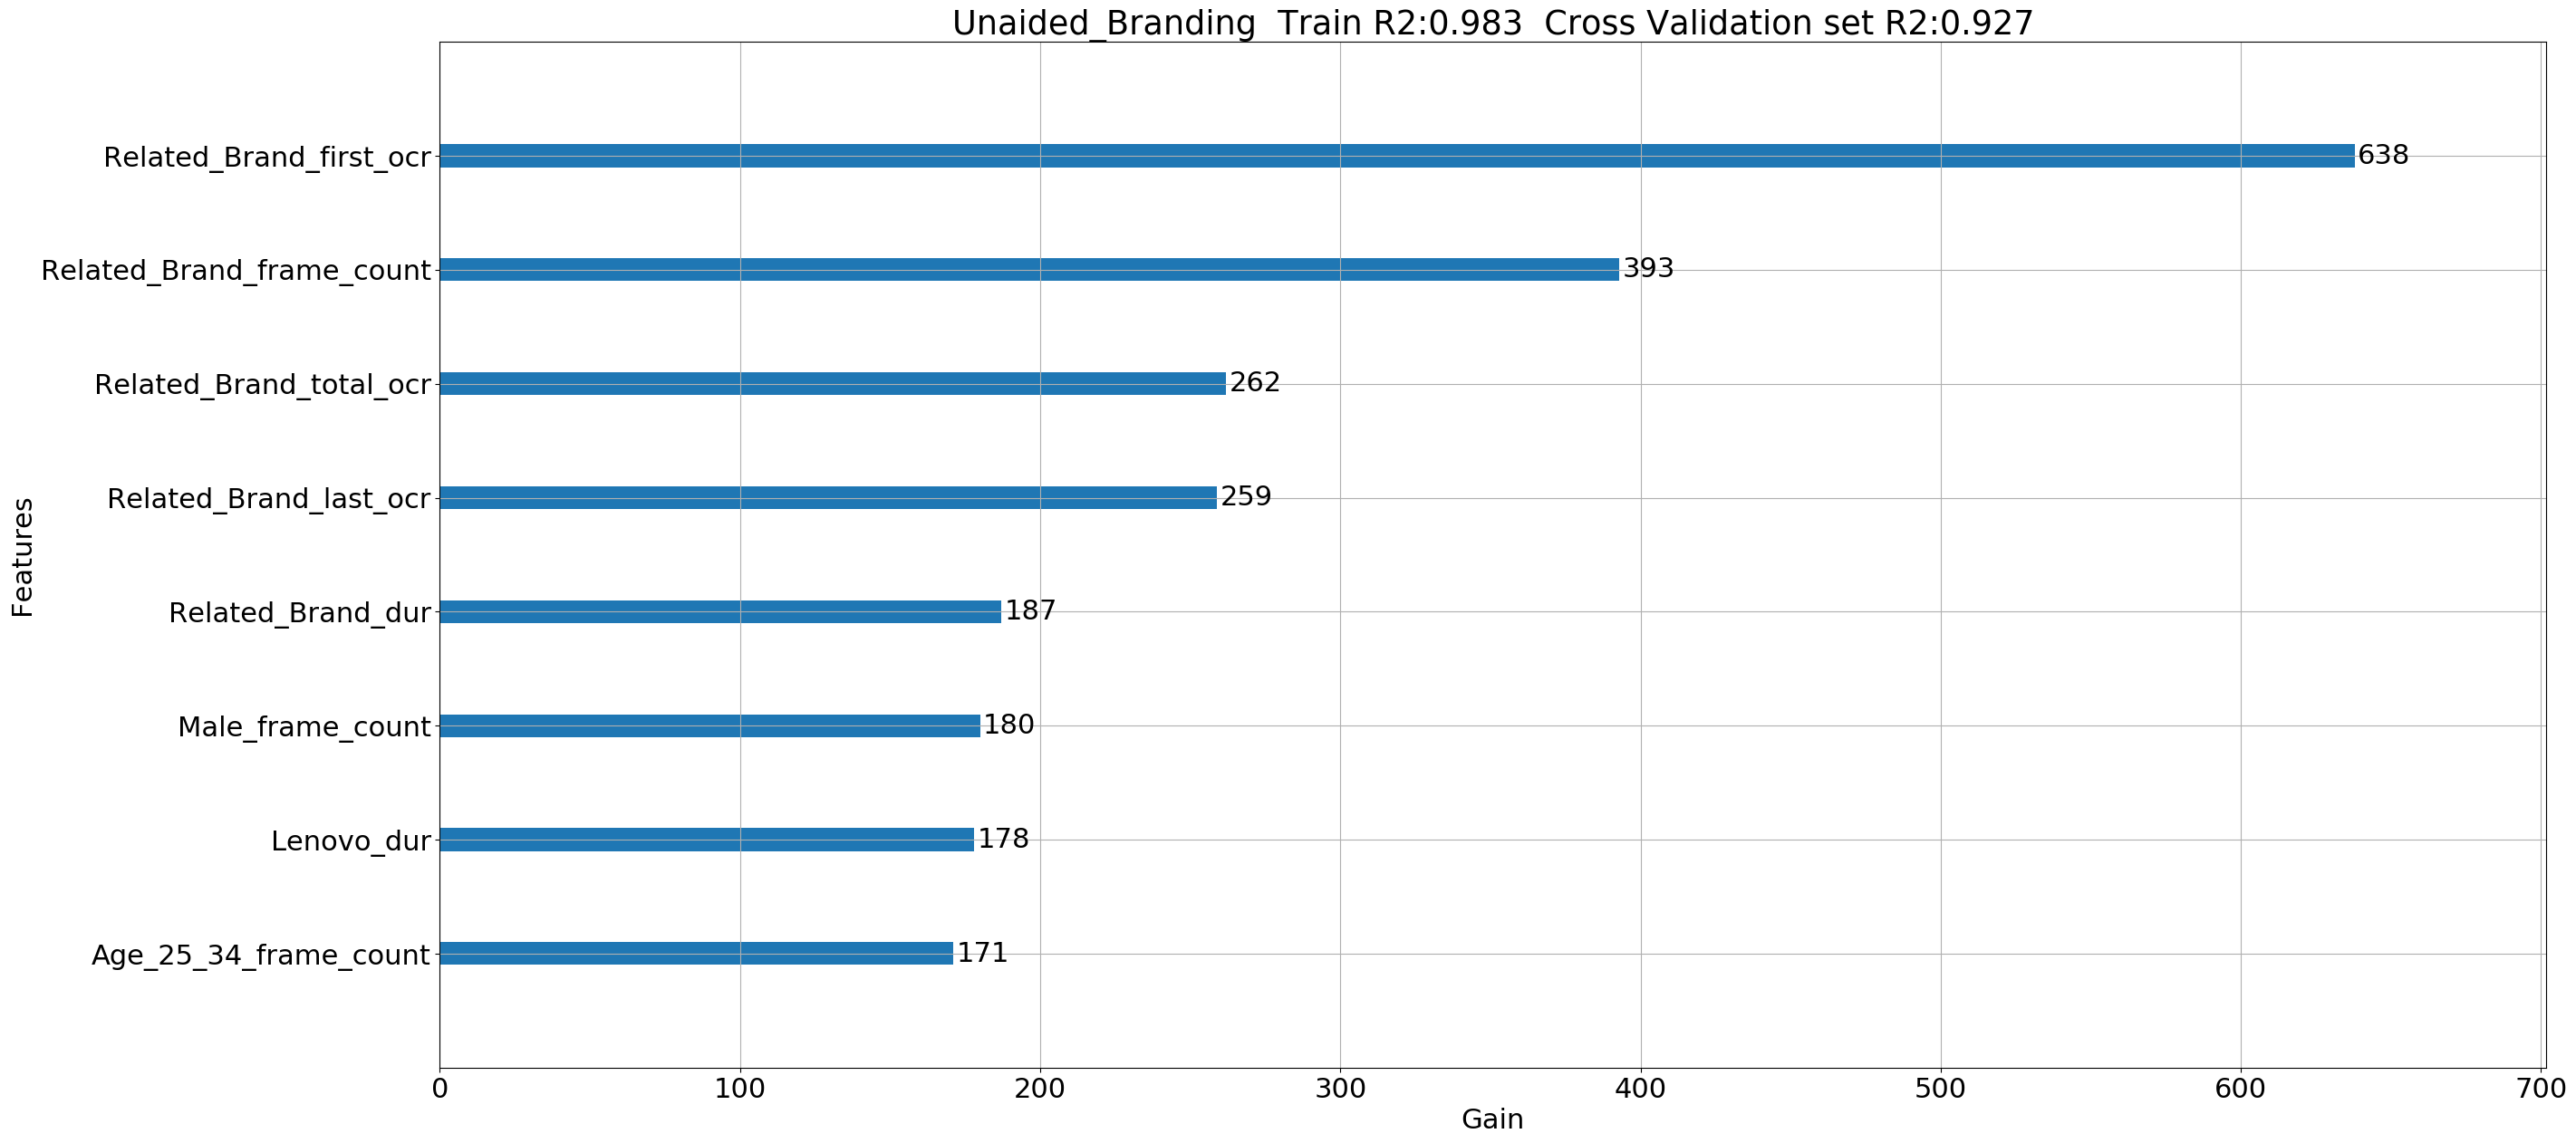

Q_12_Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


R2_SCORE (training set): 0.998567
R2_SCORE (cross validation set): 0.934430


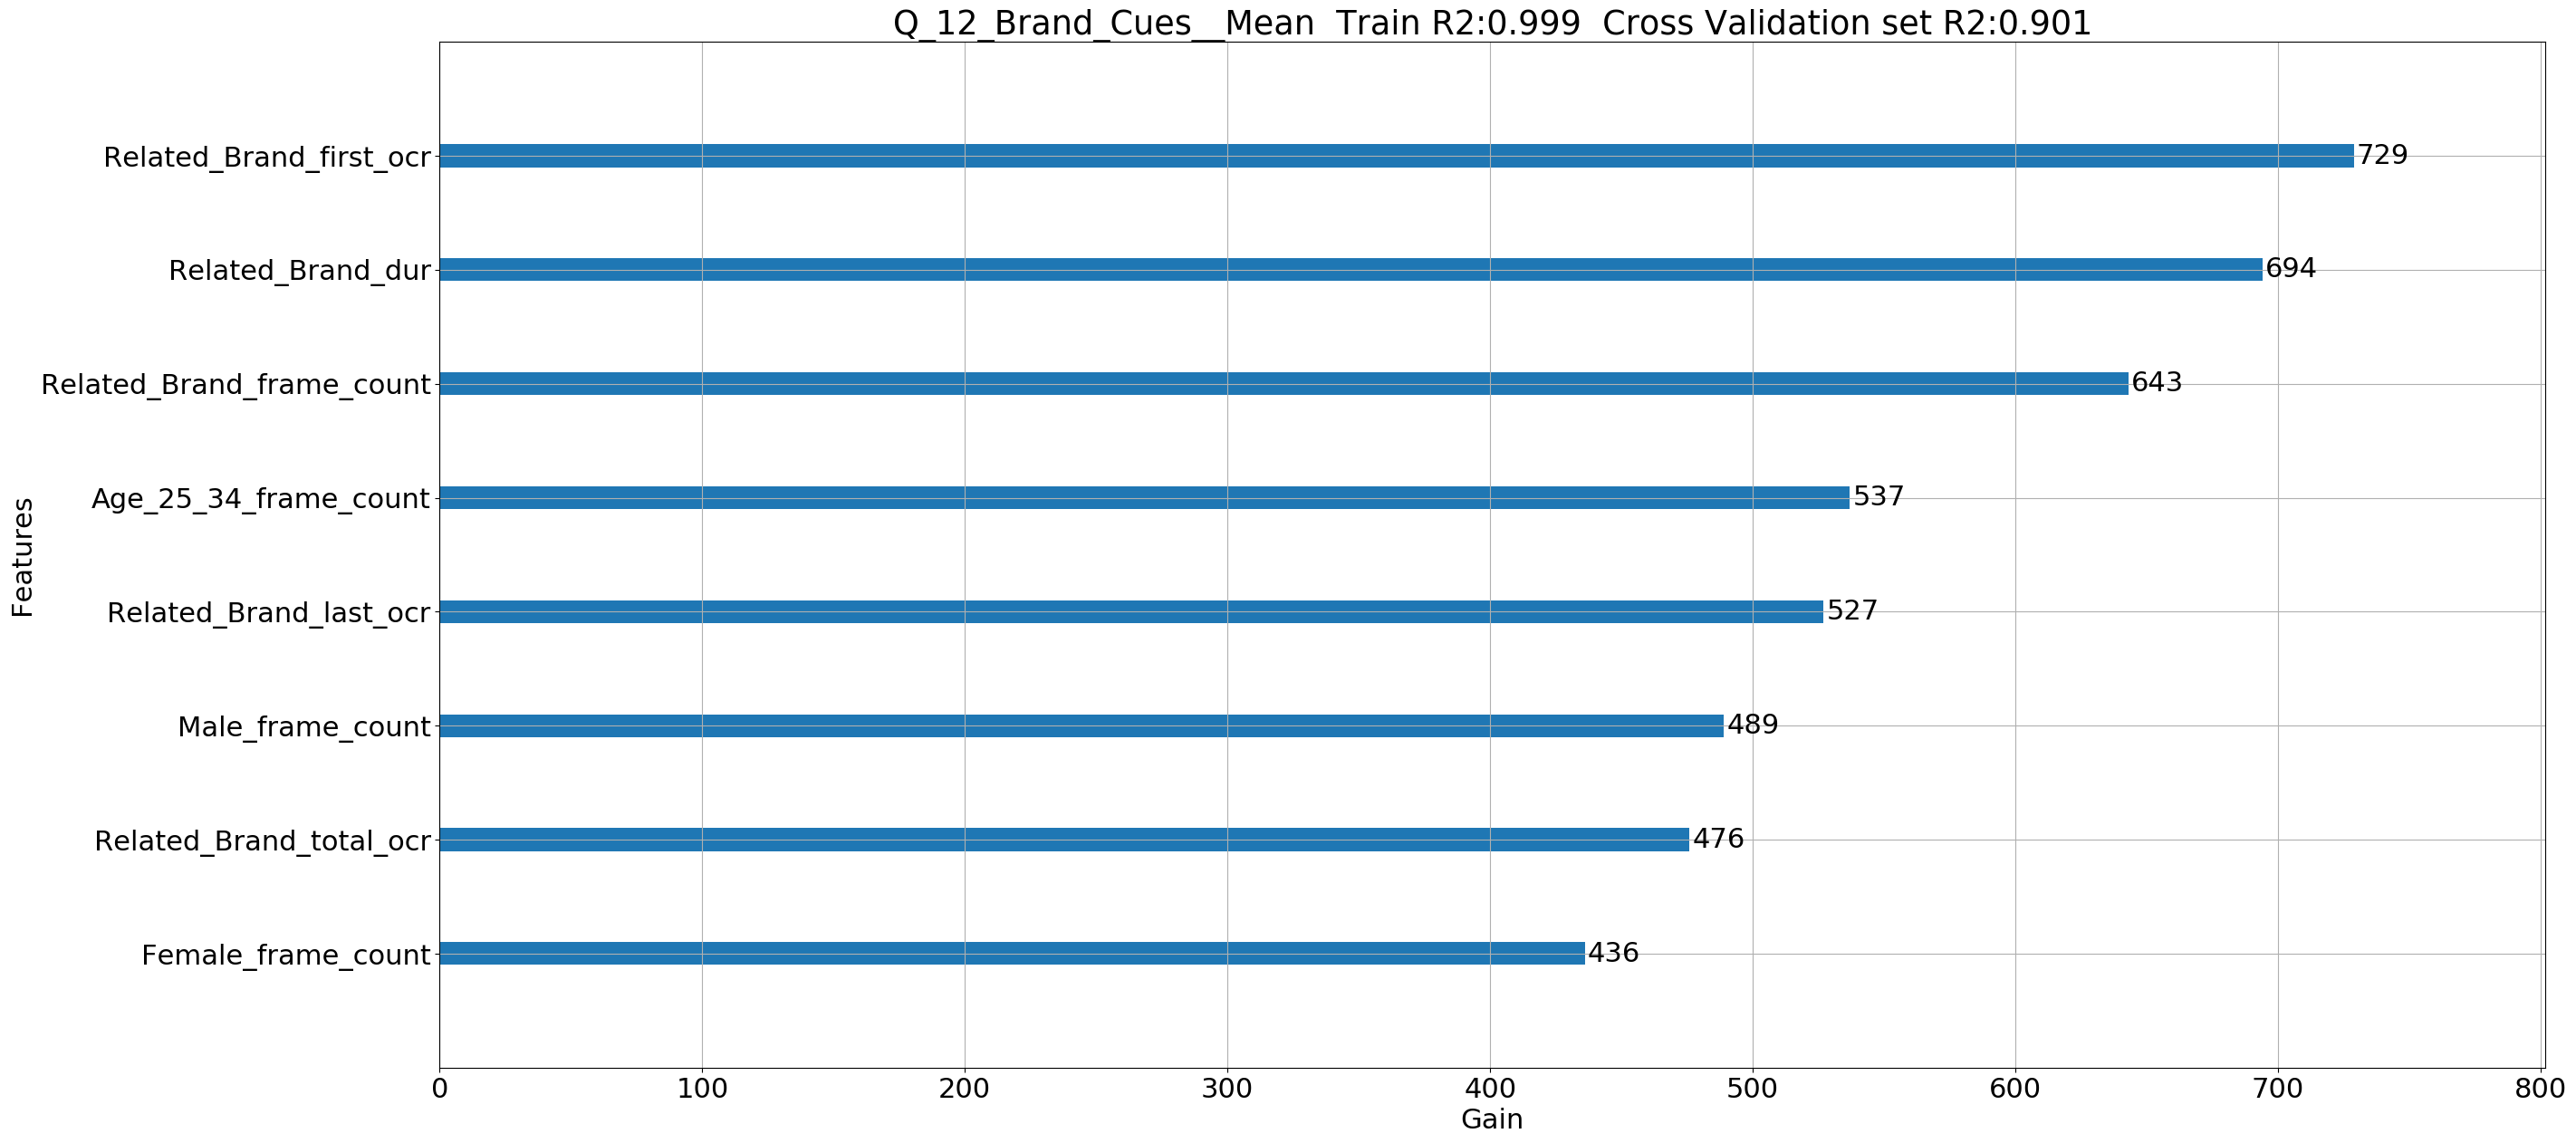

Q_11a_Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


R2_SCORE (training set): 0.991433
R2_SCORE (cross validation set): 0.941984


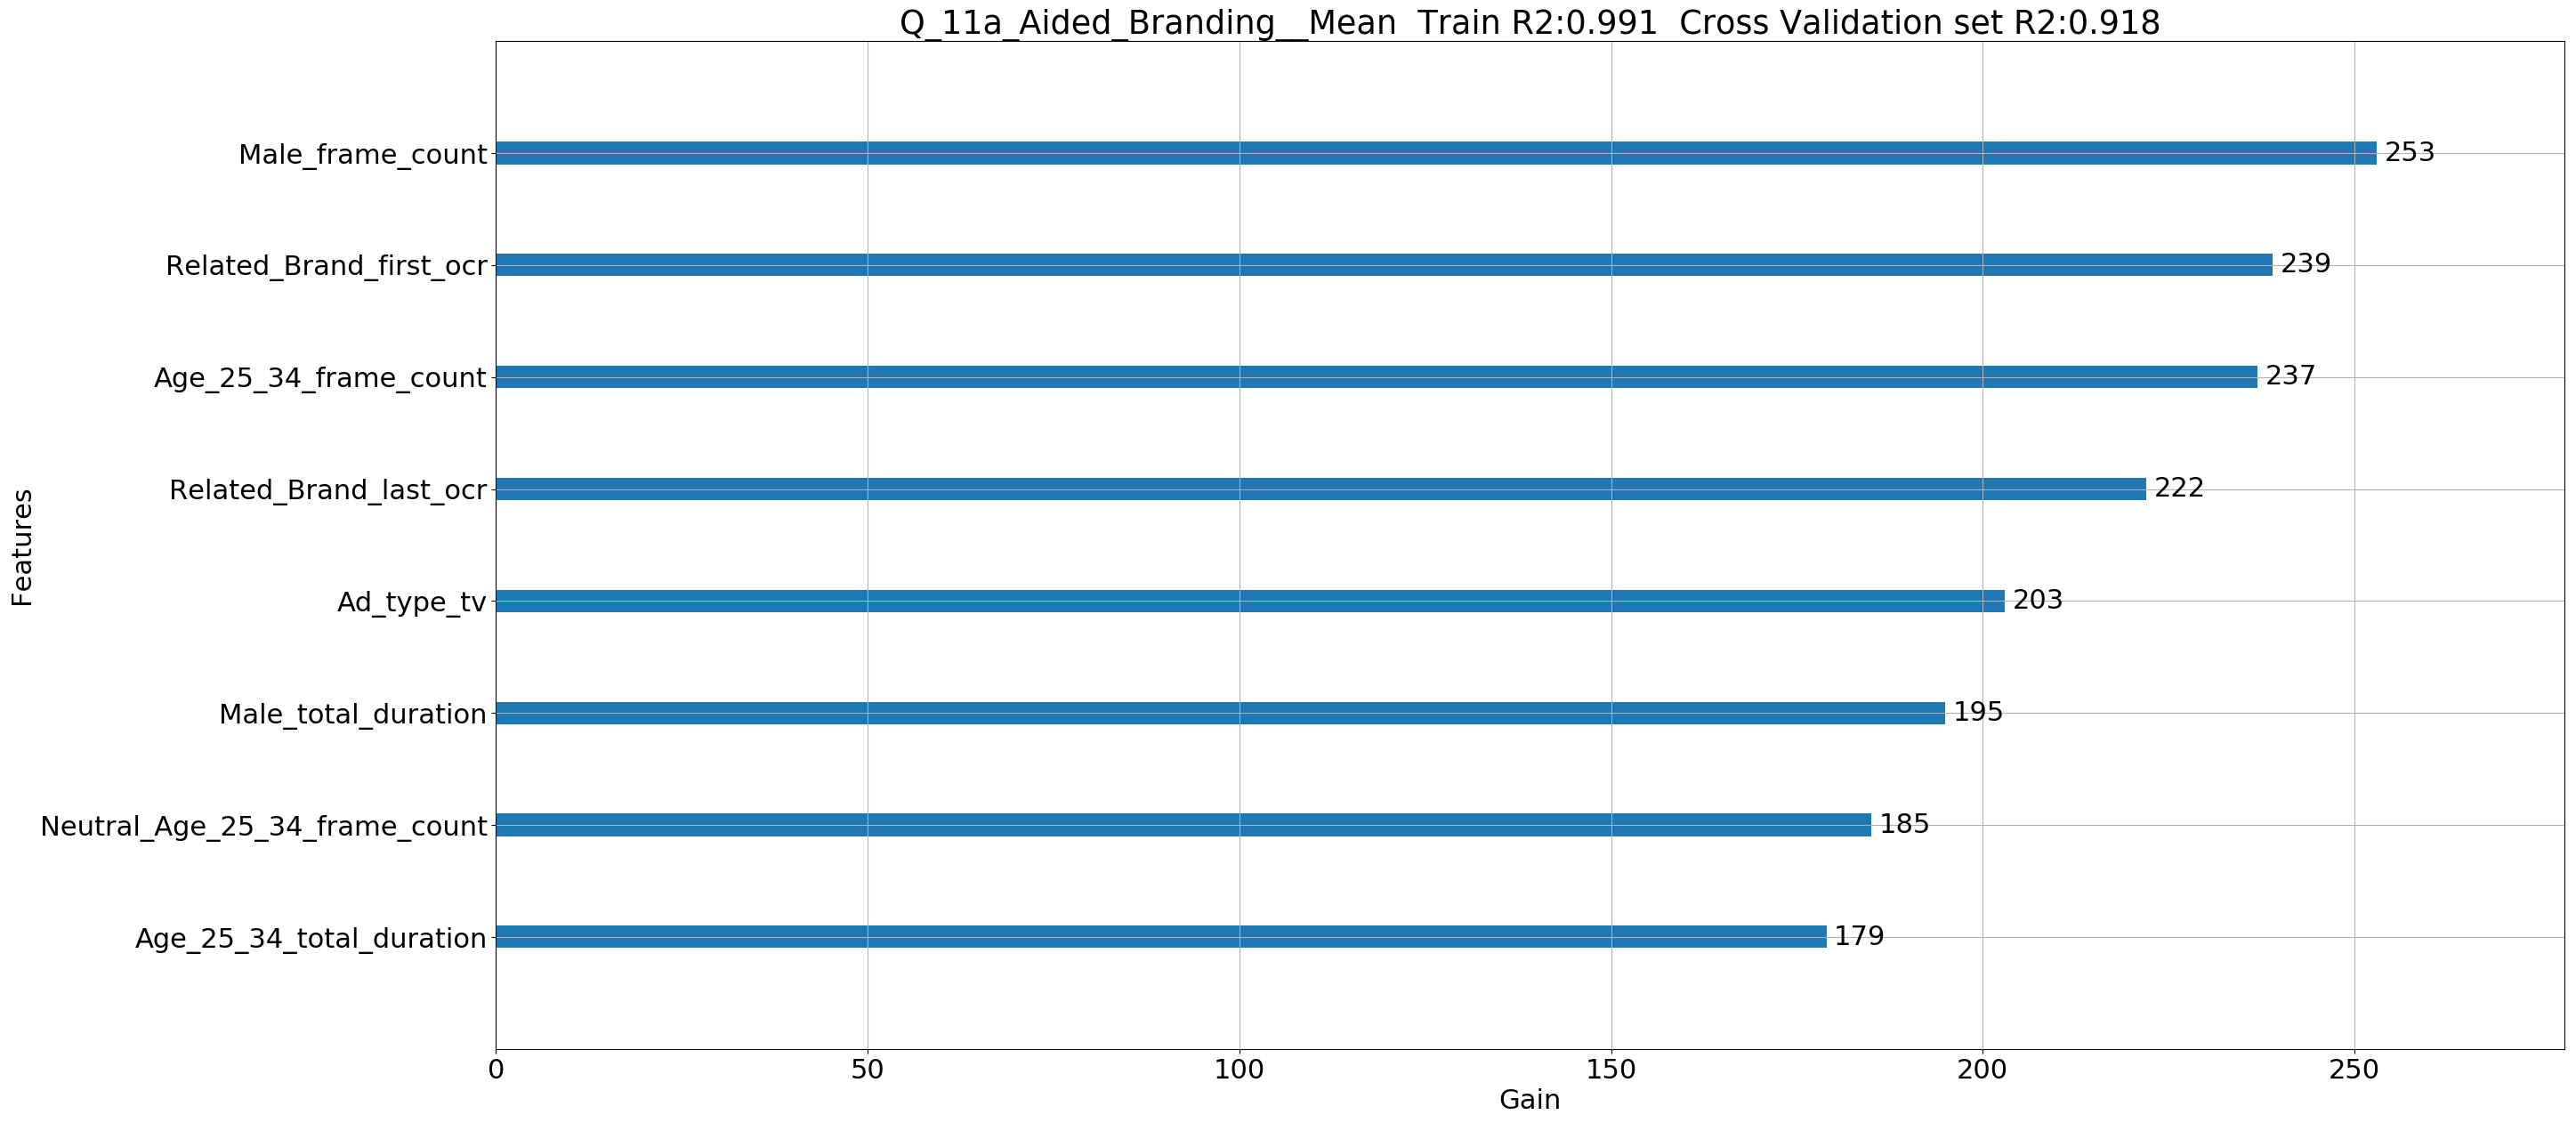

Q_7_8_9_Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


R2_SCORE (training set): 0.987640
R2_SCORE (cross validation set): 0.913879


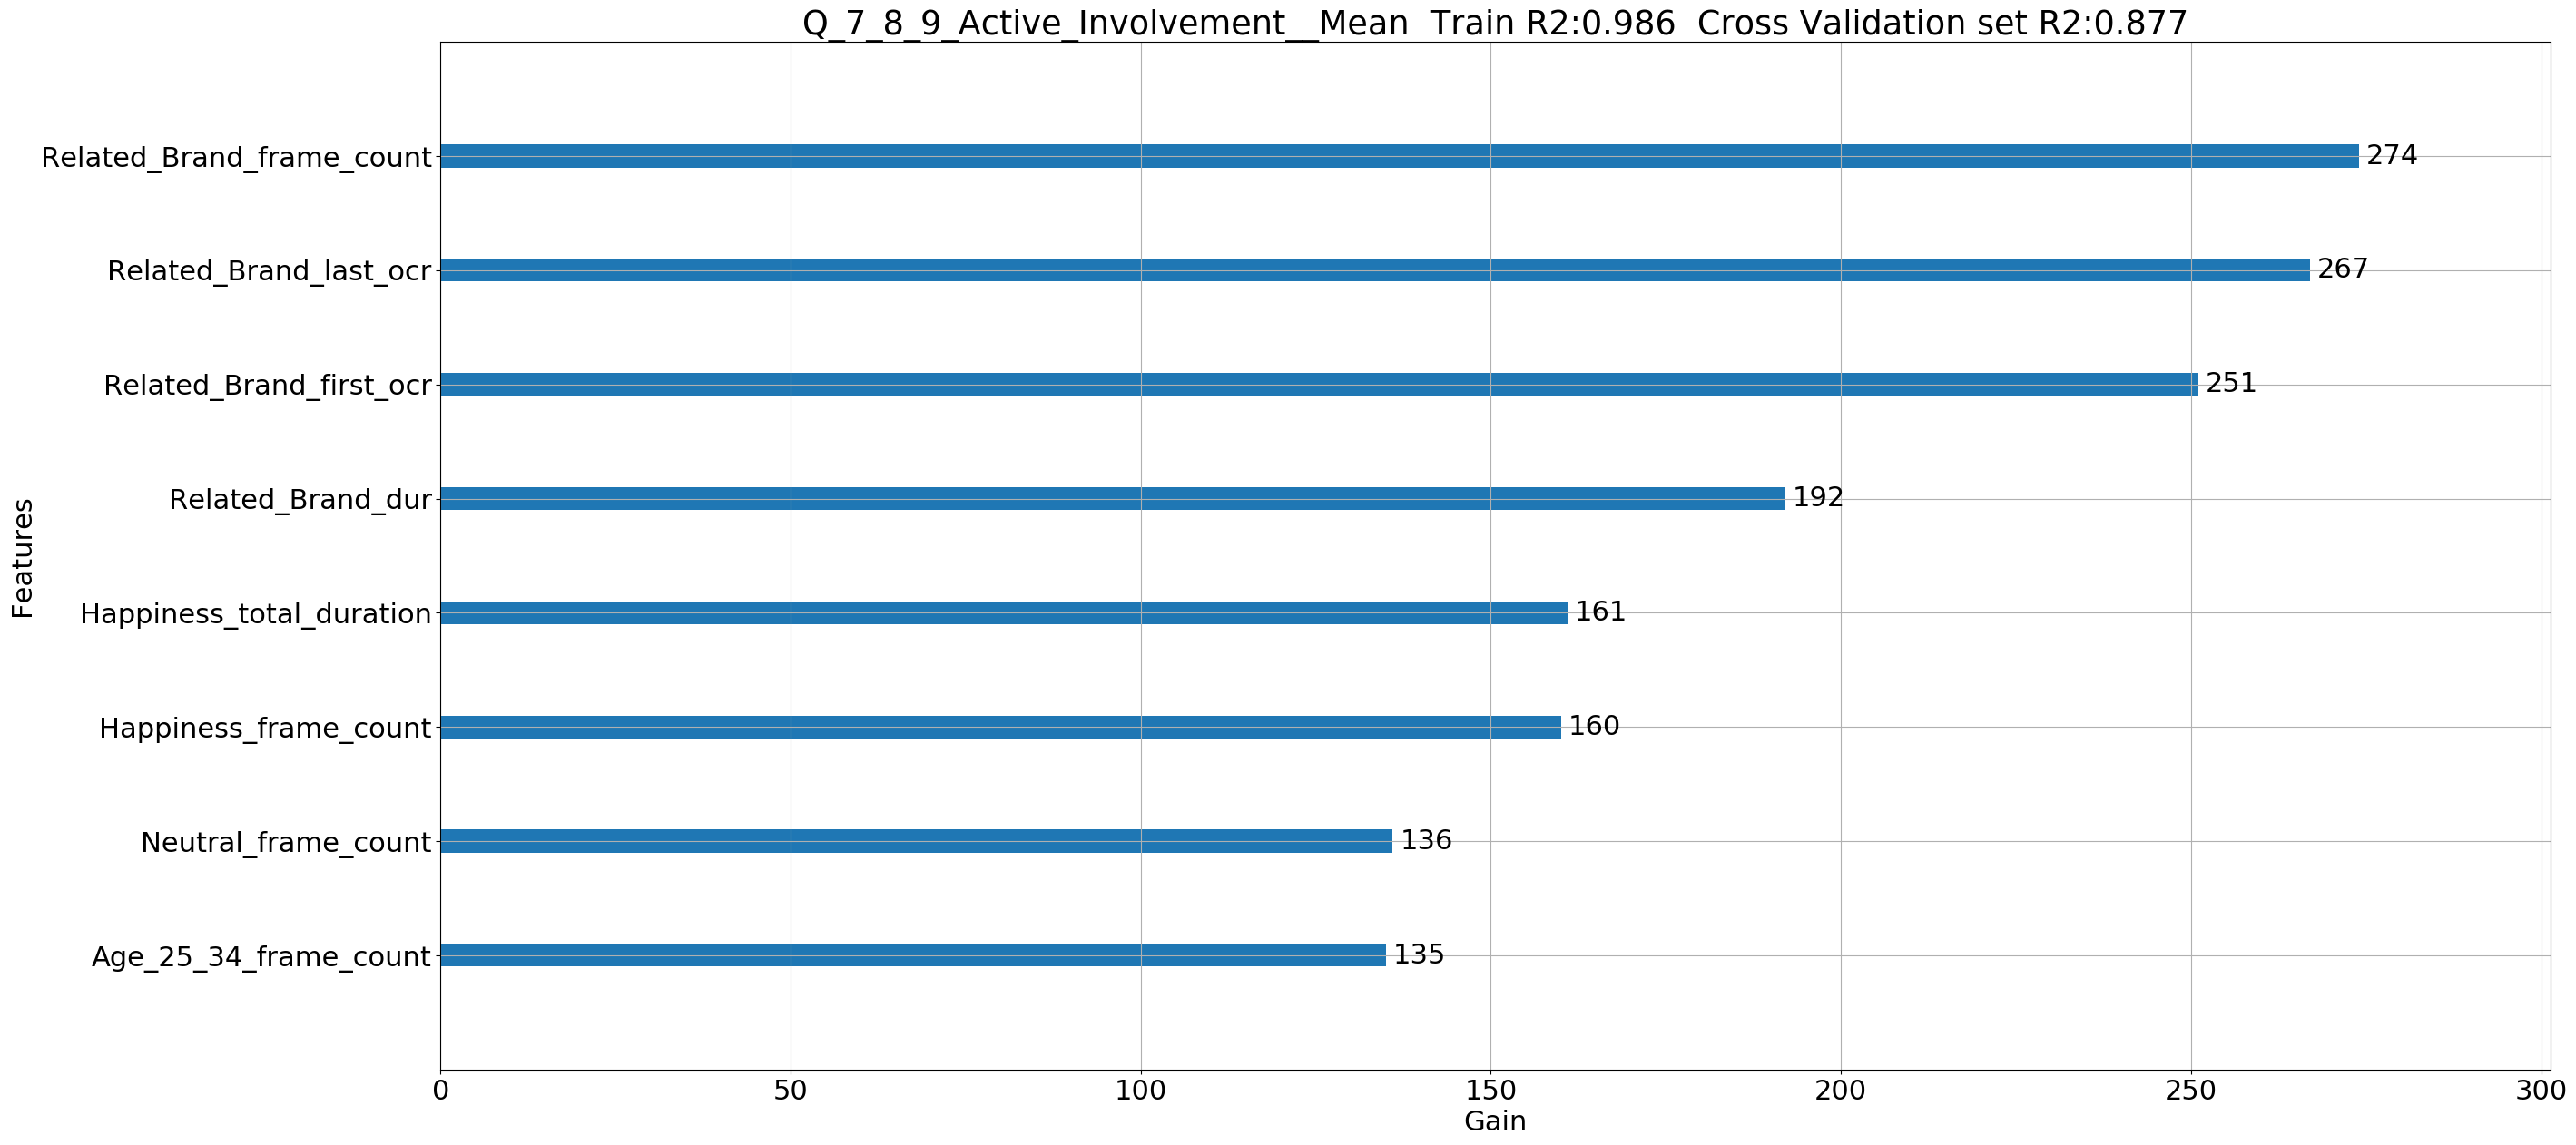

Q_35_New_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


R2_SCORE (training set): 0.997888
R2_SCORE (cross validation set): 0.958576


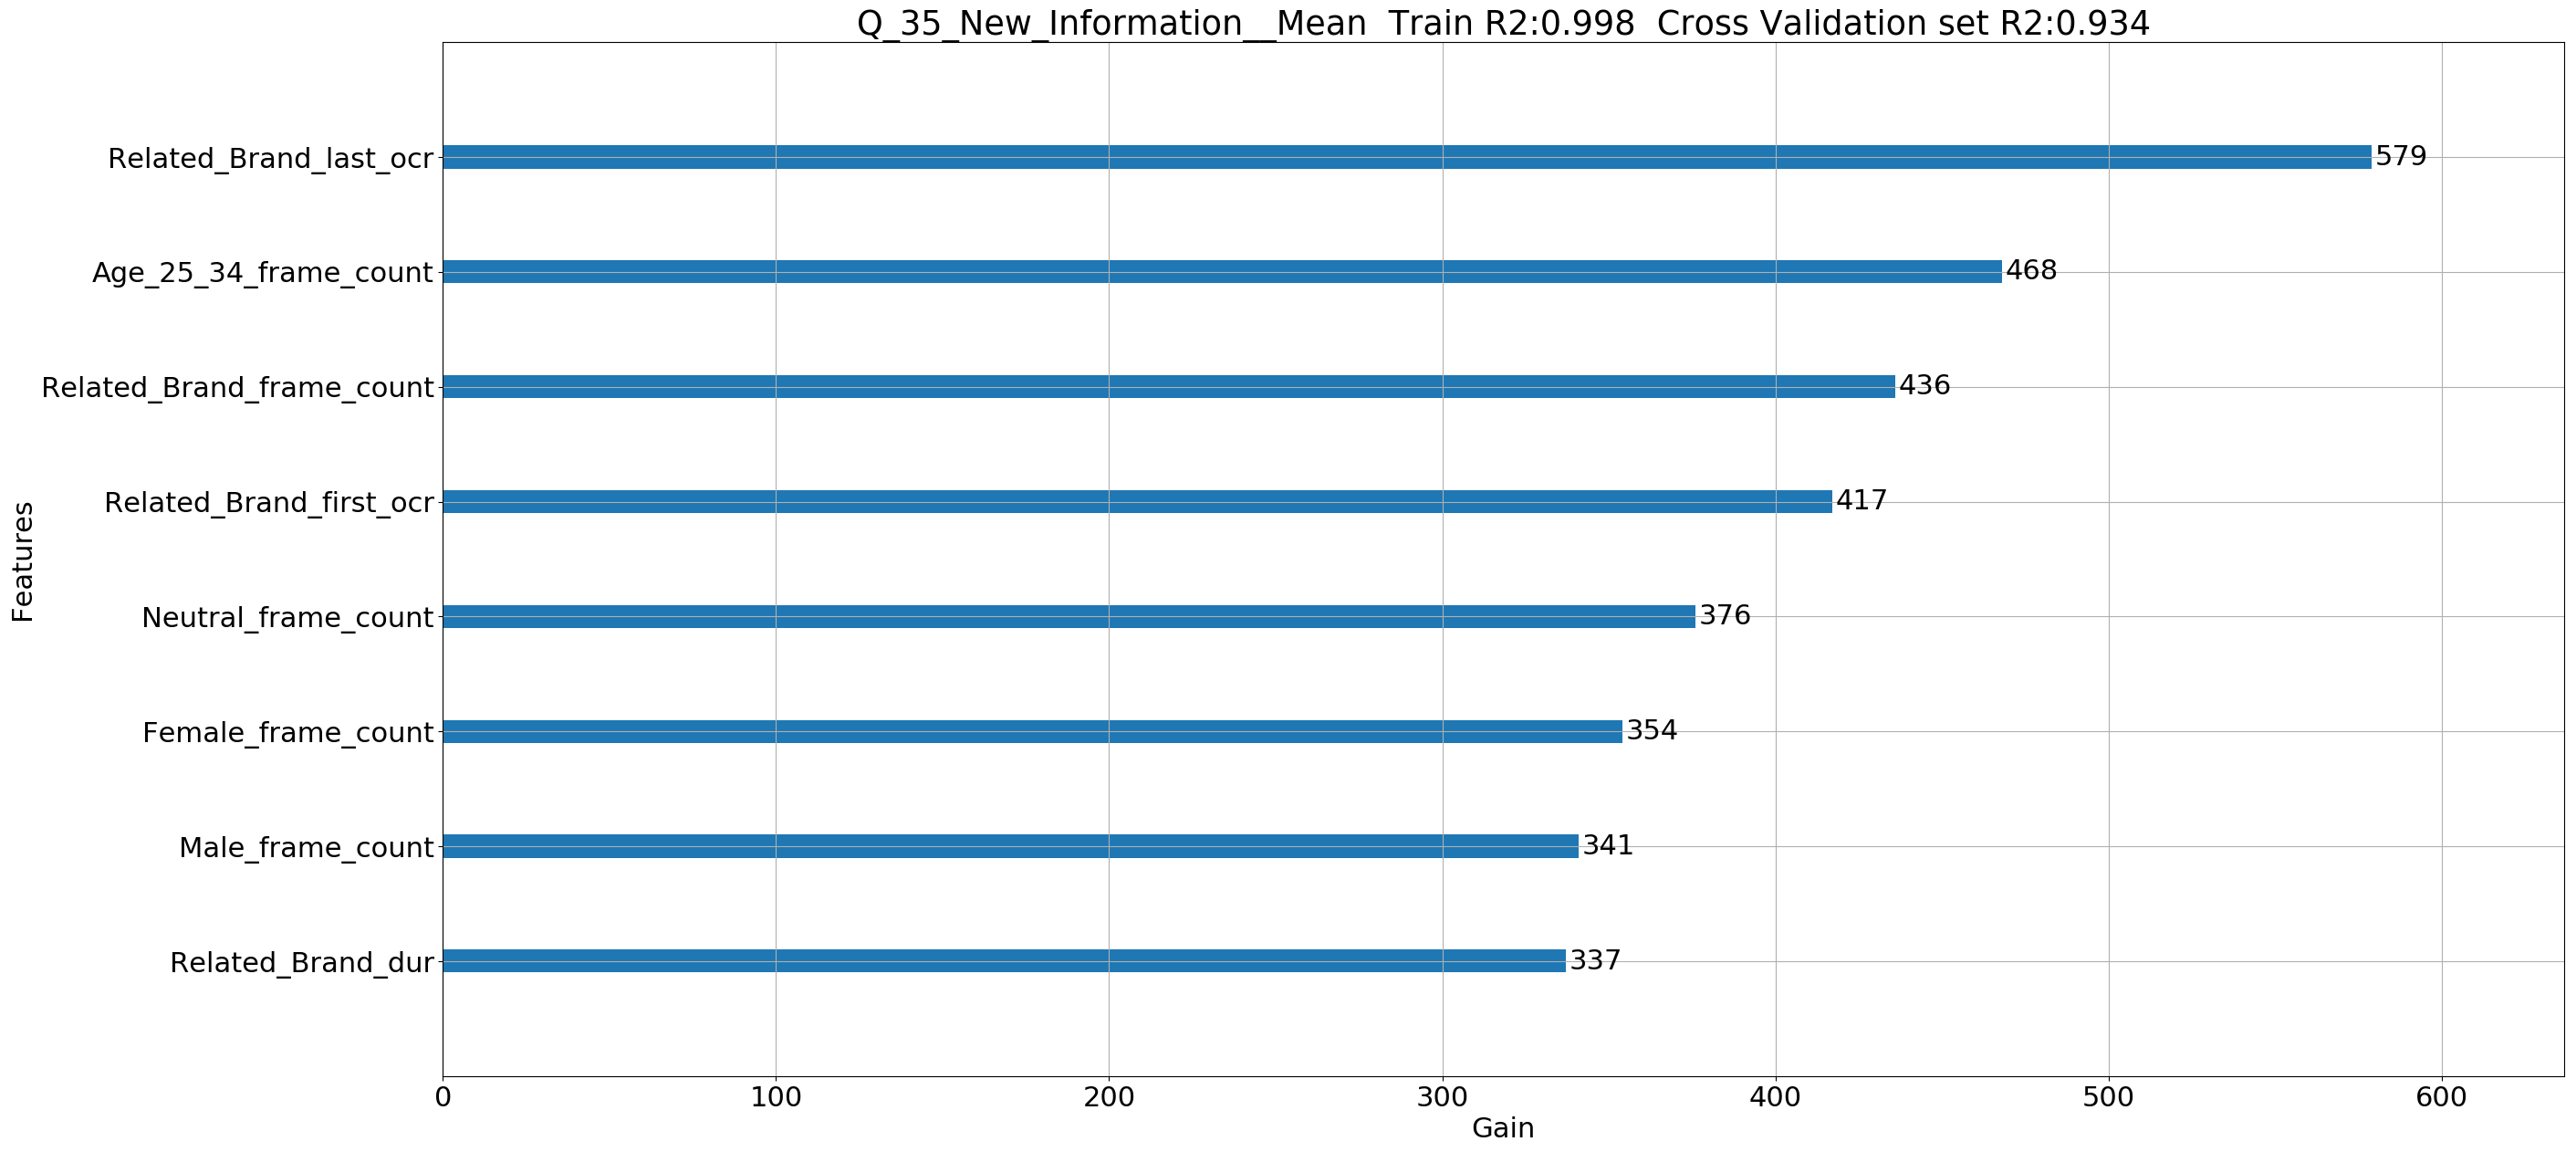

Q_6_Enjoyment__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


R2_SCORE (training set): 0.973638
R2_SCORE (cross validation set): 0.929807


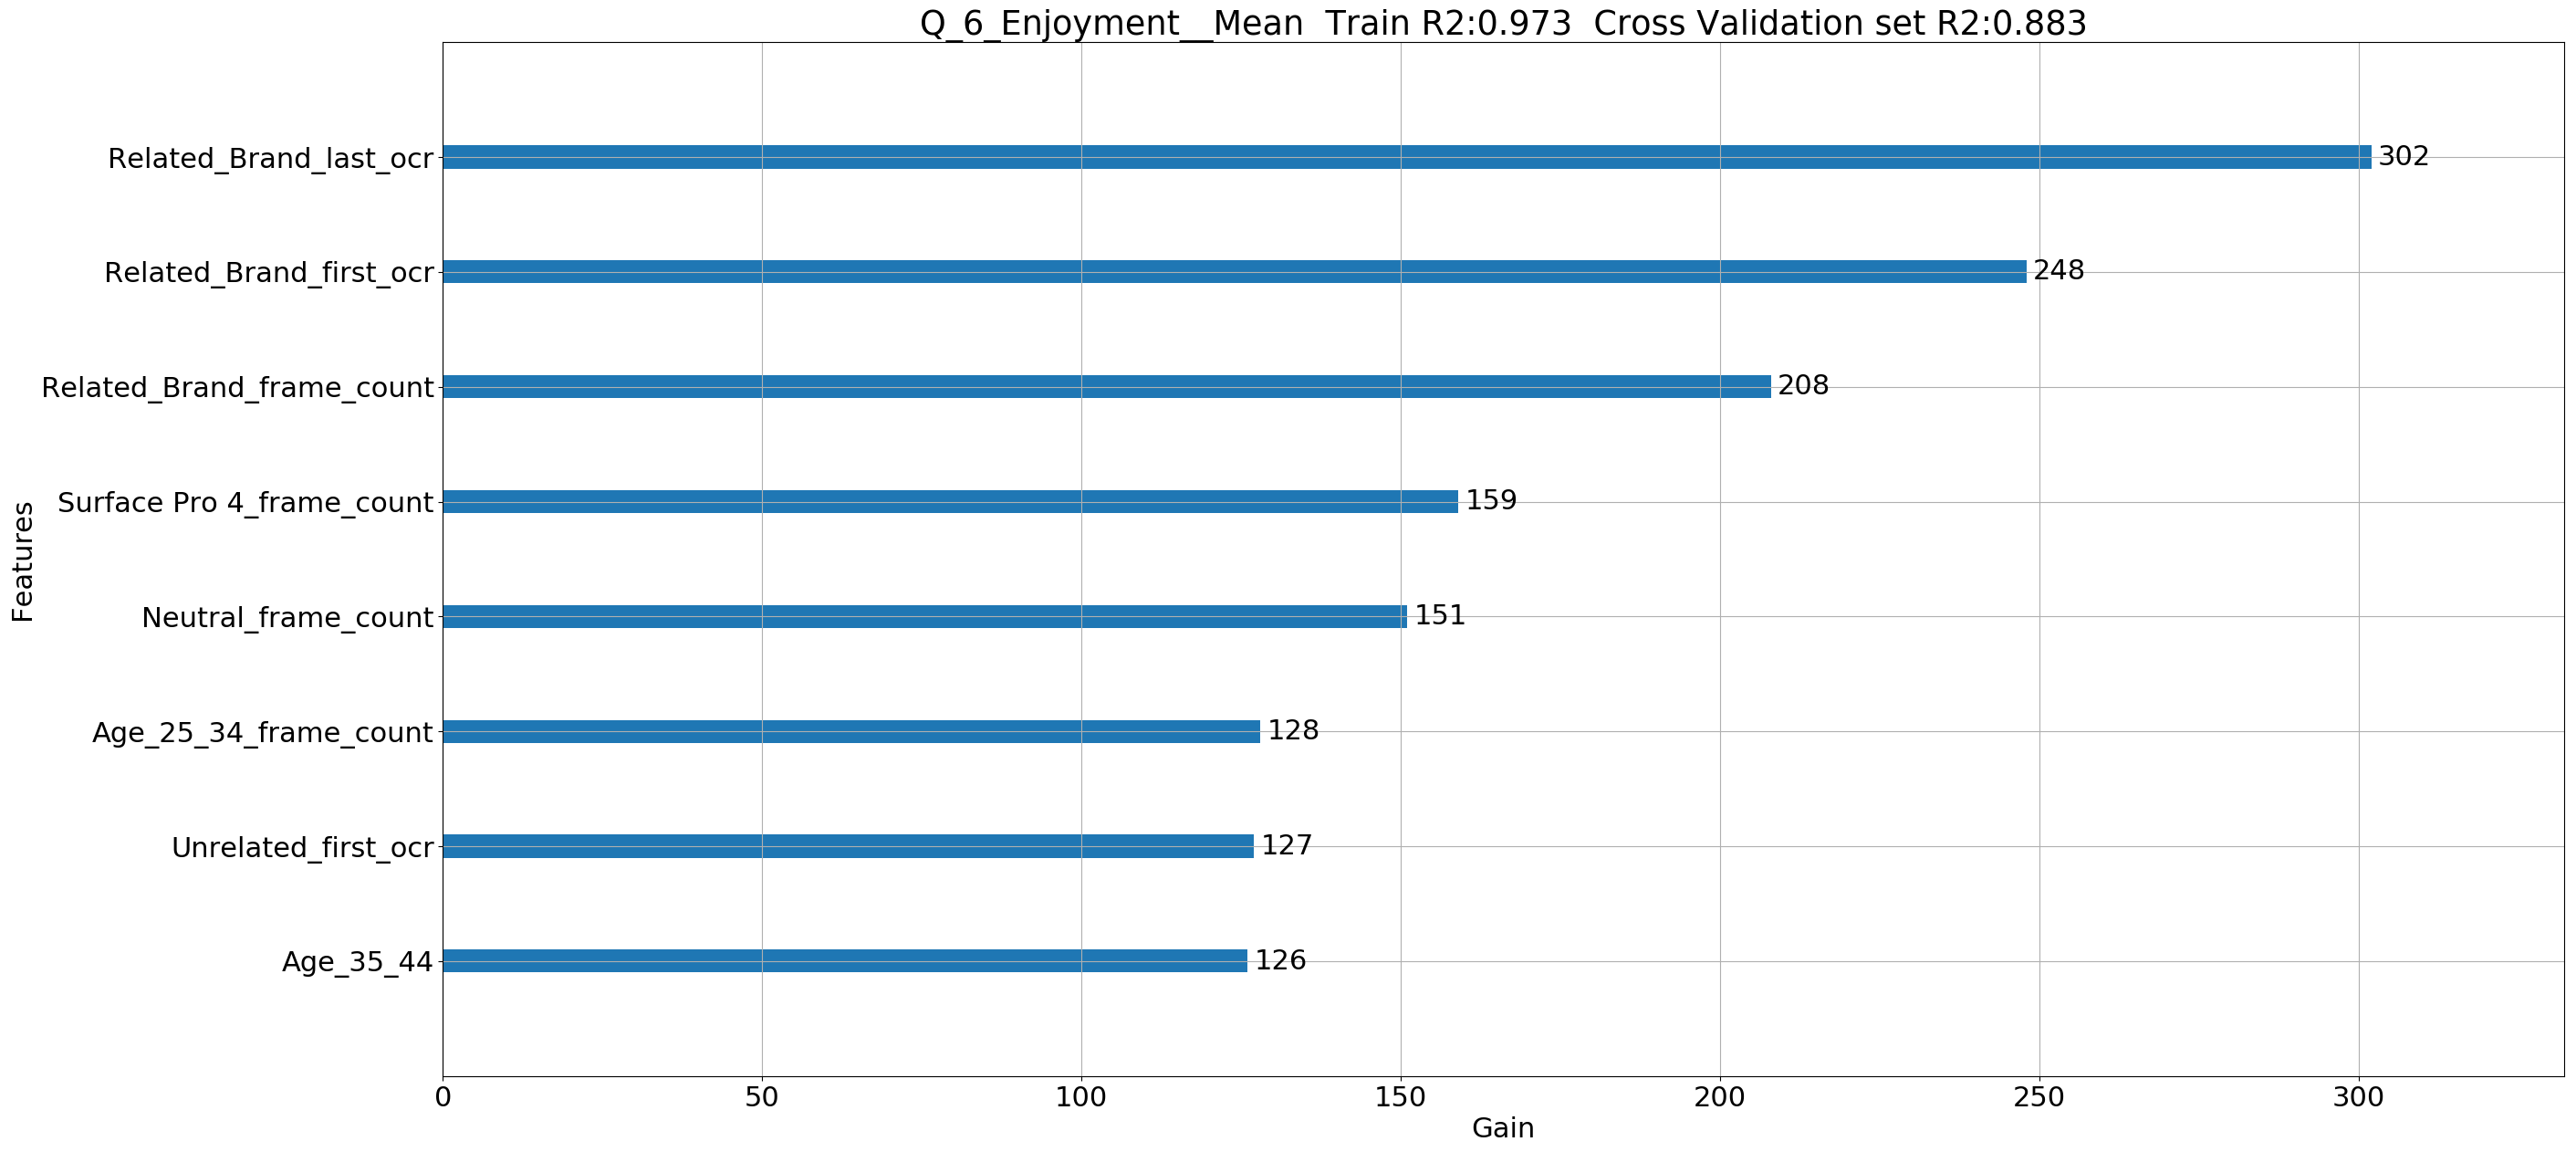

Q_20_Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


R2_SCORE (training set): 0.998584
R2_SCORE (cross validation set): 0.960769


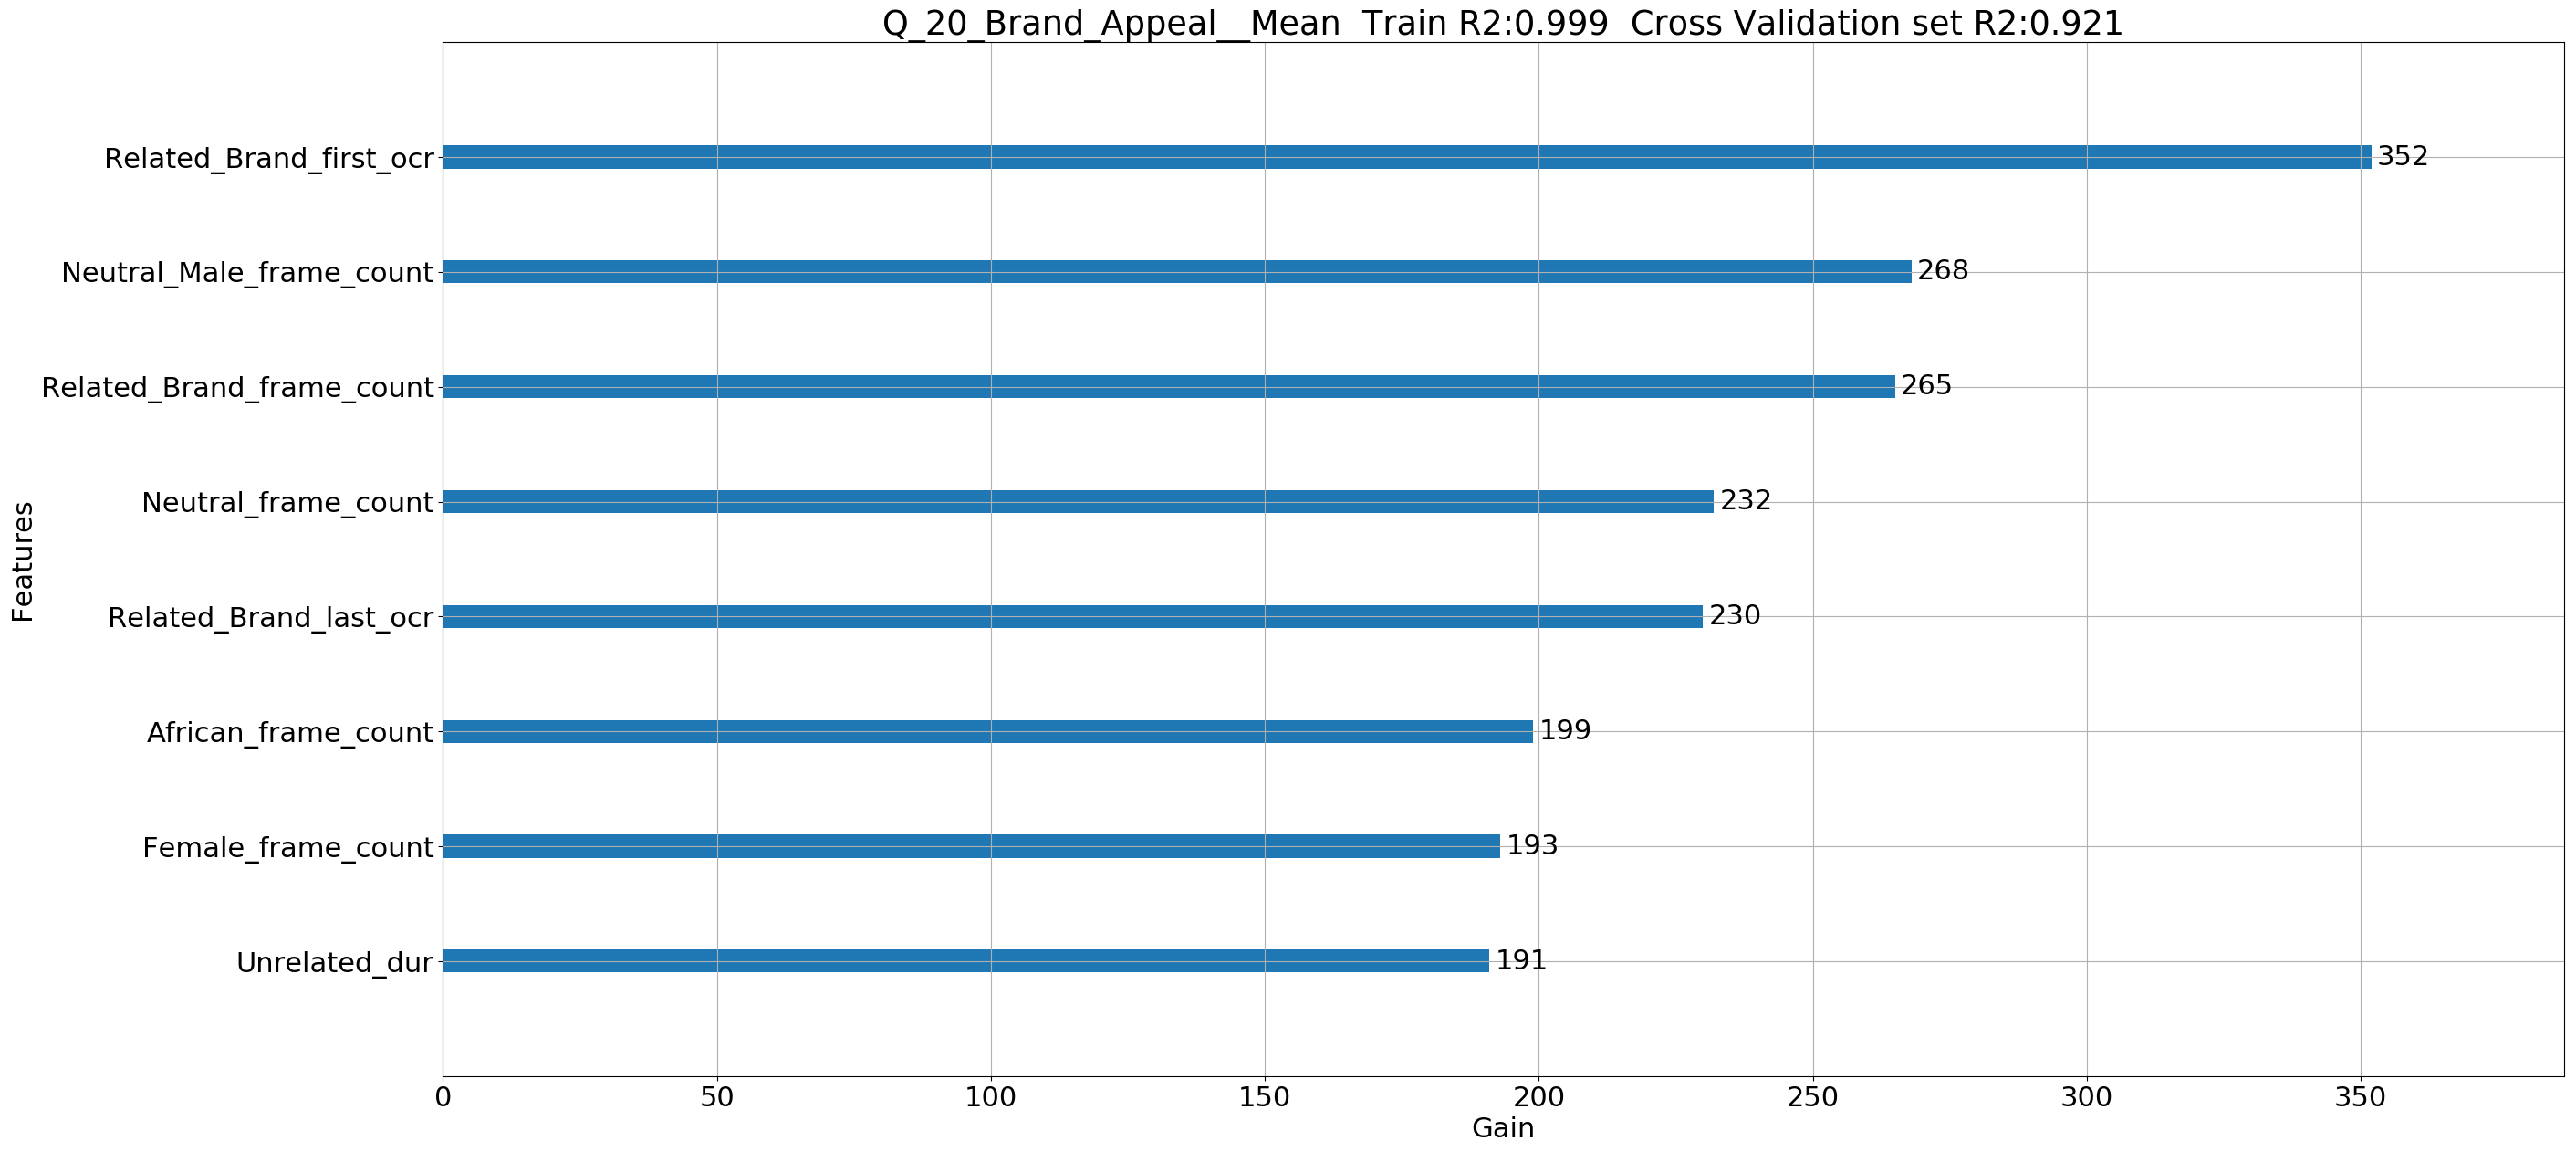

Q_32_Understanding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


R2_SCORE (training set): 0.999848
R2_SCORE (cross validation set): 0.895214


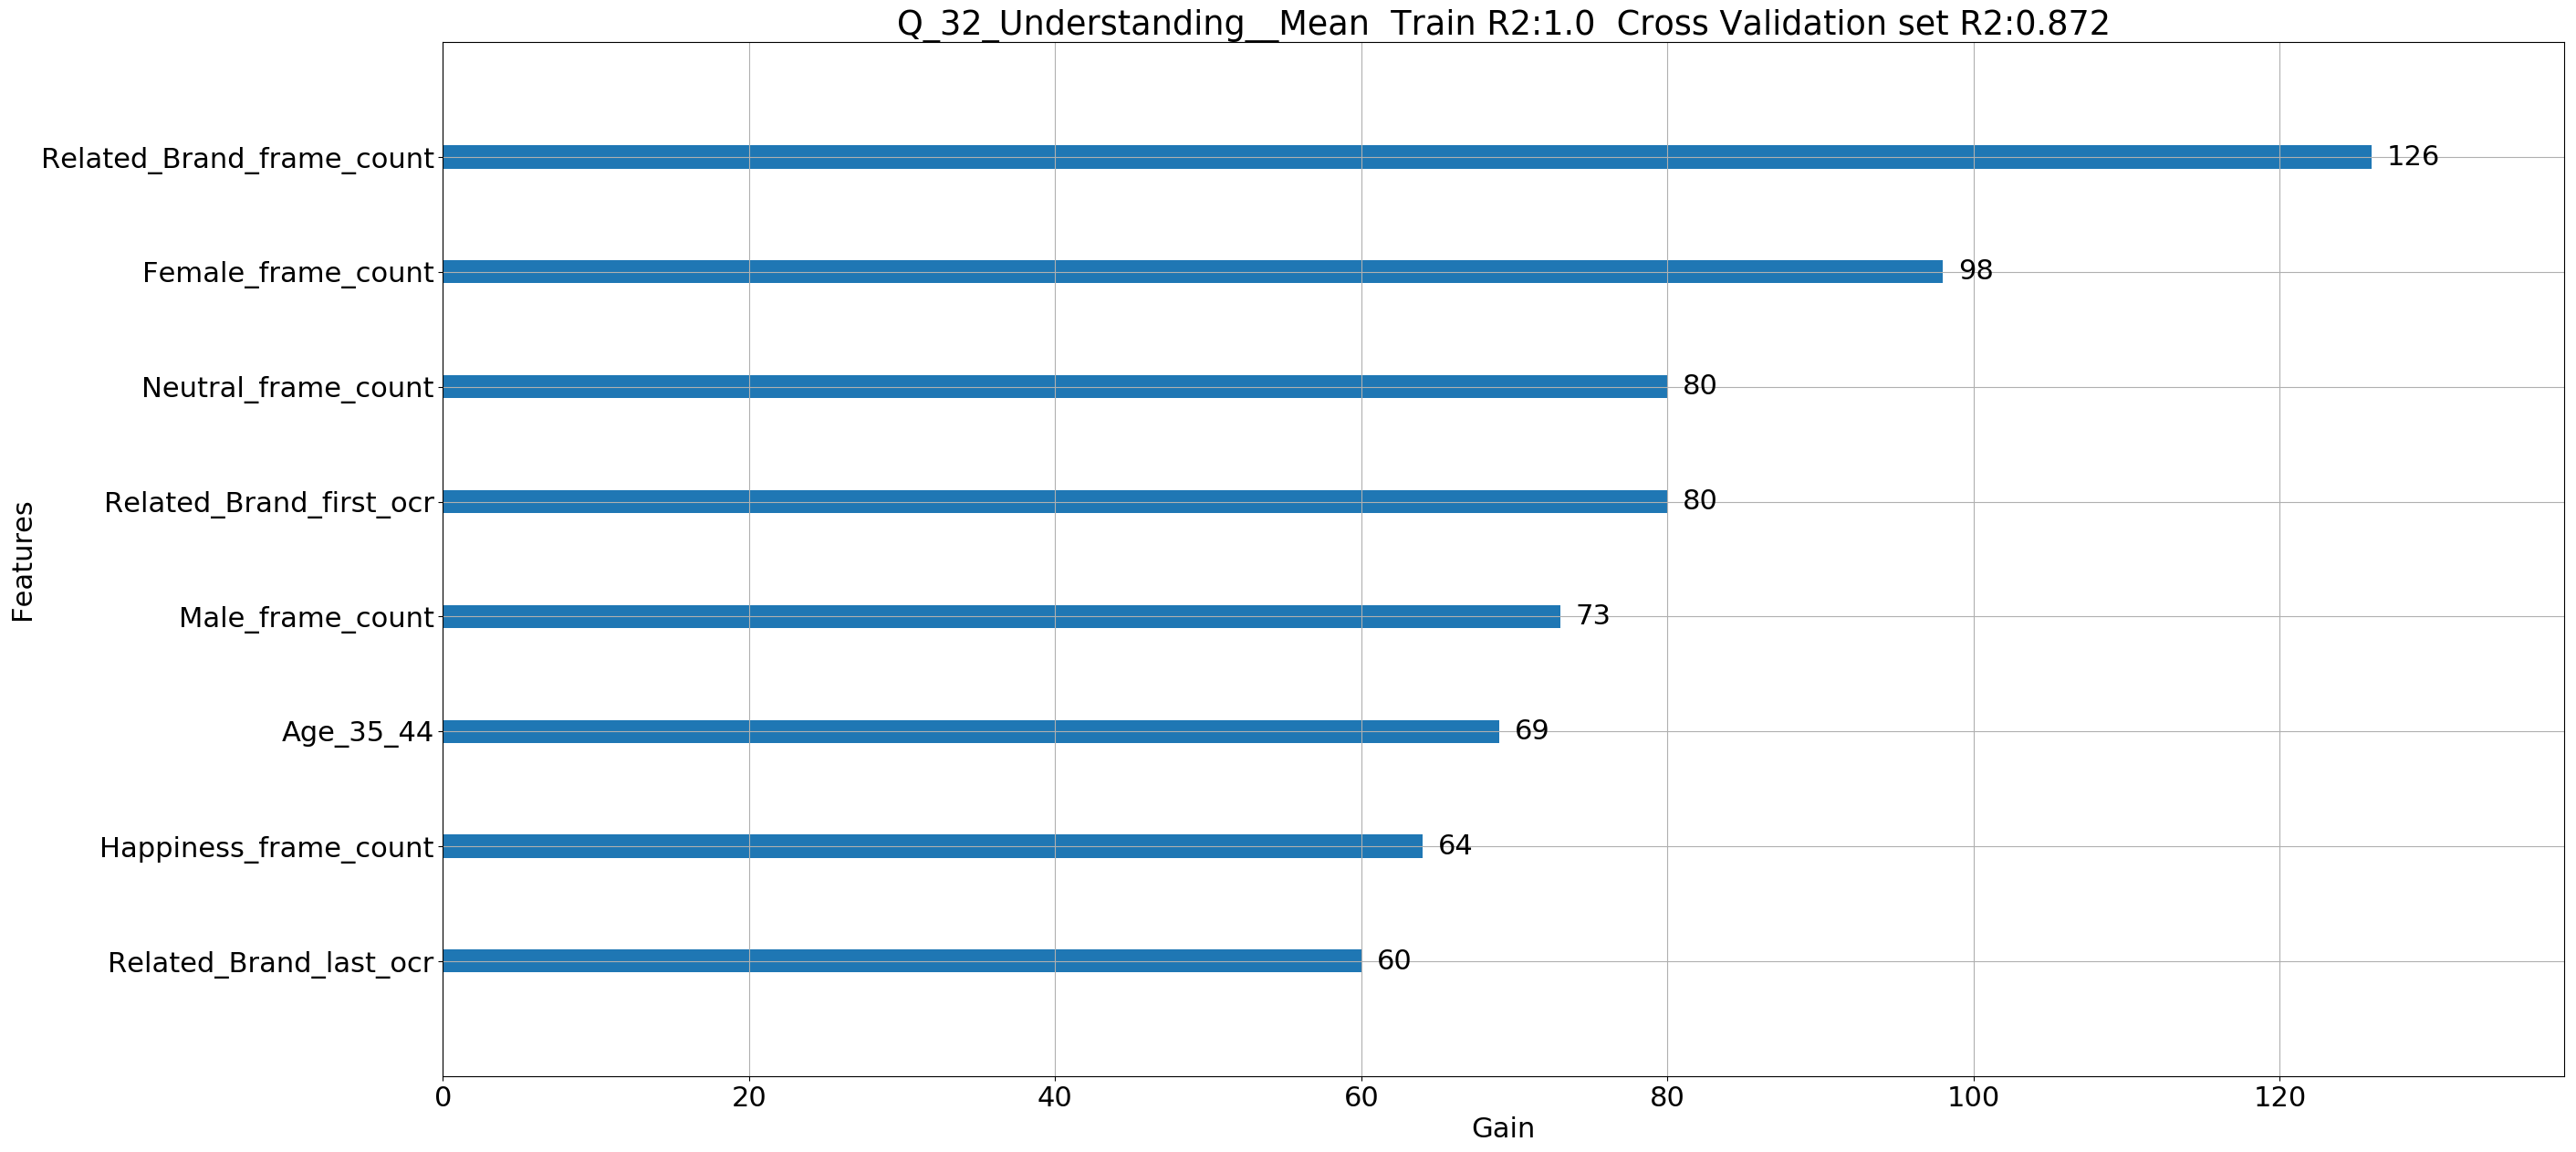

Q_33_Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


R2_SCORE (training set): 0.982033
R2_SCORE (cross validation set): 0.900924


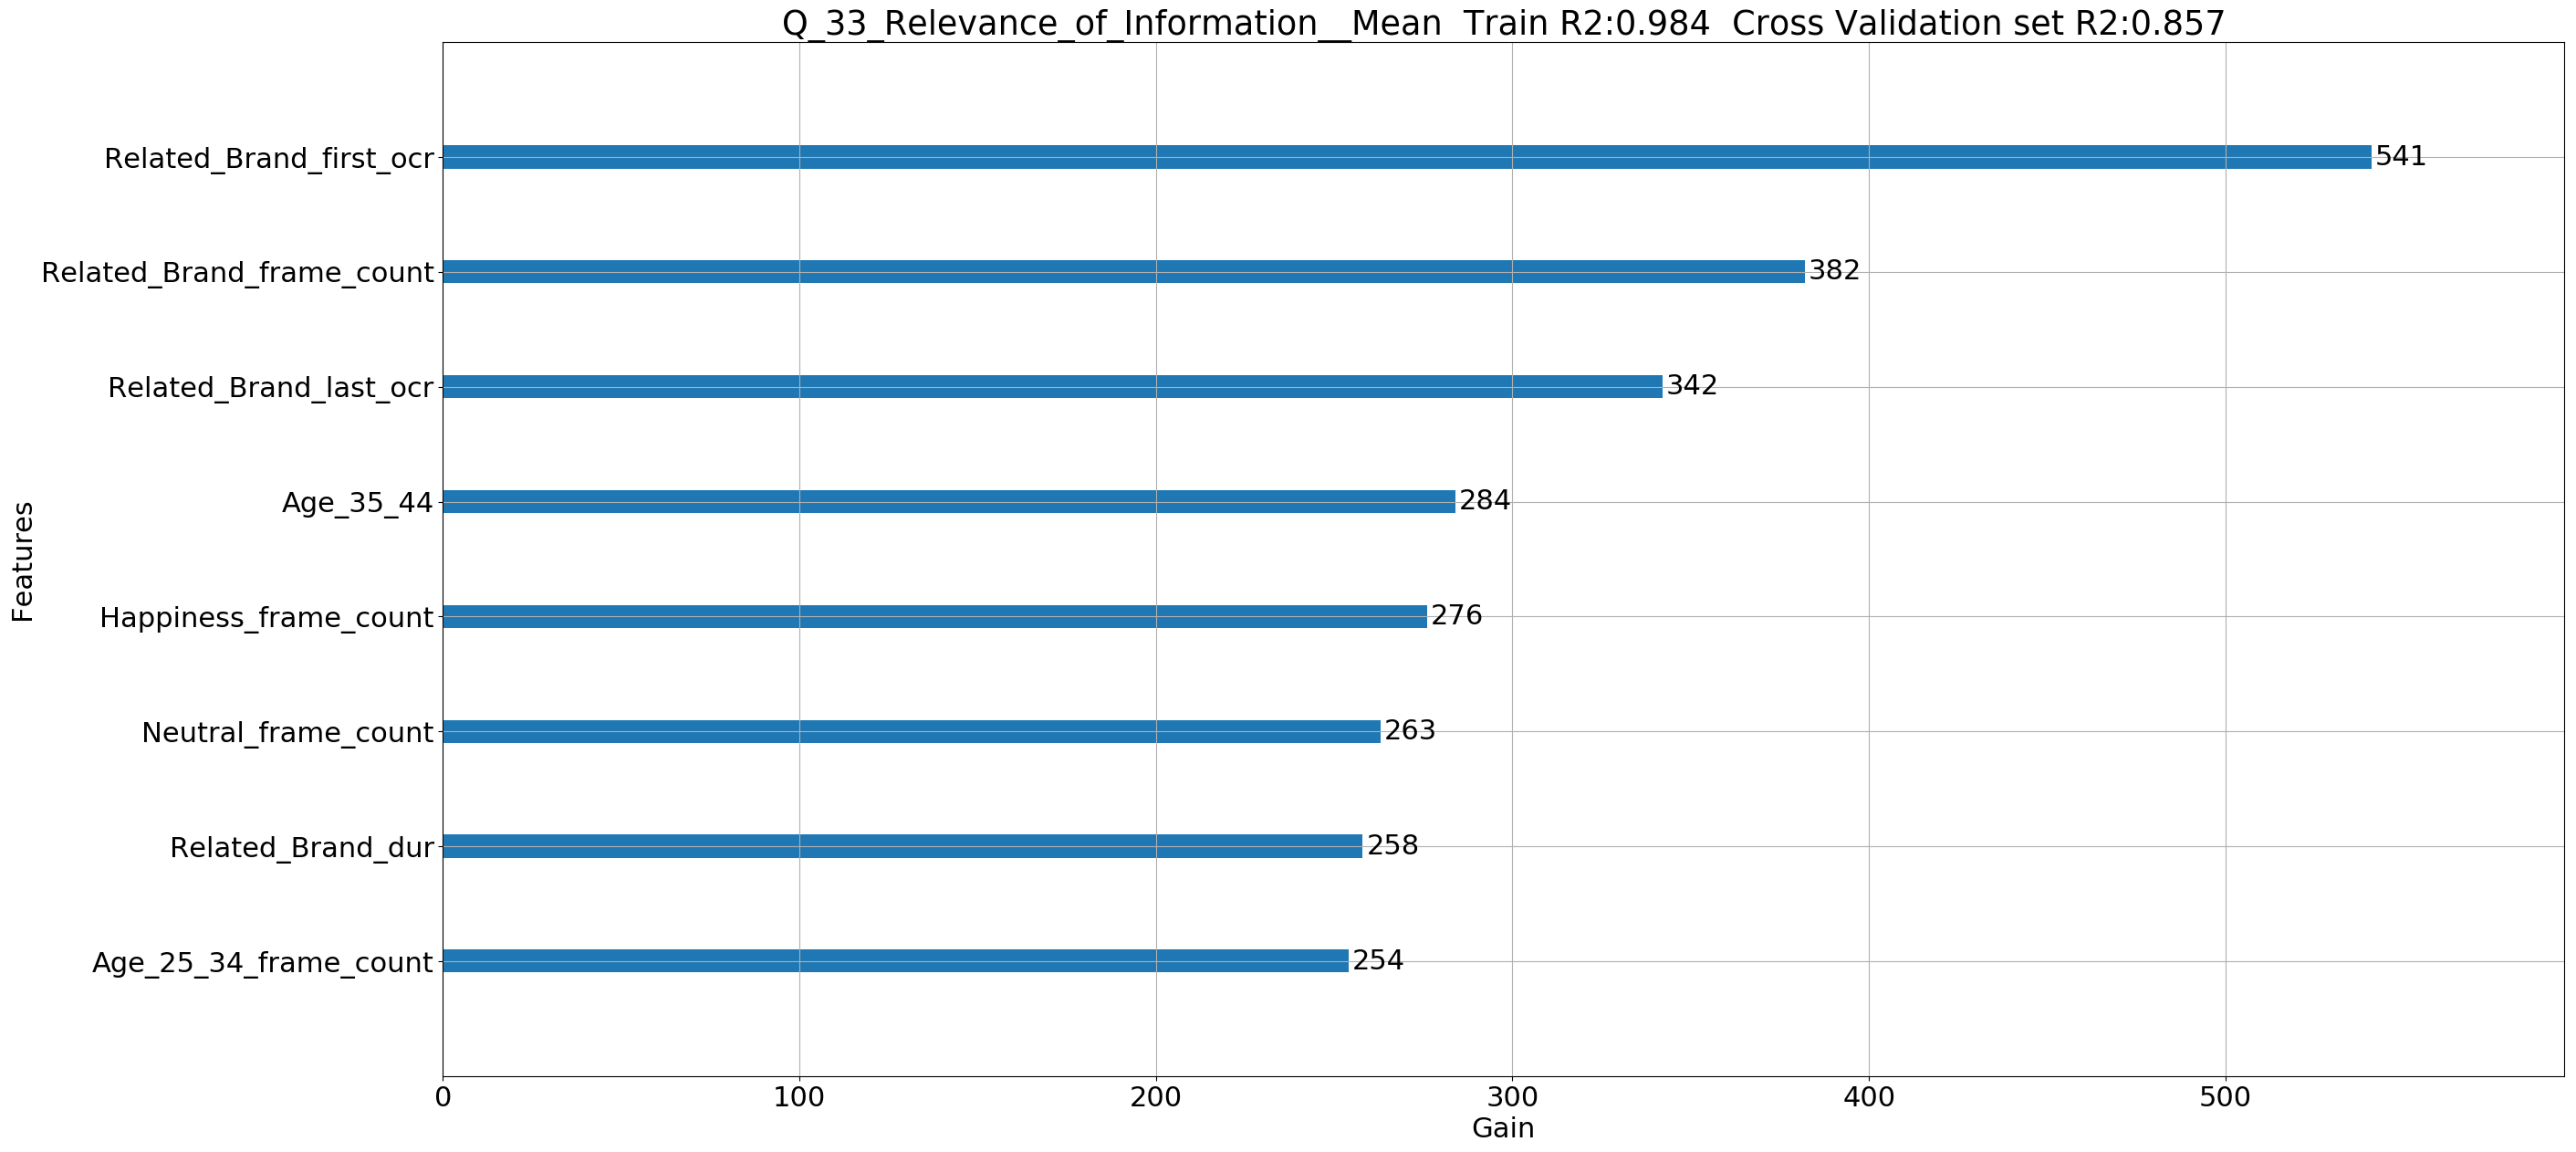

Q_34_Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


R2_SCORE (training set): 0.998573
R2_SCORE (cross validation set): 0.897375


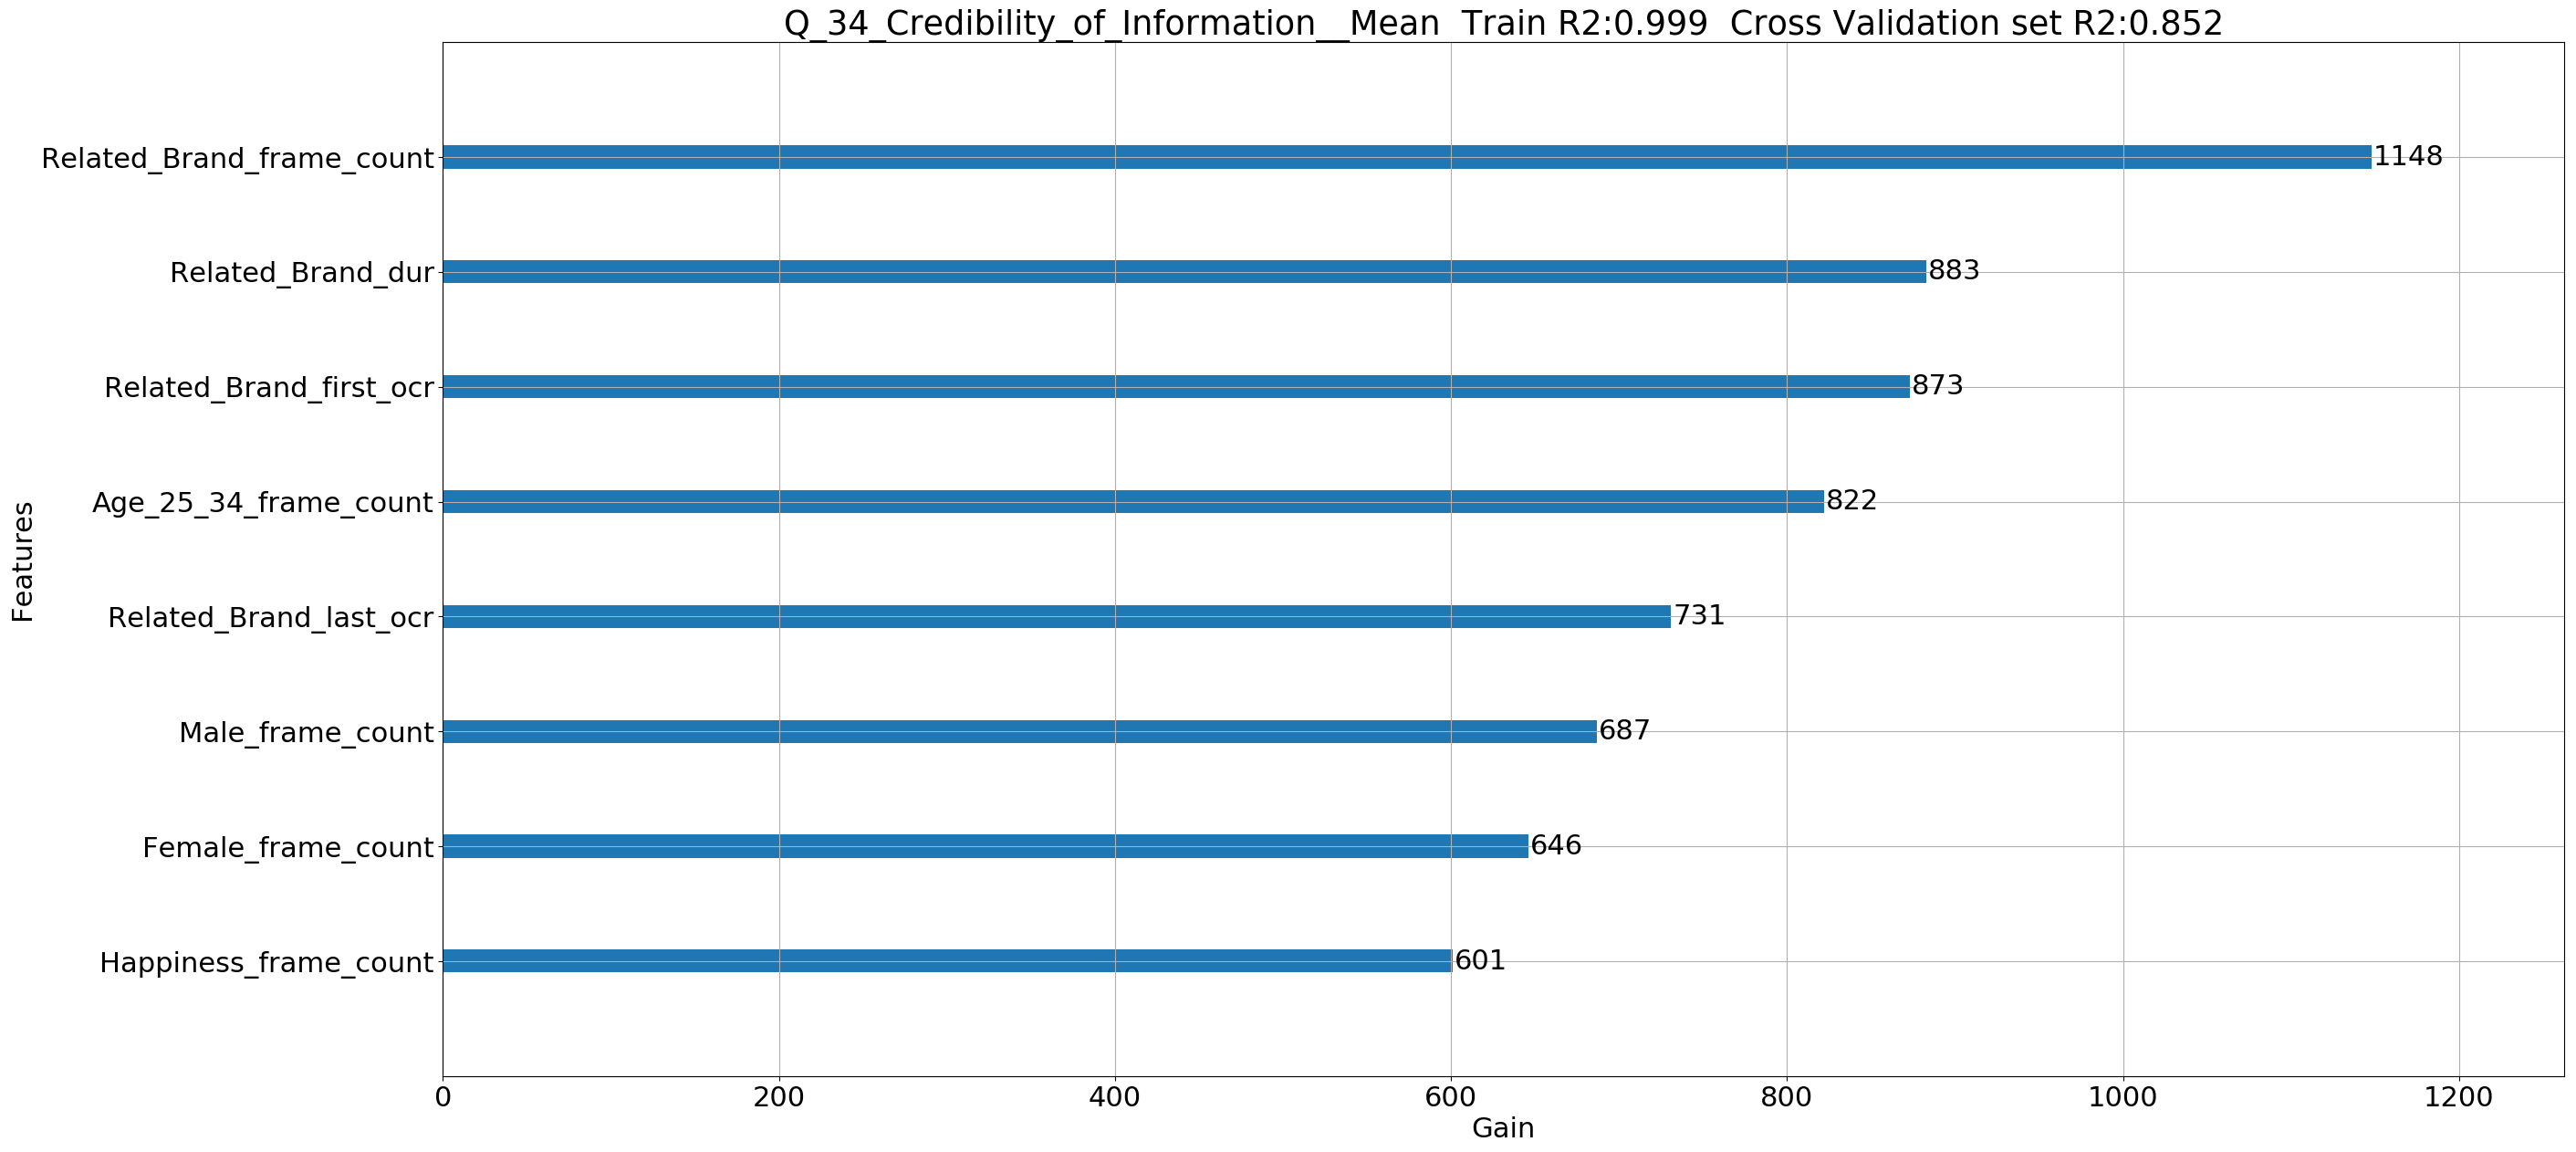

Q_35_New_Information__Mean.1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


R2_SCORE (training set): 0.997888
R2_SCORE (cross validation set): 0.958576


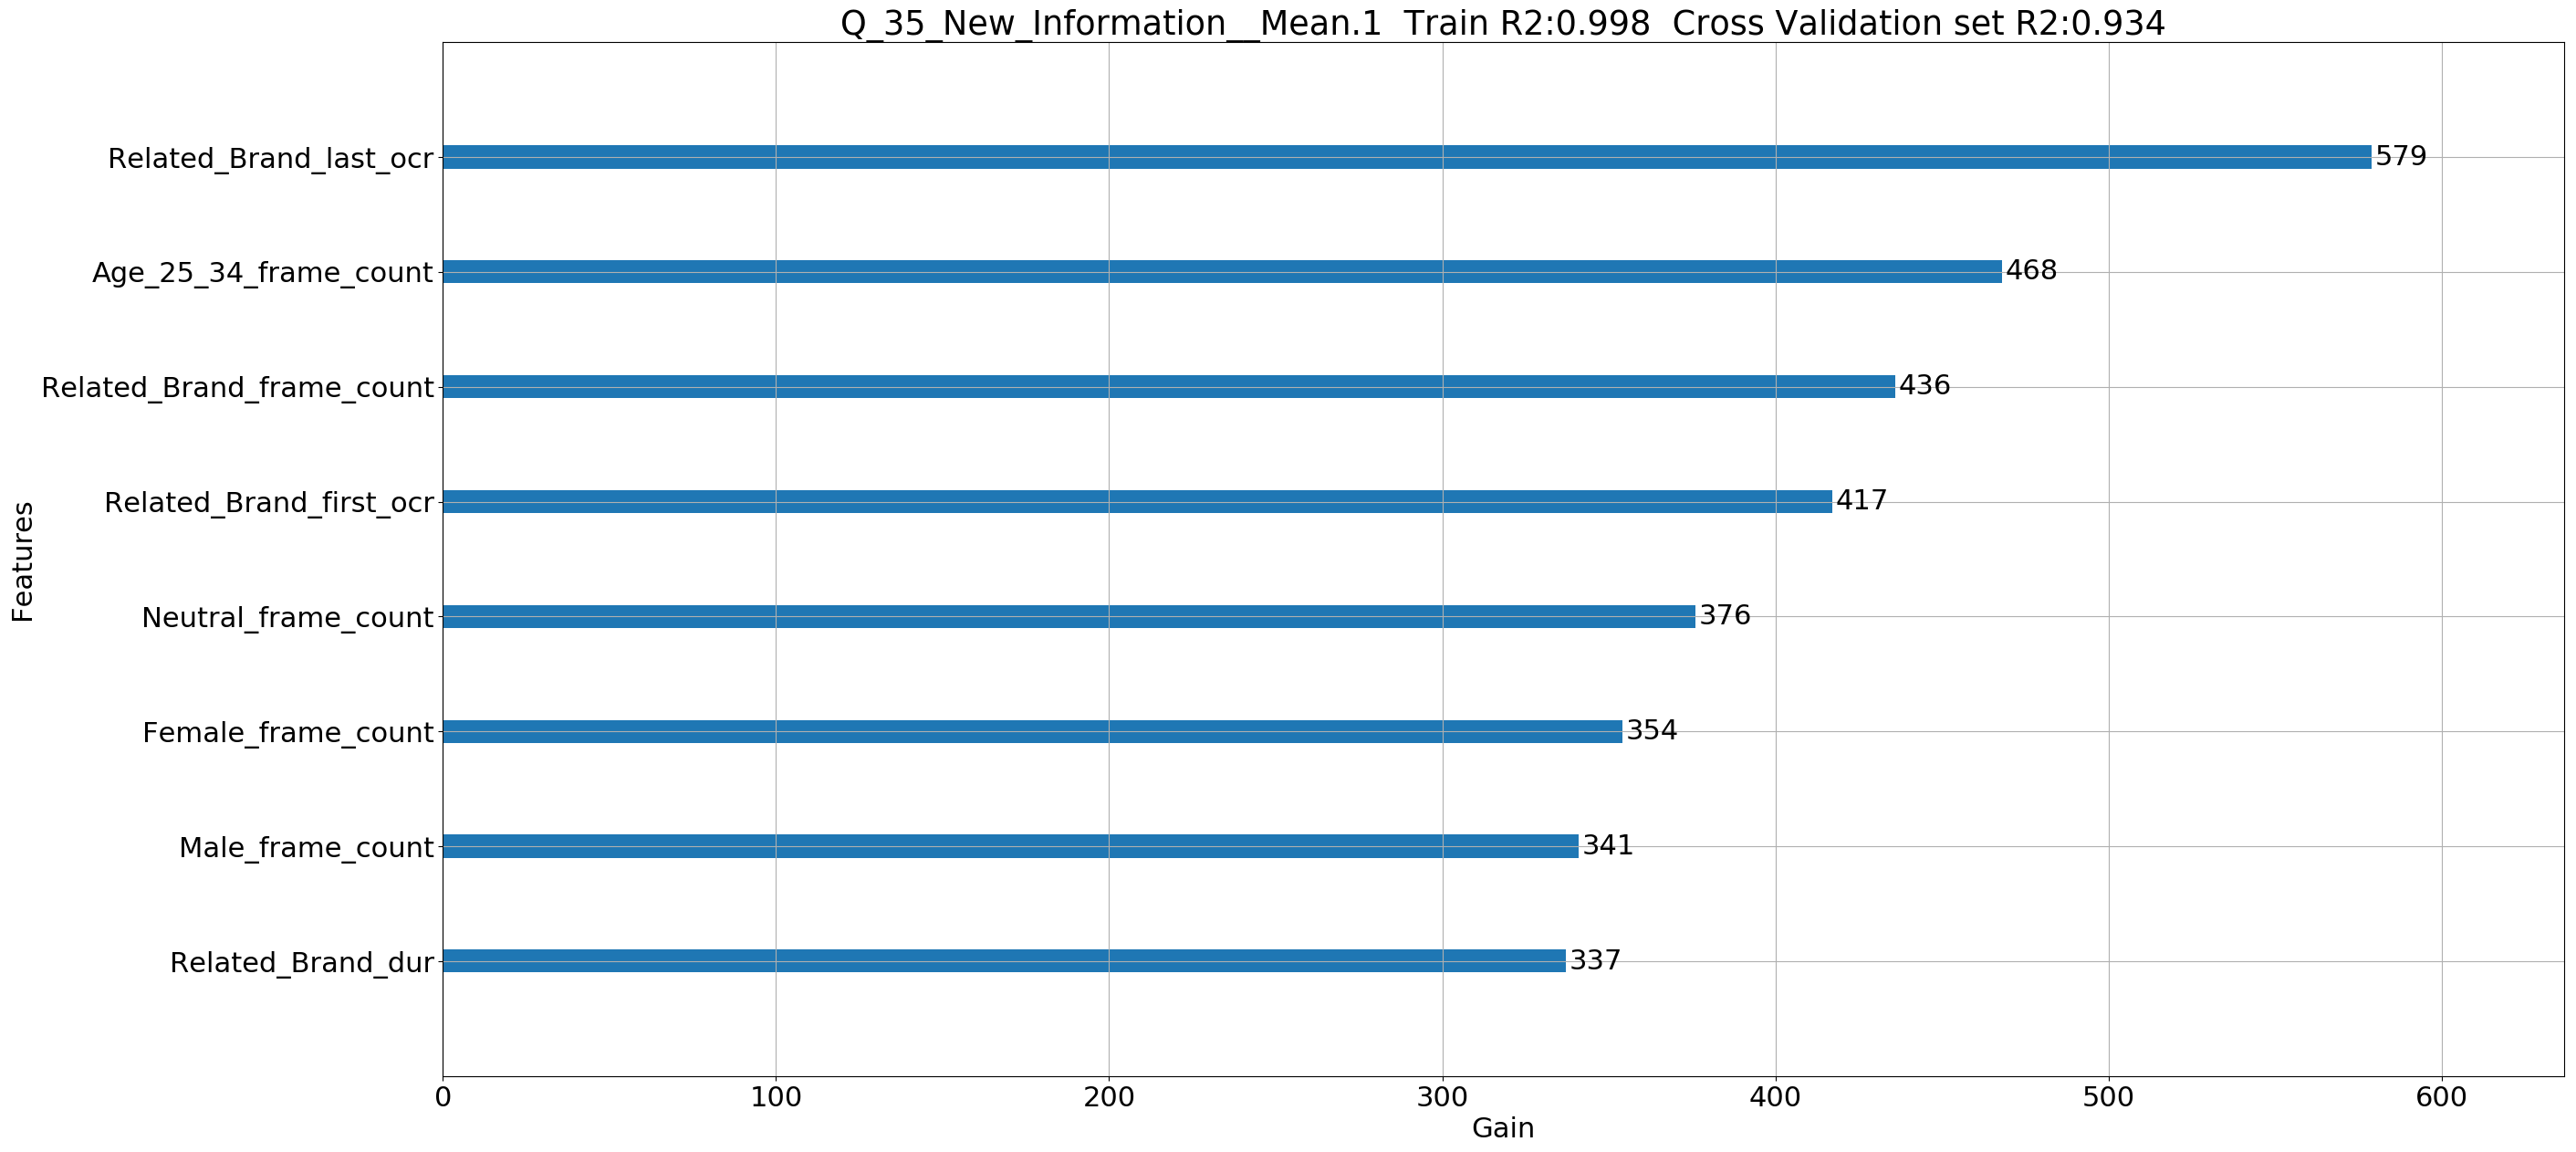

Q_36_Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


R2_SCORE (training set): 0.996984
R2_SCORE (cross validation set): 0.955335


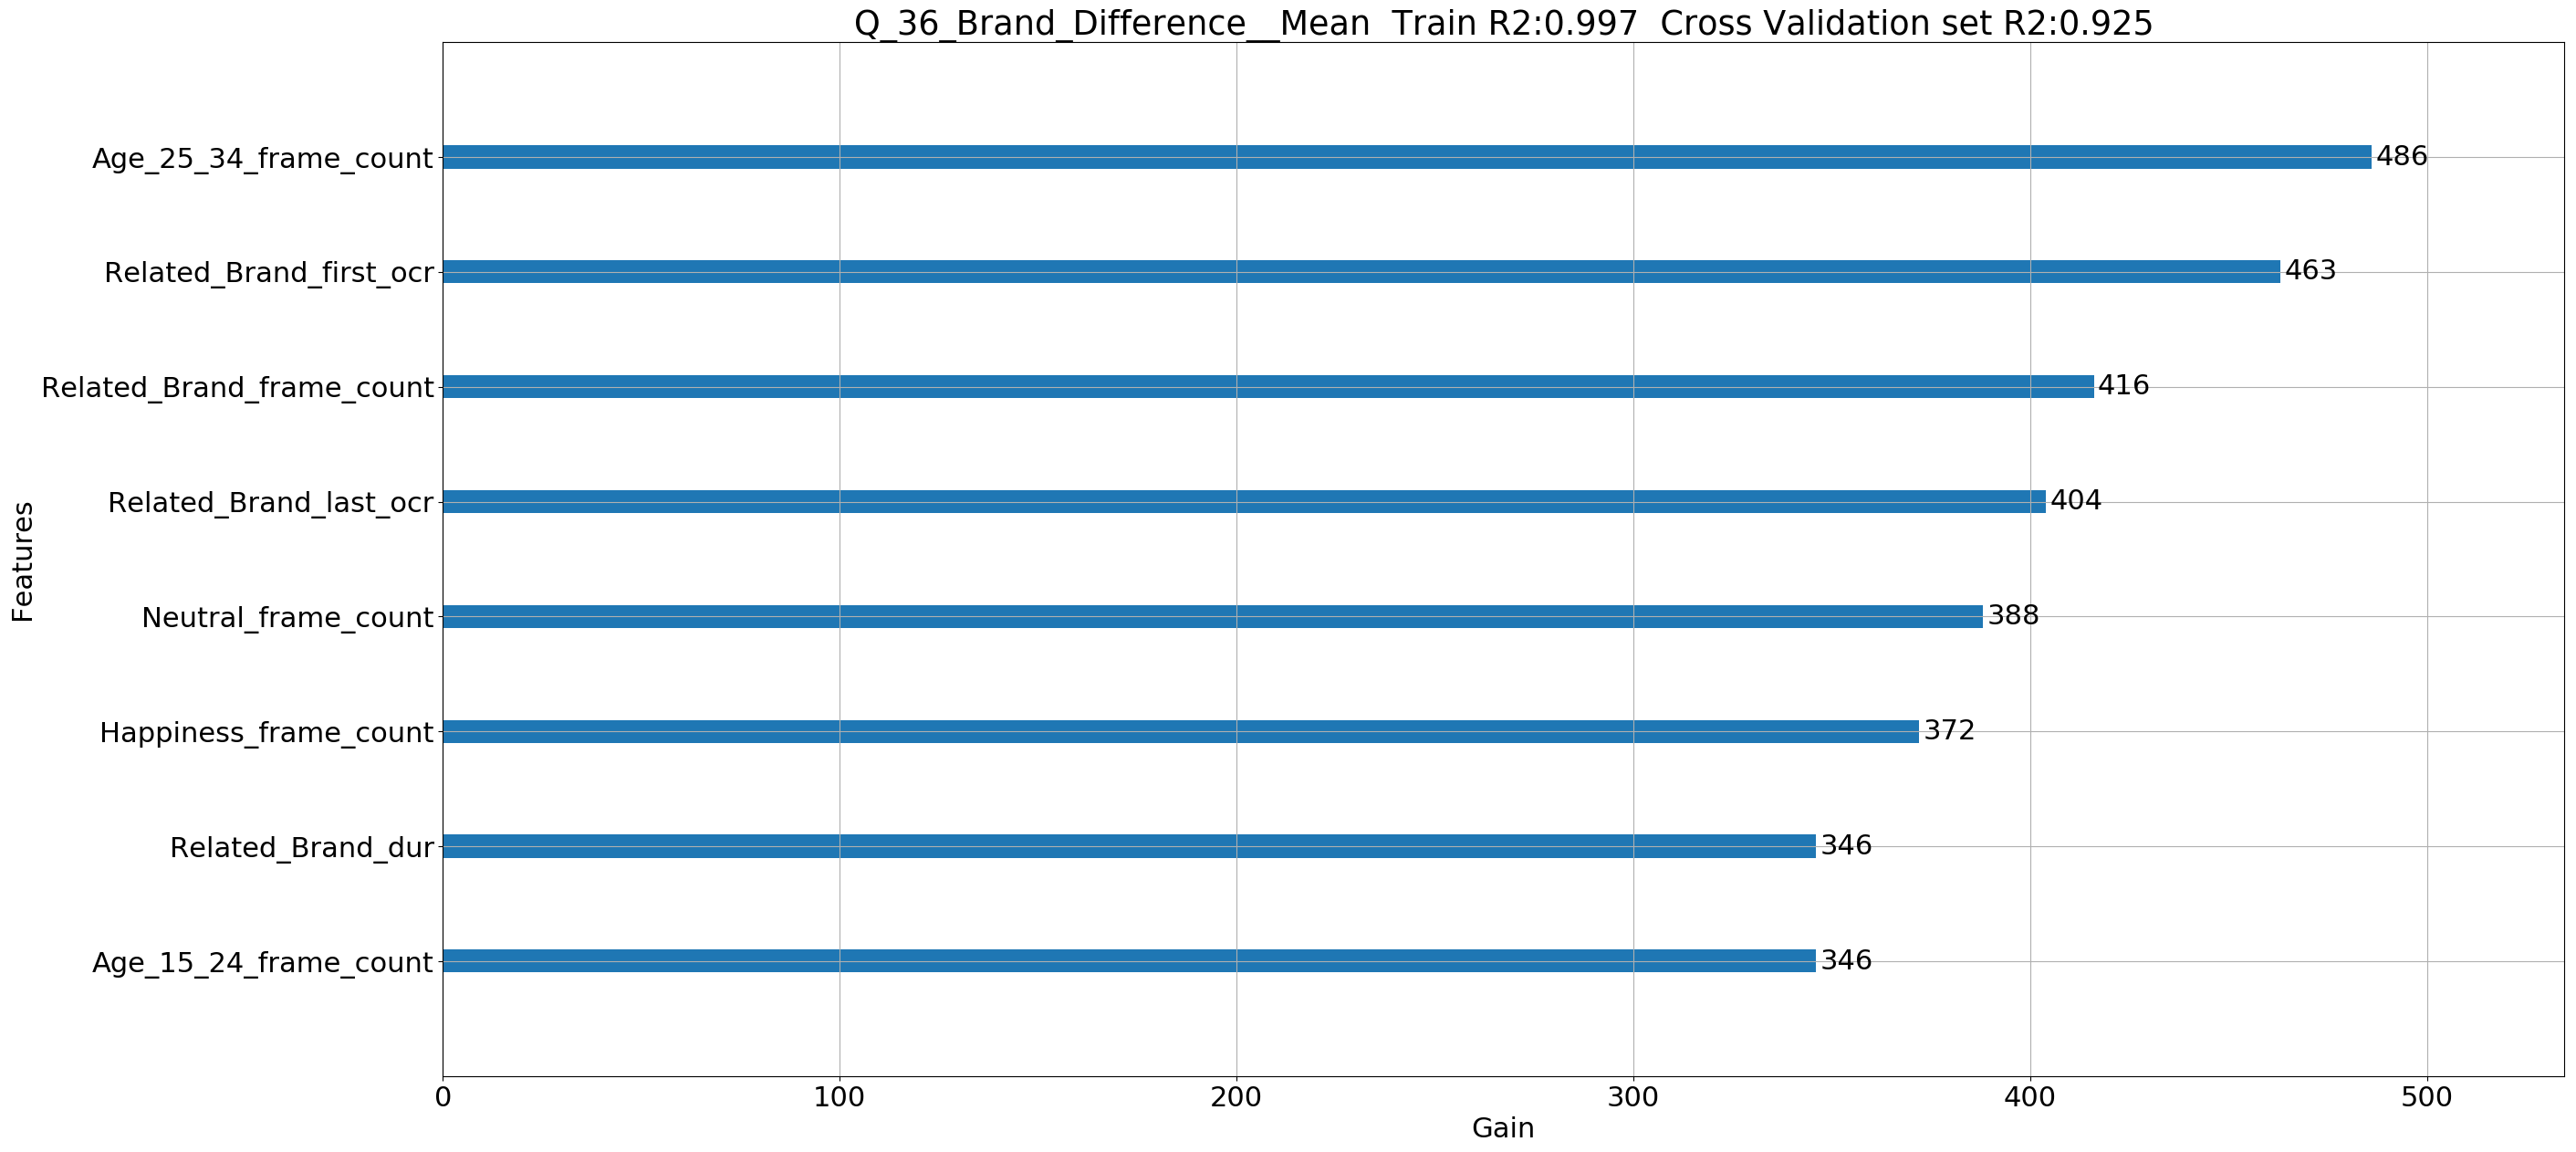

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
import matplotlib
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import xlrd, os, warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# train_pred_xgb=[]
# test_pred_xgb=[]
# y_train_lr = []
# y_test_lr = []
for i in range(len(resamp_target_df.columns)):
#     try:
#         if i==9:
            print(resamp_target_df.columns[i])
            X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
            data_dmatrix = xgb.DMatrix(data=X,label=y)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#             y_train_lr.append(y_train)
#             y_test_lr.append(y_test)
            
            xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=training_params[i]['colsample_bytree'],max_depth=training_params[i]['max_depth'],
                                     n_estimators=training_params[i]['n_estimators'],min_samples_leaf=training_params[i]['min_samples_leaf'],
                                     silent = training_params[i]['silent'],alpha=training_params[i]['alpha'],
                                      learning_rate=training_params[i]['learning_rate'],n_jobs=-1,reg_lambda=training_params[i]['reg_lambda'],verbose=1)

            ####  Grid Search Code
#             print("Search starts")
#             hyper_tuning = GridSearchCV(xg_reg,param_grid=parameters_learning,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#             hyper_tuning.fit(X_train,y_train)
#             print(hyper_tuning.best_params_)
#             print("Search End")
            ###
#             forest.set_params(**training_params_random_forest[i])
            scores = cross_validate(xg_reg,X_train,y_train,return_estimator=True,return_train_score=True,verbose=1,cv=5,n_jobs=-1,scoring='r2')
            index = np.argmax(scores['test_score'])
            xg_reg = scores['estimator'][index]
#             xg_reg.fit(X_train,y_train)
#             train_pred_xgb.append(xg_reg.predict(X_train))
#             test_pred_xgb.append(xg_reg.predict(X_test))
            print("R2_SCORE (training set): %f" % np.mean(scores['train_score'][index]))
            print("R2_SCORE (cross validation set): %f" % np.mean(scores['test_score'][index]))
#             print("R2_SCORE (test set): %f" % (r2_score(y_test,xg_reg.predict(X_test))))
            
            #####
            xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Train R2:' + str(round(np.mean(scores['train_score']),3)) + '  Cross Validation set R2:' + str(round(np.mean(scores['test_score']),3)) )
#             xgb.plot_importance(xg_reg,max_num_features = 8,xlabel='Gain',title =resamp_target_df.columns[i]+ '  Cross Validation R2:' + str(round(np.max(scores),3)) )
            
            plt.rcParams['figure.figsize'] = [30,15]
            plt.rcParams['figure.dpi'] = 100
            matplotlib.rcParams.update({'font.size': 22})
            plt.savefig(resamp_target_df.columns[i]+'_XGB_Plot.png')
            plt.show()
#     except:
#         print("No score for " + resamp_target_df.columns[i])
#         pass

In [120]:
train_pred_xgb = np.array(train_pred_xgb)
test_pred_xgb = np.array(test_pred_xgb)

In [47]:
from sklearn

<h1> Random Forest Model

In [33]:
#####
parameters={"n_estimators":[100,150,200,250,300,400,500],"max_depth":[2,4,5,6,13,14,15,18,20],"max_features":[0.25,0.3,0.4],"min_samples_leaf":[2,3],"bootstrap":[True,False]}

In [40]:
Unaided_Branding_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
Brand_mean_cues_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 250}
Aided_Branding__Mean_params ={'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
Active_Involvement__Mean_params = {'bootstrap': False, 'max_depth': 14, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 300}
New_Information__Mean_params = {'bootstrap': False, 'max_depth': 13, 'max_features': 0.4, 'min_samples_leaf': 2, 'n_estimators': 200}
Enjoyment__Mean_params= {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
Brand_Appeal__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 300}
Understanding__Mean_params = {'bootstrap': False, 'max_depth': 15, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 150}
Relevance_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 12, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 150}
Credibility_of_Information__Mean_params = {'bootstrap': False, 'max_depth': 11, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 100}
Brand_Difference__Mean_params= {'bootstrap': False, 'max_depth': 13, 'max_features': 0.25, 'min_samples_leaf': 2, 'n_estimators': 400}

In [41]:
training_params_random_forest=[Unaided_Branding_params,Brand_mean_cues_params,Aided_Branding__Mean_params,Active_Involvement__Mean_params,New_Information__Mean_params,Enjoyment__Mean_params,Brand_Appeal__Mean_params,Understanding__Mean_params,Relevance_of_Information__Mean_params,Credibility_of_Information__Mean_params,New_Information__Mean_params,Brand_Difference__Mean_params]

In [42]:
X.columns

Index(['Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Female_frame_count', 'Male_frame_count',
       ...
       'Lenovo_total_ocr', 'Asus_first_ocr.1', 'Asus_last_ocr.1',
       'Asus_total_ocr.1', 'Hp_first_ocr.1', 'Hp_last_ocr.1', 'Hp_total_ocr.1',
       'Dell_first_ocr.1', 'Dell_last_ocr.1', 'Dell_total_ocr.1'],
      dtype='object', length=230)

Unaided_Branding


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


R2_SCORE (training set): 0.996245
R2_SCORE (cross validation set): 0.965138
Feature ranking:
1. Related_Brand_first_ocr (0.169316)
2. Lenovo_dur (0.095918)
3. Windows 10_total_ocr (0.050980)
4. Surface Pro 4_frame_count (0.034157)
5. Length_of_ad_15 (0.029190)
6. Related_Brand_last_ocr (0.027115)
7. Windows 10_frame_count (0.026533)
8. Surface Pro 4_dur (0.025451)
9. Windows 10_dur (0.024532)
10. Male_total_duration (0.024104)
11. Unrelated_last_ocr (0.023950)
12. Unrelated_first_ocr (0.019192)
13. Unrelated_total_ocr (0.017146)
14. Age_25_34_frame_count (0.016541)
15. Unrelated_dur (0.015706)
16. Neutral_Male_frame_count (0.013469)
17. Male_frame_count (0.013464)
18. Related_Brand_frame_count (0.011110)
19. Related_Brand_dur (0.010391)
20. Neutral_Age_25_34_frame_count (0.010159)
21. Related_Brand_total_ocr (0.009615)
22. Happiness_total_duration (0.009314)
23. Ad_type_tv (0.008906)
24. Sadness_frame_count (0.008353)
25. Microsoft Surface_frame_count (0.008336)
26. Female_total_durati

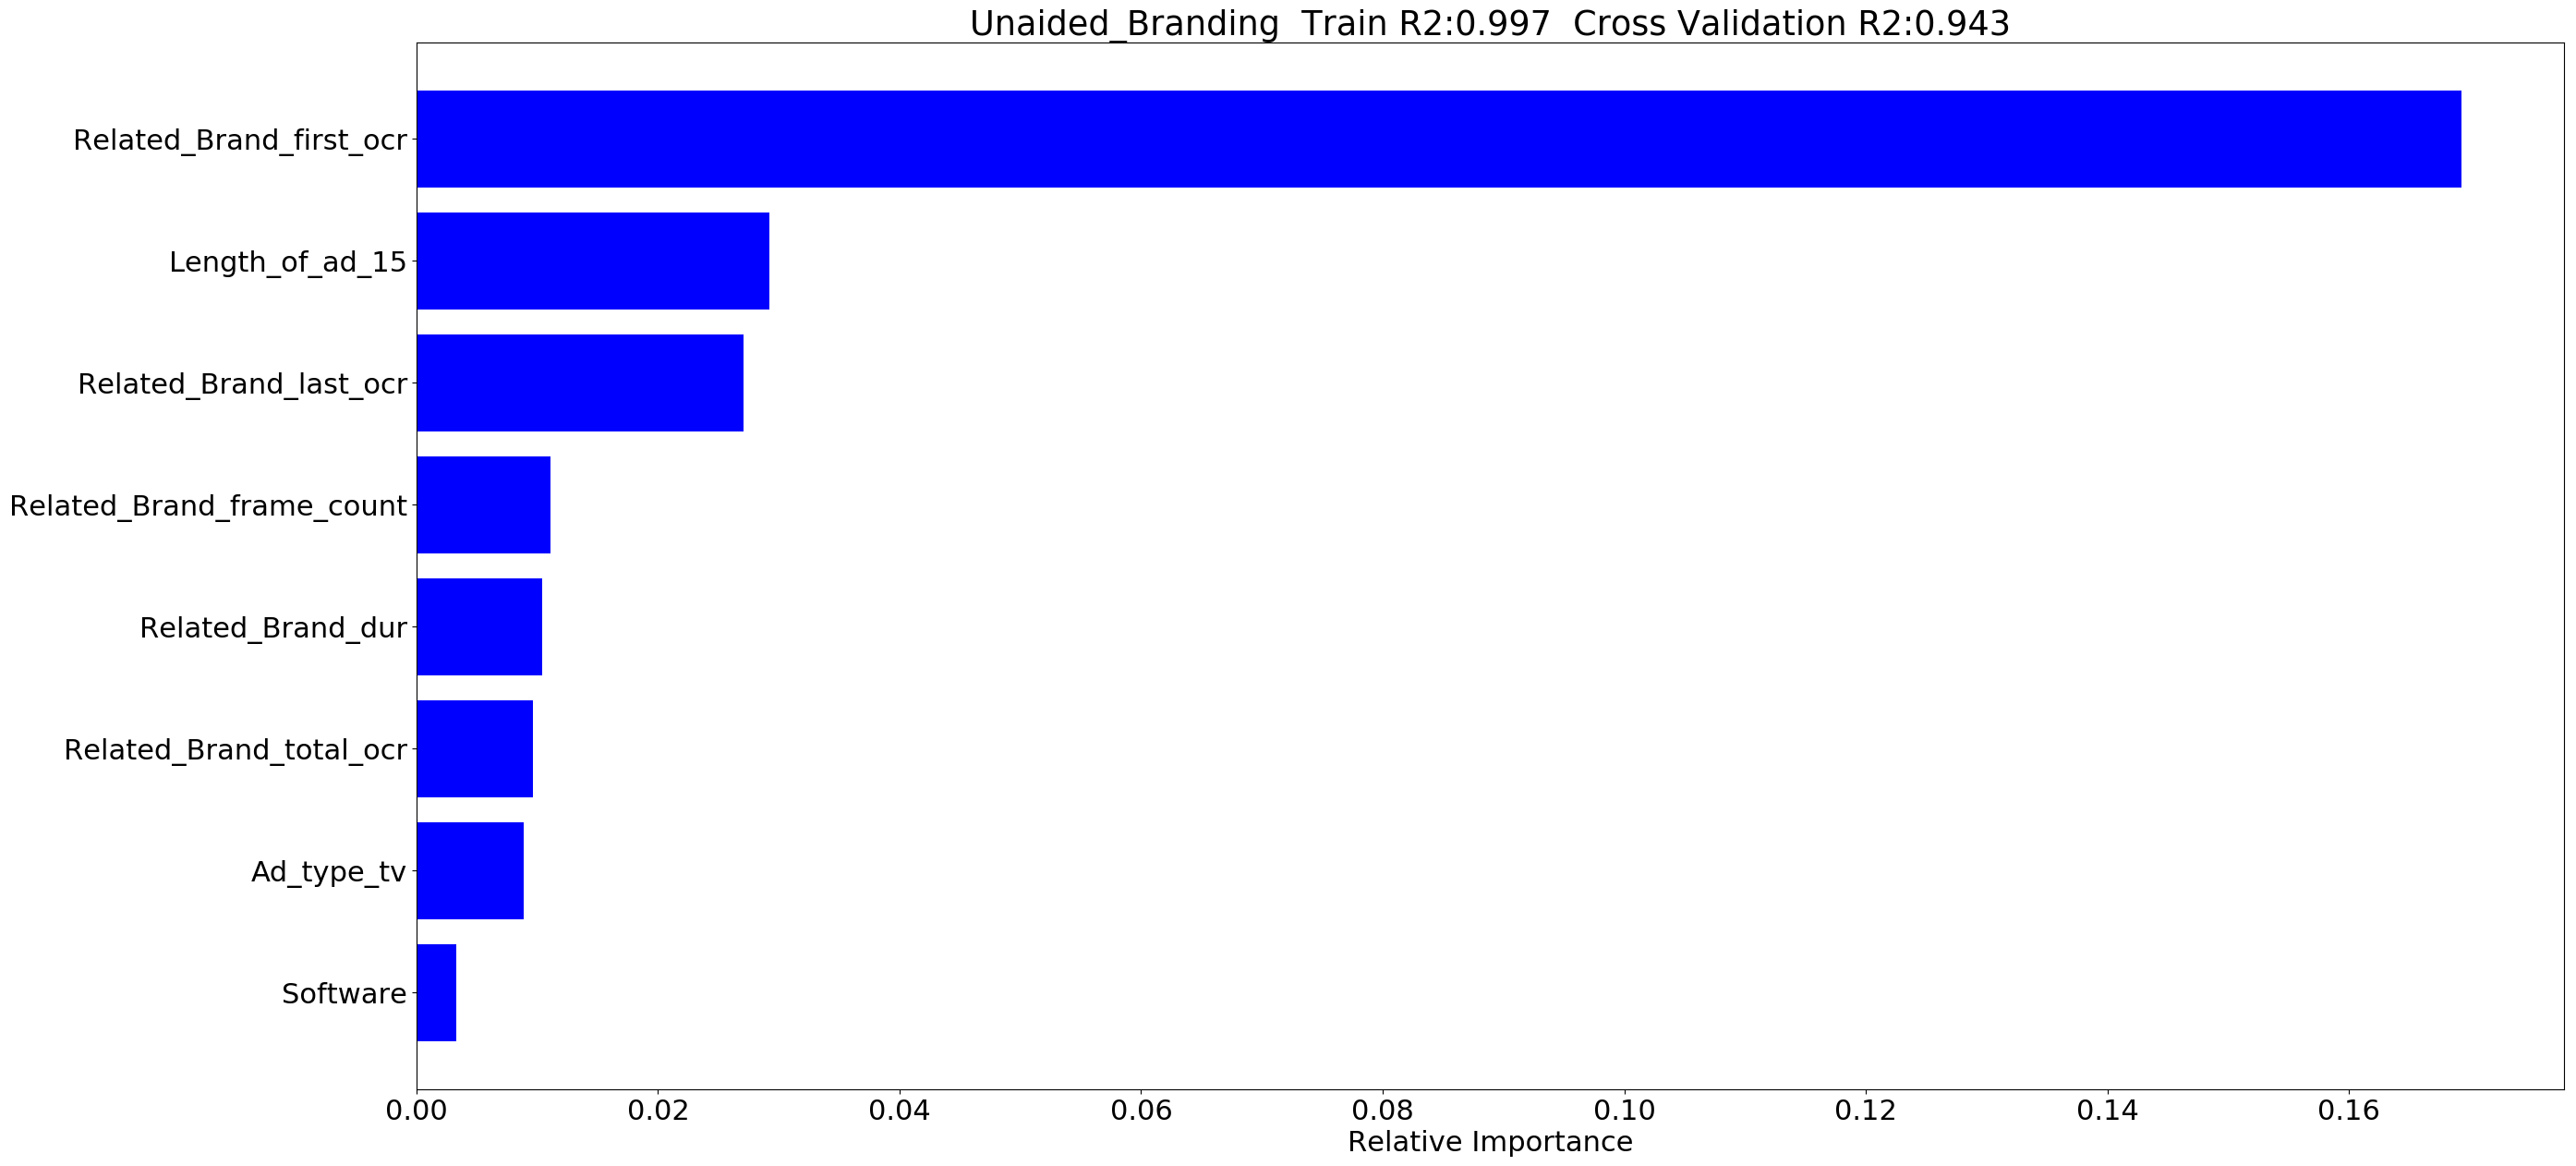

Q_12_Brand_Cues__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


R2_SCORE (training set): 0.988893
R2_SCORE (cross validation set): 0.931704
Feature ranking:
1. African_total_duration (0.092793)
2. African_frame_count (0.084561)
3. Male_total_duration (0.055924)
4. Male_frame_count (0.043975)
5. Lenovo_dur (0.028707)
6. Related_Brand_first_ocr (0.026943)
7. Age_25_34_African_frame_count (0.025627)
8. Neutral_Age_25_34_frame_count (0.023758)
9. Related_Brand_last_ocr (0.022791)
10. Windows 10_first_ocr (0.022555)
11. Age_25_34_total_duration (0.021227)
12. Dell XPS 13_frame_count (0.021095)
13. Age_25_34_frame_count (0.020312)
14. Dell_frame_count (0.019458)
15. Dell XPS 13_first_ocr (0.018041)
16. Dell_first_ocr.1 (0.015627)
17. Dell XPS 13_total_ocr (0.015441)
18. Dell XPS 13_last_ocr (0.015351)
19. Dell_total_ocr.1 (0.015311)
20. Dell_last_ocr.1 (0.014184)
21. Related_Brand_frame_count (0.013339)
22. Unrelated_first_ocr (0.013264)
23. Dell XPS 13_dur (0.013233)
24. Related_Brand_dur (0.012516)
25. Related_Brand_total_ocr (0.011962)
26. Windows 10_

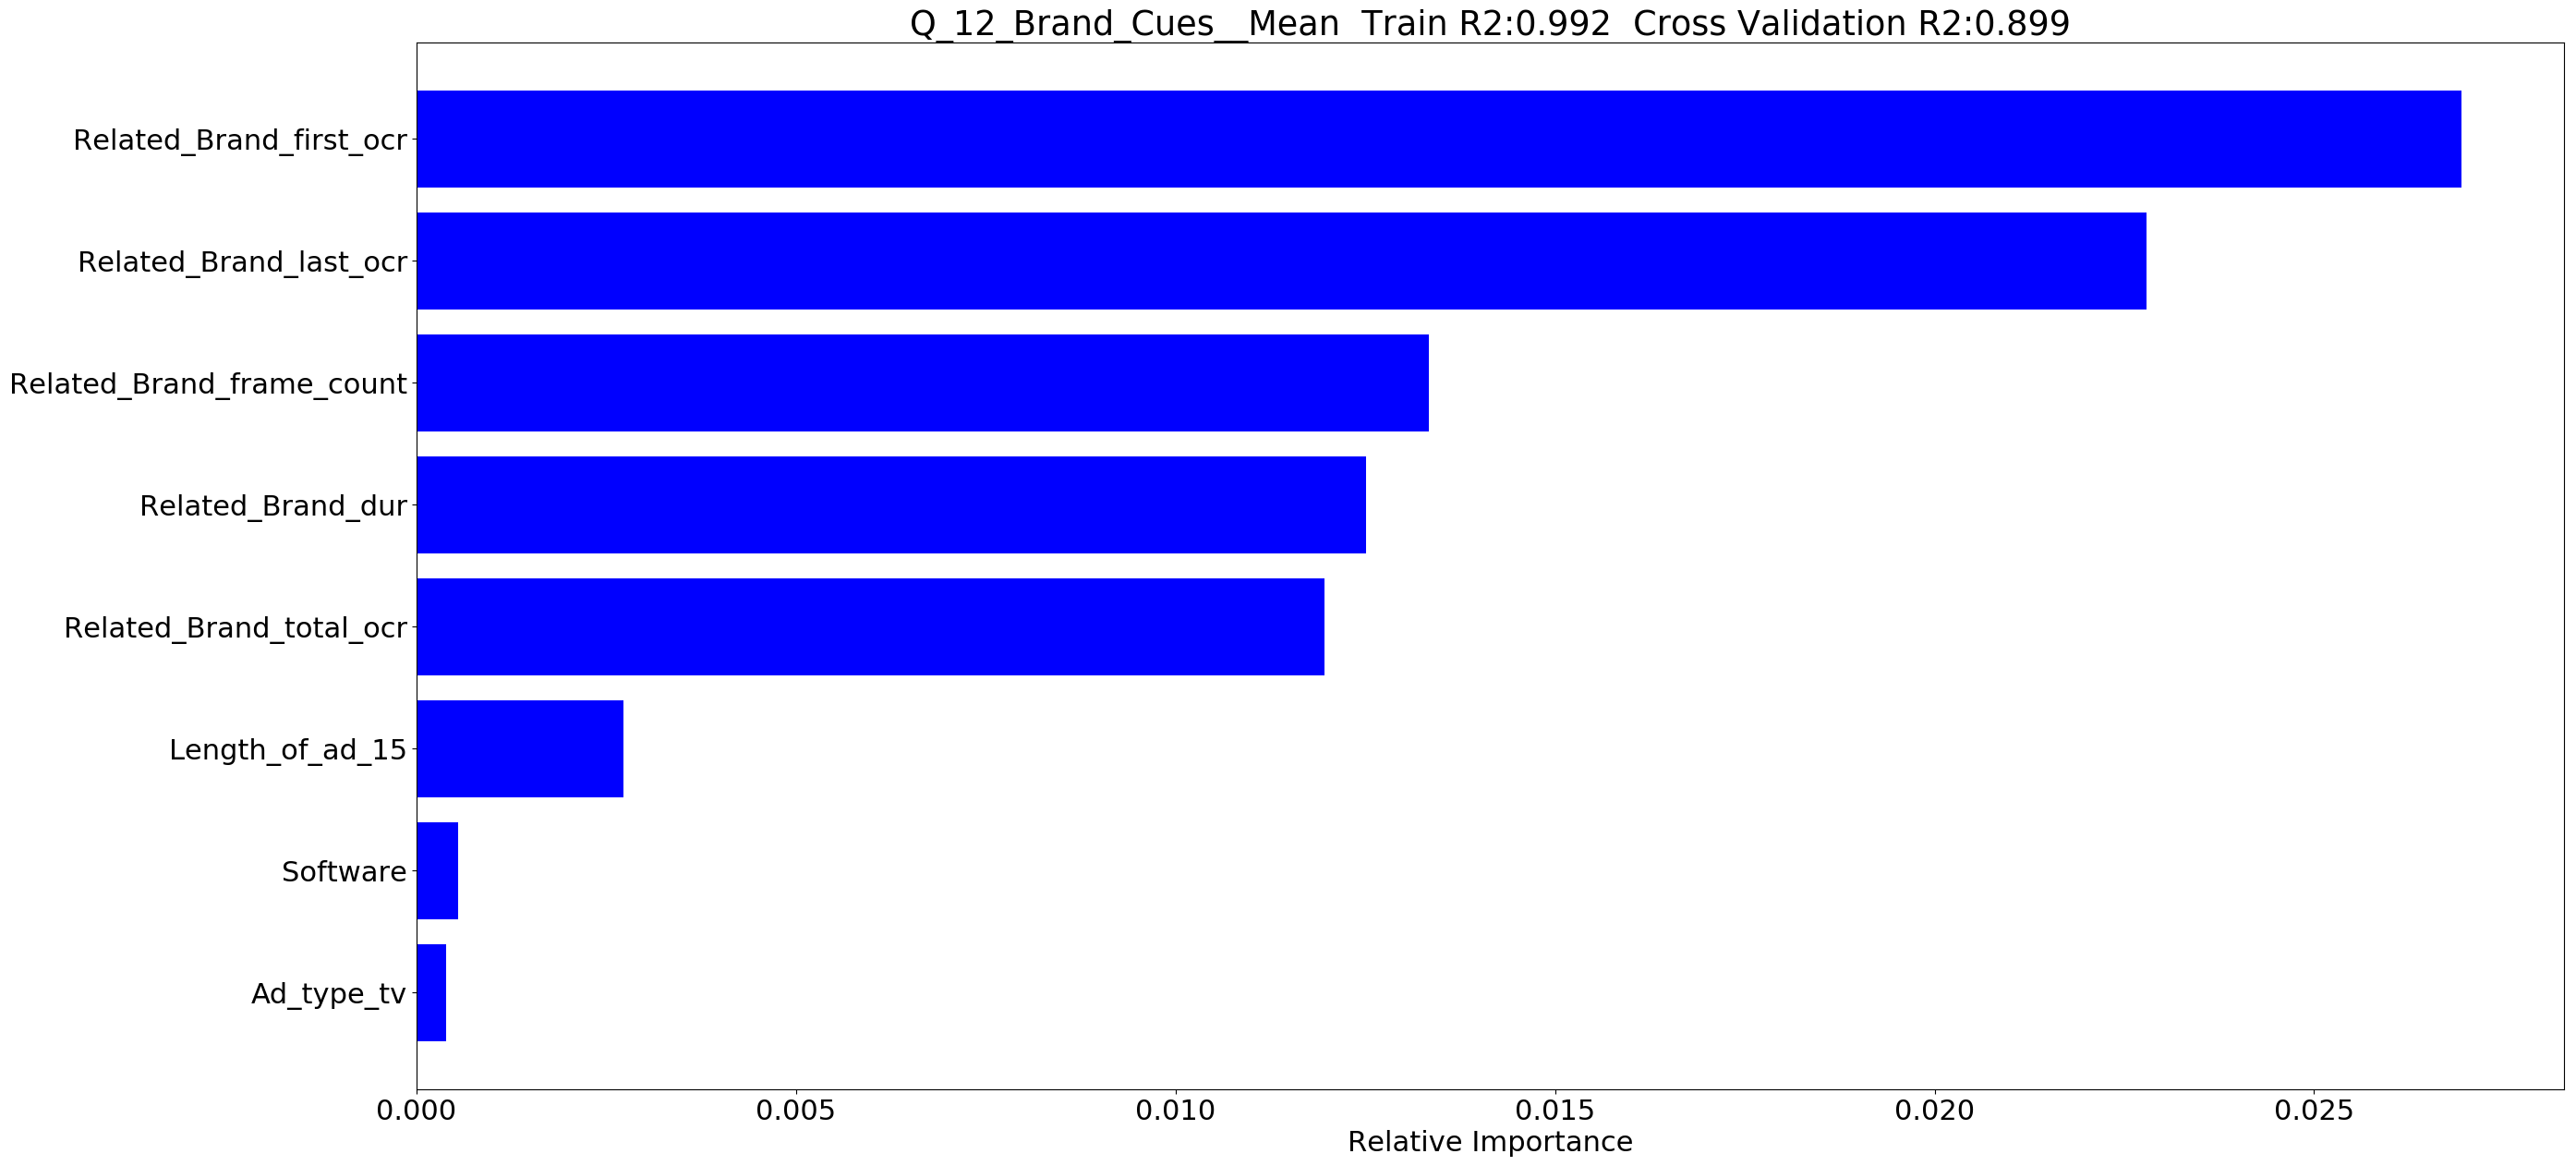

Q_11a_Aided_Branding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


R2_SCORE (training set): 0.995204
R2_SCORE (cross validation set): 0.937439
Feature ranking:
1. Lenovo_dur (0.182557)
2. Related_Brand_last_ocr (0.044772)
3. Windows 10_first_ocr (0.030630)
4. African_total_duration (0.030325)
5. African_frame_count (0.026726)
6. Dell_first_ocr.1 (0.024047)
7. Age_25_34_total_duration (0.022065)
8. Dell_total_ocr.1 (0.021650)
9. Age_25_34_frame_count (0.021109)
10. Male_frame_count (0.020155)
11. Dell XPS 13_first_ocr (0.017387)
12. Dell_last_ocr.1 (0.017308)
13. Dell XPS 13_dur (0.017308)
14. Windows 10_frame_count (0.015460)
15. Dell XPS 13_last_ocr (0.015170)
16. Dell_frame_count (0.014368)
17. Related_Brand_frame_count (0.014150)
18. Neutral_Male_frame_count (0.014027)
19. Male_total_duration (0.013846)
20. Windows 10_total_ocr (0.012943)
21. Length_of_ad_15 (0.012940)
22. Windows 10_dur (0.012762)
23. Happiness_total_duration (0.011723)
24. Related_Brand_first_ocr (0.011515)
25. Related_Brand_dur (0.010293)
26. Age_35_44_total_duration (0.010273)


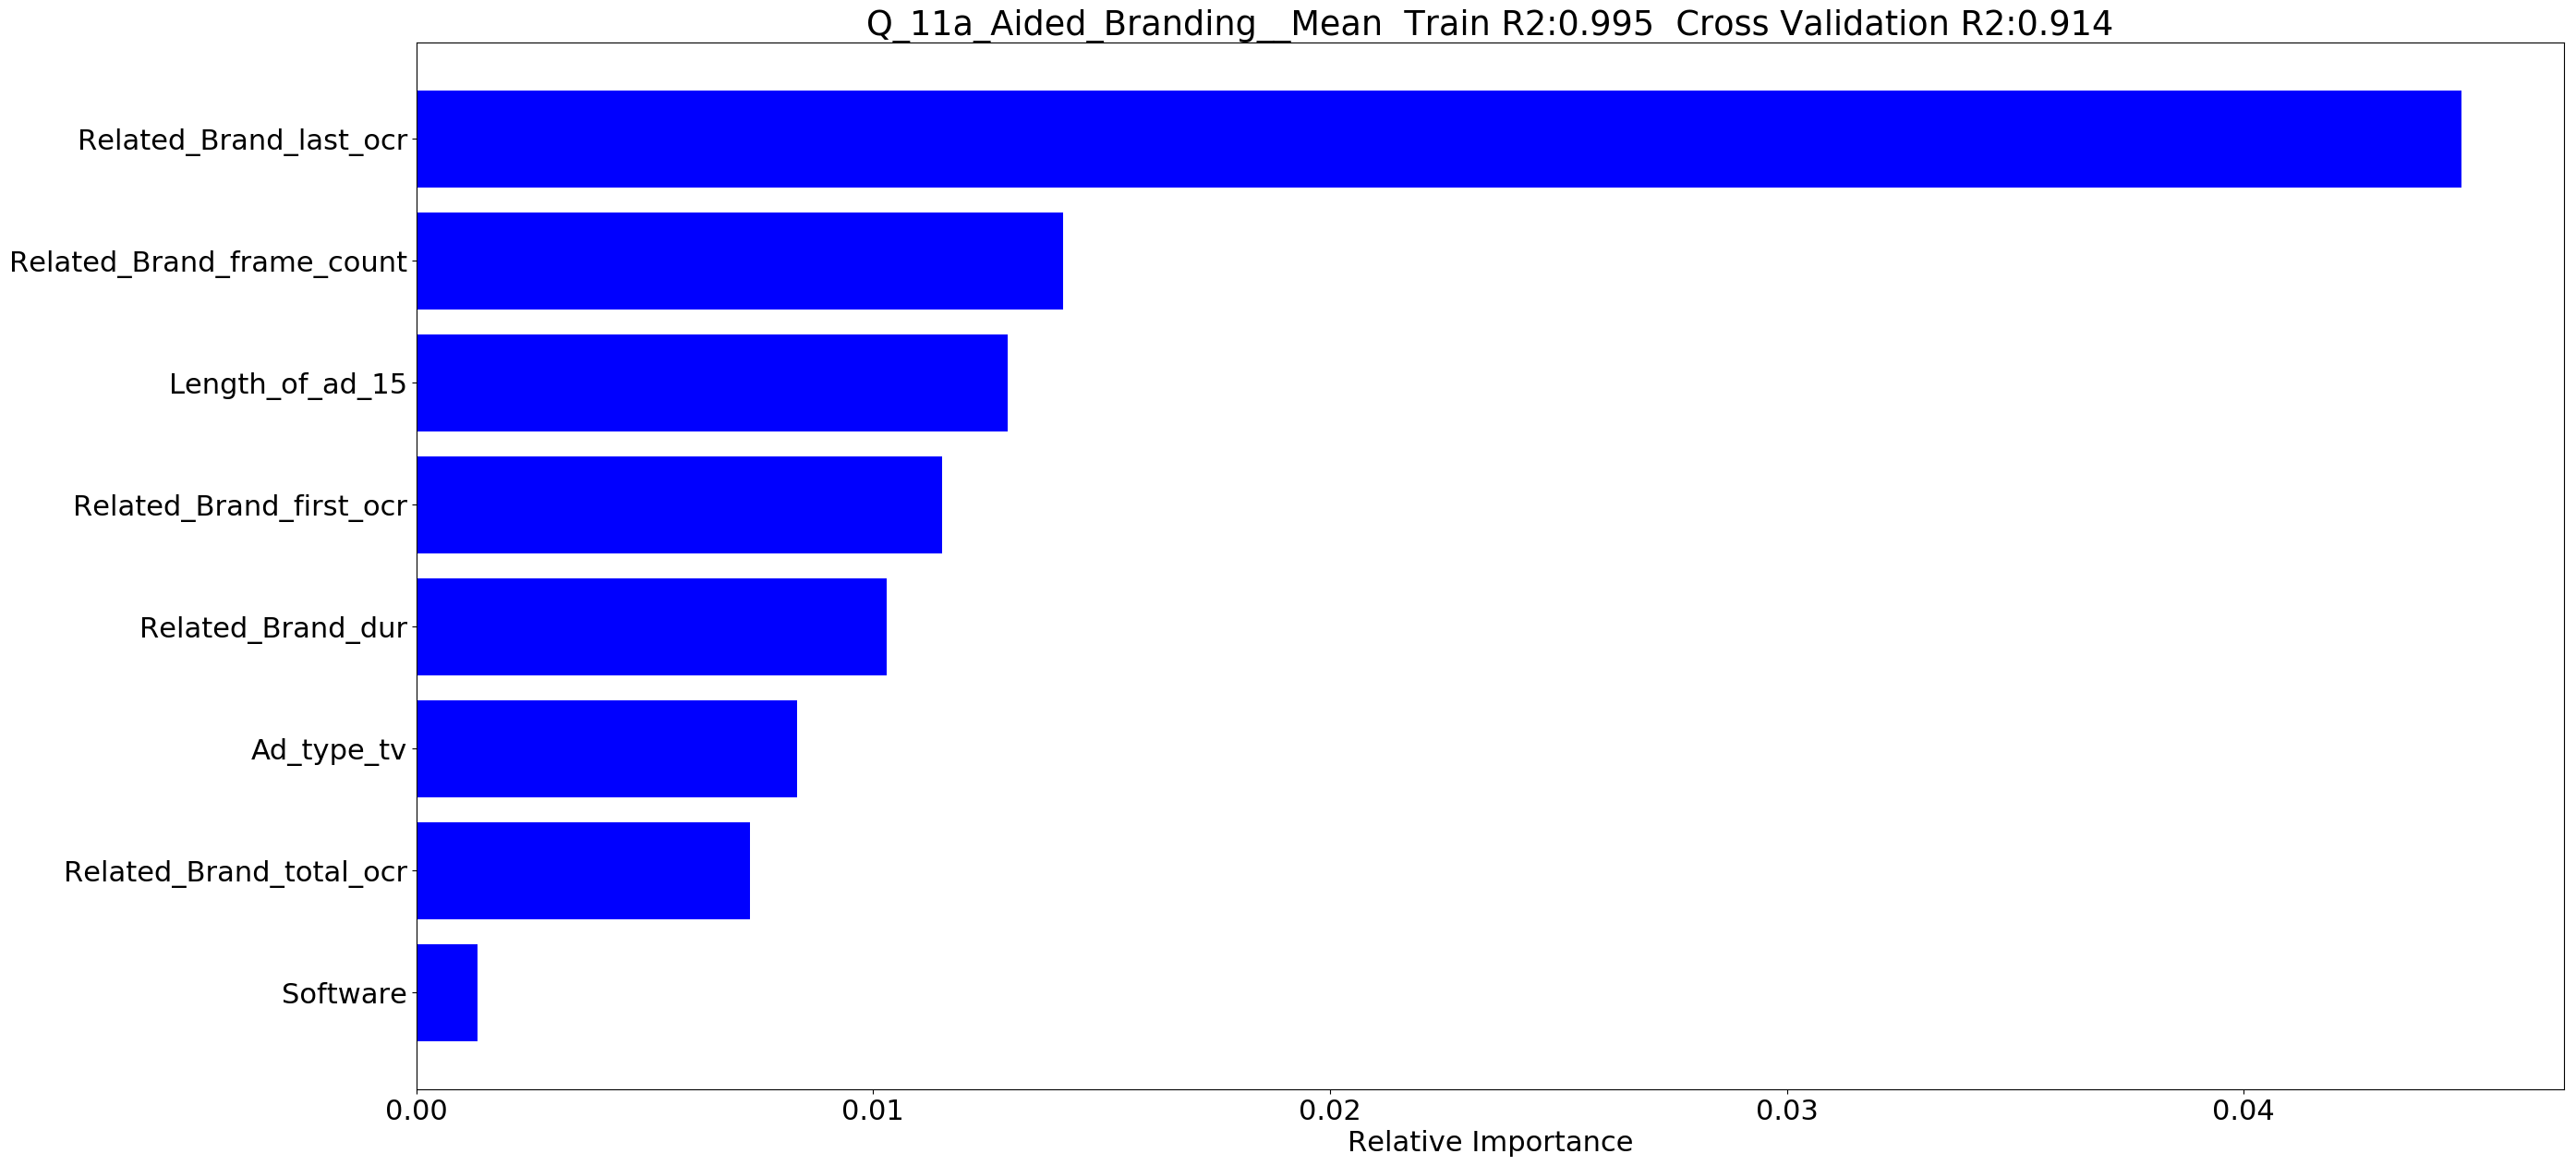

Q_7_8_9_Active_Involvement__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


R2_SCORE (training set): 0.995520
R2_SCORE (cross validation set): 0.917029
Feature ranking:
1. African_frame_count (0.096671)
2. African_total_duration (0.090517)
3. Software (0.066656)
4. Related_Brand_last_ocr (0.063948)
5. Age_35_4_African_frame_count (0.047853)
6. Length_of_ad_15 (0.044460)
7. Related_Brand_first_ocr (0.036326)
8. Age_25_34_African_frame_count (0.034211)
9. Windows 10_first_ocr (0.031432)
10. Surface Pro 4_first_ocr (0.026848)
11. Windows 10_frame_count (0.025402)
12. Age_25_34_frame_count (0.021976)
13. Windows 10_total_ocr (0.021012)
14. Surface Pro 4_last_ocr (0.020668)
15. Age_25_34_total_duration (0.017534)
16. Lenovo_dur (0.016655)
17. Windows 10_dur (0.016641)
18. Happiness_total_duration (0.014362)
19. Happiness_frame_count (0.013325)
20. Caucasian_total_duration (0.011381)
21. Caucasian_frame_count (0.011315)
22. Windows 10_last_ocr (0.011219)
23. Related_Brand_dur (0.010990)
24. Related_Brand_frame_count (0.010960)
25. Female_total_duration (0.010231)
26

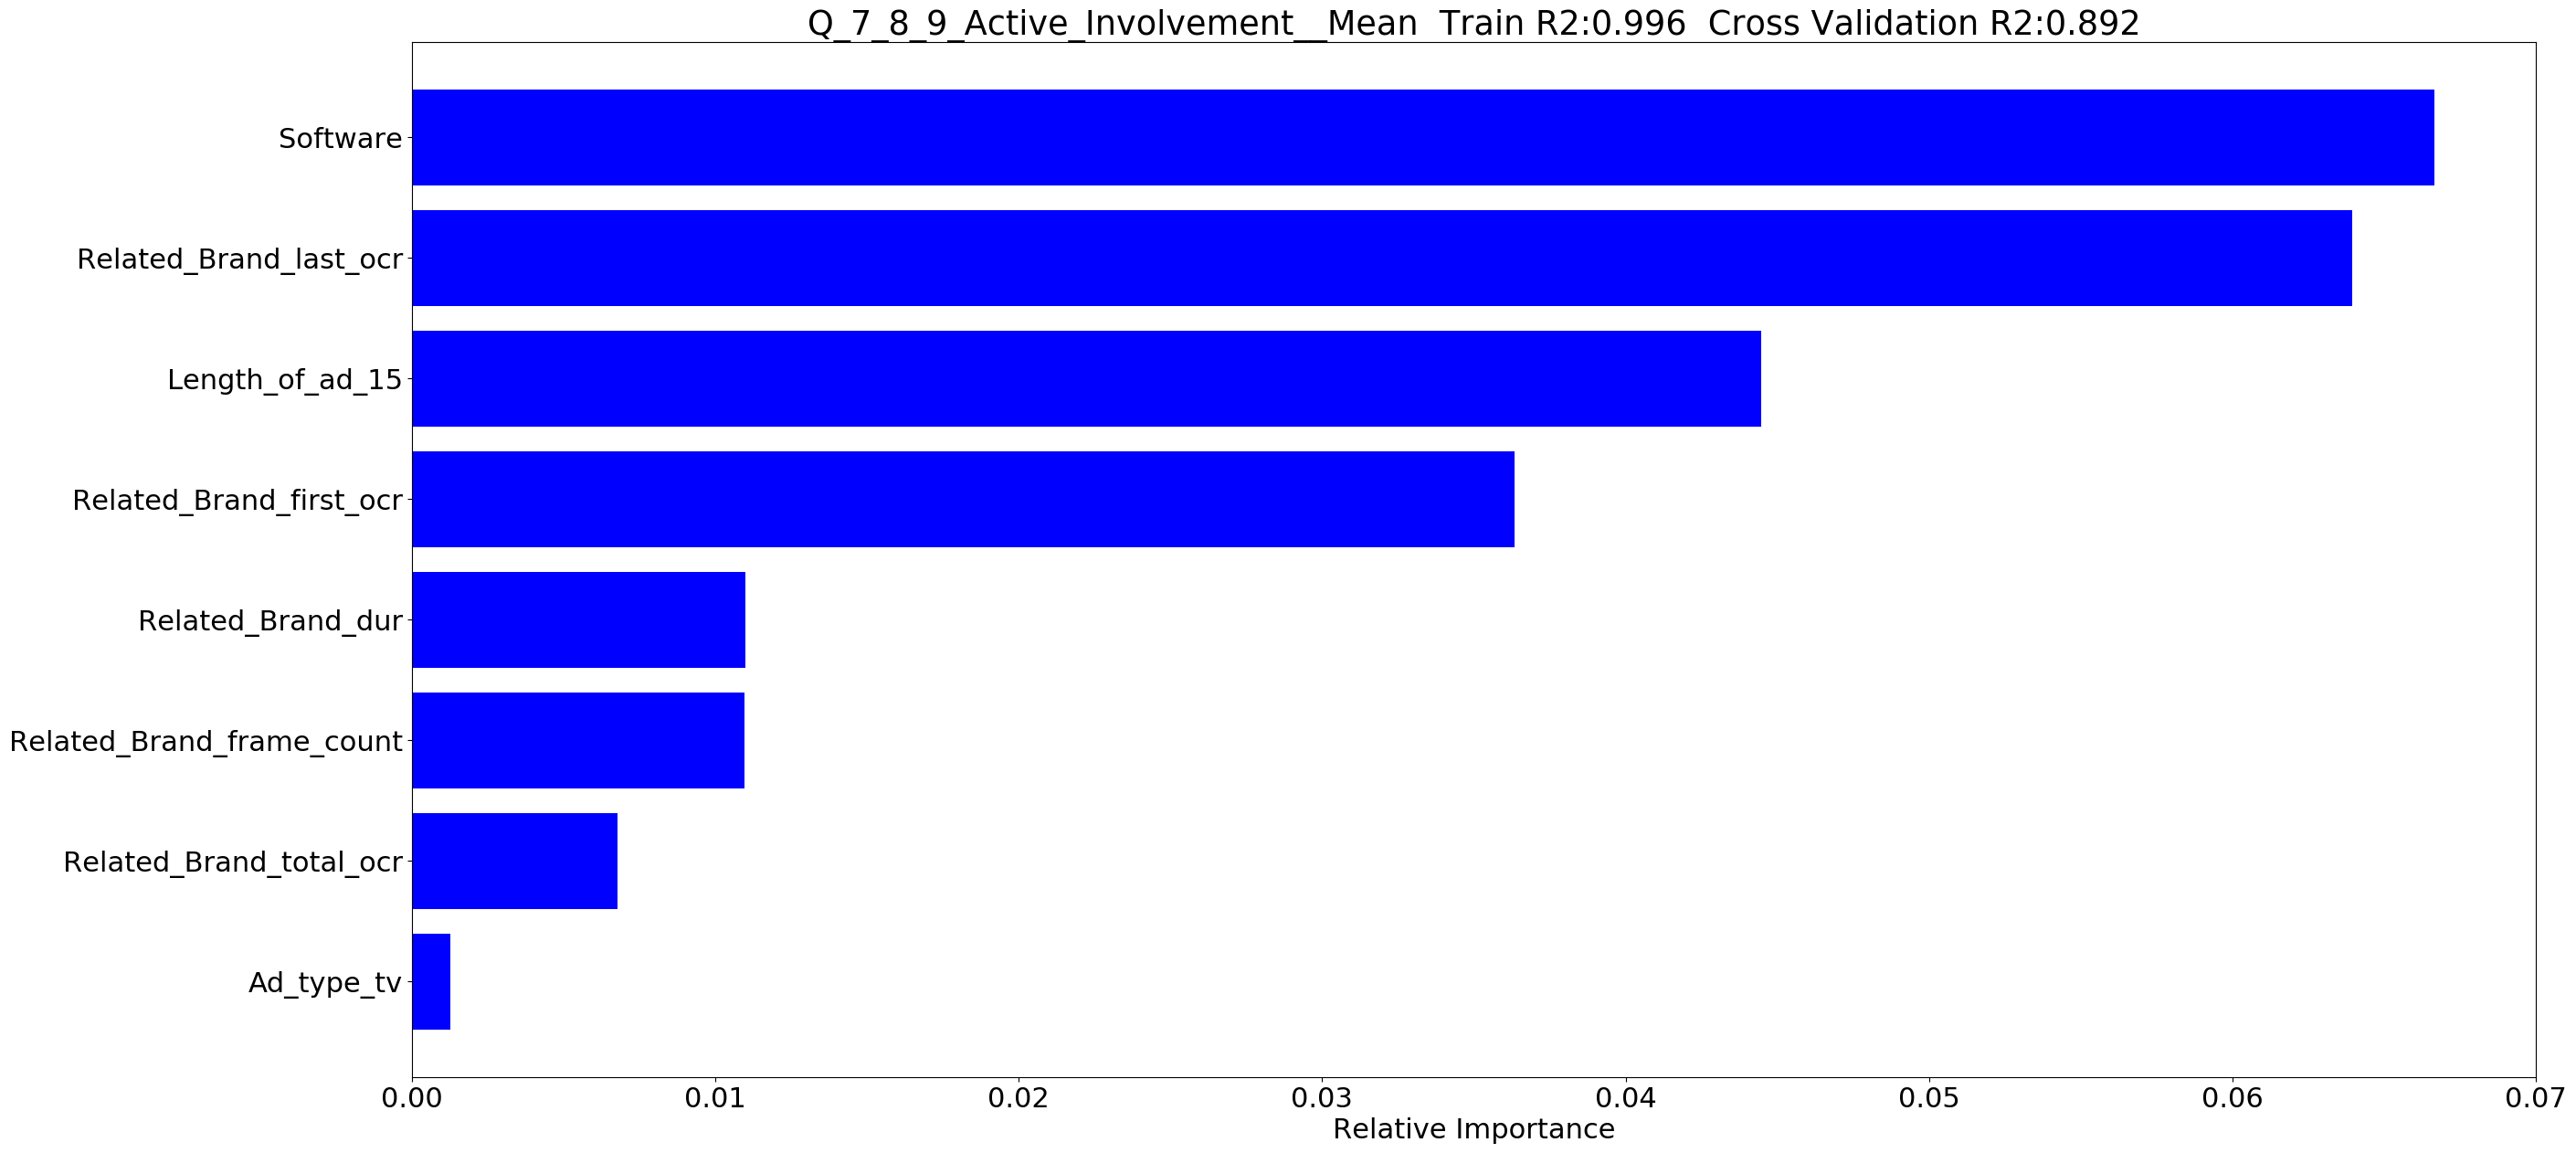

Q_35_New_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


R2_SCORE (training set): 0.998020
R2_SCORE (cross validation set): 0.953785
Feature ranking:
1. Software (0.156370)
2. Related_Brand_last_ocr (0.144945)
3. Lenovo_dur (0.067097)
4. Length_of_ad_15 (0.052558)
5. Windows 10_total_ocr (0.030378)
6. Related_Brand_first_ocr (0.029994)
7. Surface Pro 4_total_ocr (0.025915)
8. Windows 10_last_ocr (0.025205)
9. Related_Brand_total_ocr (0.023326)
10. Surface Pro 4_first_ocr (0.020743)
11. Windows 10_first_ocr (0.015364)
12. Unrelated_last_ocr (0.014777)
13. Windows 10_dur (0.013871)
14. Windows 10_frame_count (0.013309)
15. African_total_duration (0.011351)
16. Neutral_Age_25_34_frame_count (0.011075)
17. Neutral_total_duration (0.010811)
18. Caucasian_frame_count (0.010673)
19. Age_35_44 (0.010599)
20. Surface Book_first_ocr (0.010428)
21. Caucasian_total_duration (0.010360)
22. Unrelated_dur (0.010192)
23. Age_25_34_Eastasian_frame_count (0.009890)
24. Age_35_44_total_duration (0.009789)
25. Surface Pro 4_frame_count (0.009138)
26. Female_fra

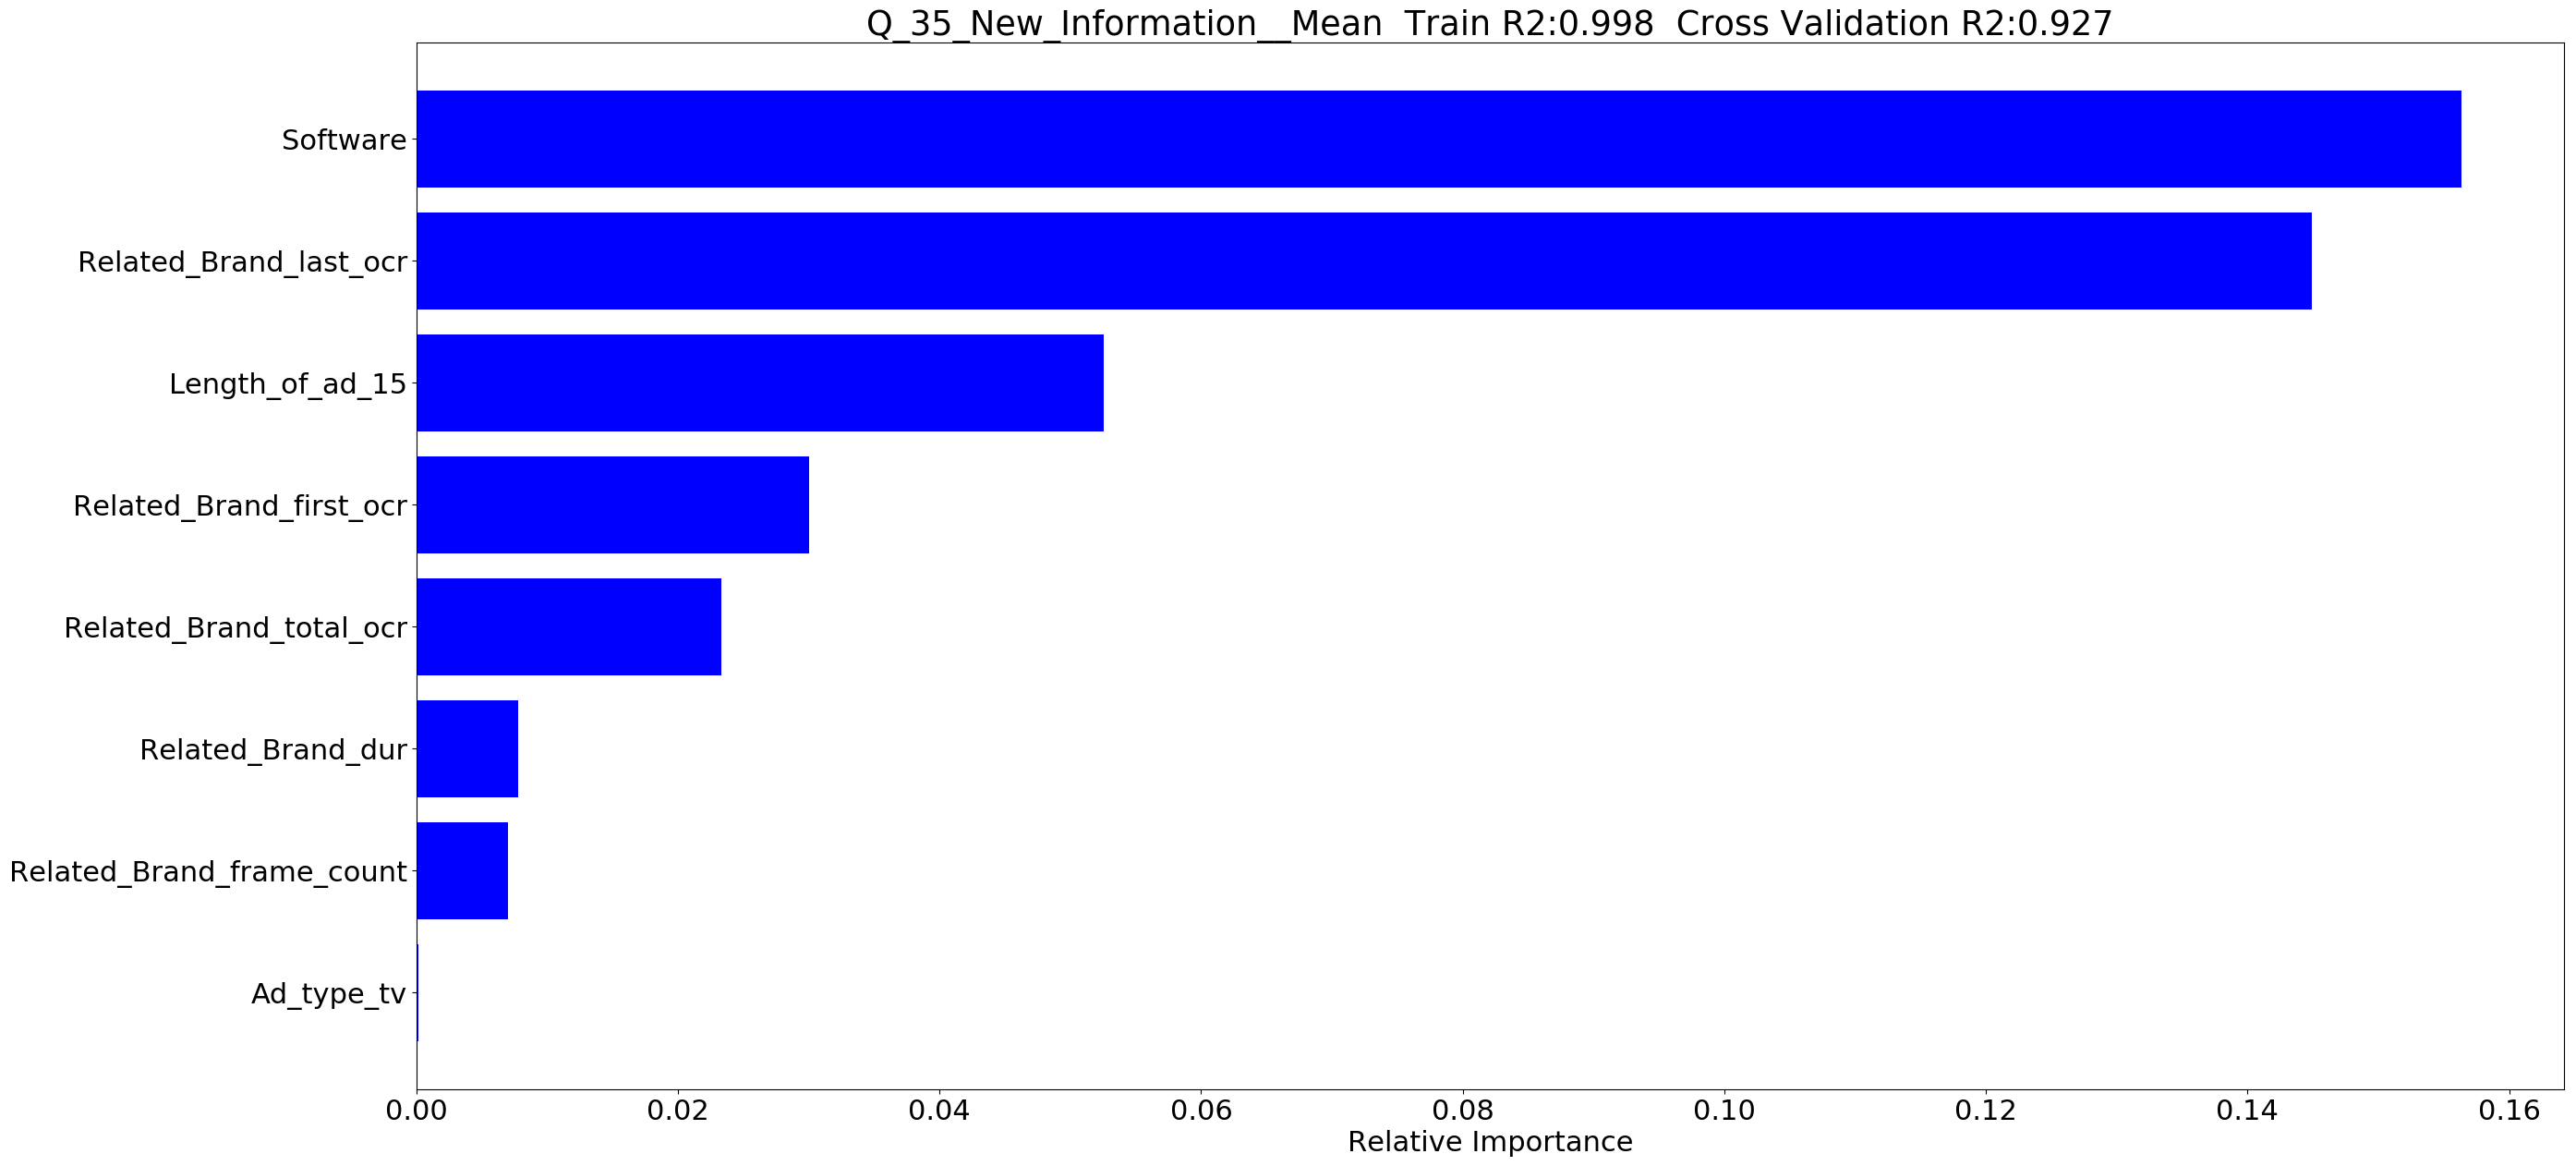

Q_6_Enjoyment__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


R2_SCORE (training set): 0.996986
R2_SCORE (cross validation set): 0.941423
Feature ranking:
1. Related_Brand_last_ocr (0.205210)
2. Length_of_ad_15 (0.118342)
3. Related_Brand_first_ocr (0.070406)
4. Surface Book_first_ocr (0.051676)
5. Surface Book_last_ocr (0.046496)
6. Surface Book_frame_count (0.026003)
7. Caucasian_frame_count (0.025457)
8. Caucasian_total_duration (0.024493)
9. Surface Book_dur (0.022427)
10. Surface Book_total_ocr (0.021930)
11. Happiness_Eastasian_frame_count (0.016712)
12. Surface Pro 4_dur (0.014757)
13. Unrelated_last_ocr (0.013793)
14. Happiness_total_duration (0.012998)
15. Surface Pro 4_frame_count (0.012542)
16. Happiness_frame_count (0.011577)
17. Unrelated_first_ocr (0.010792)
18. Neutral_total_duration (0.010060)
19. Age_25_34_total_duration (0.009797)
20. Windows 10_frame_count (0.009792)
21. Age_25_34_frame_count (0.009645)
22. Neutral_Male_frame_count (0.009613)
23. Age_25_34_Eastasian_frame_count (0.008811)
24. Neutral_frame_count (0.008675)
25. 

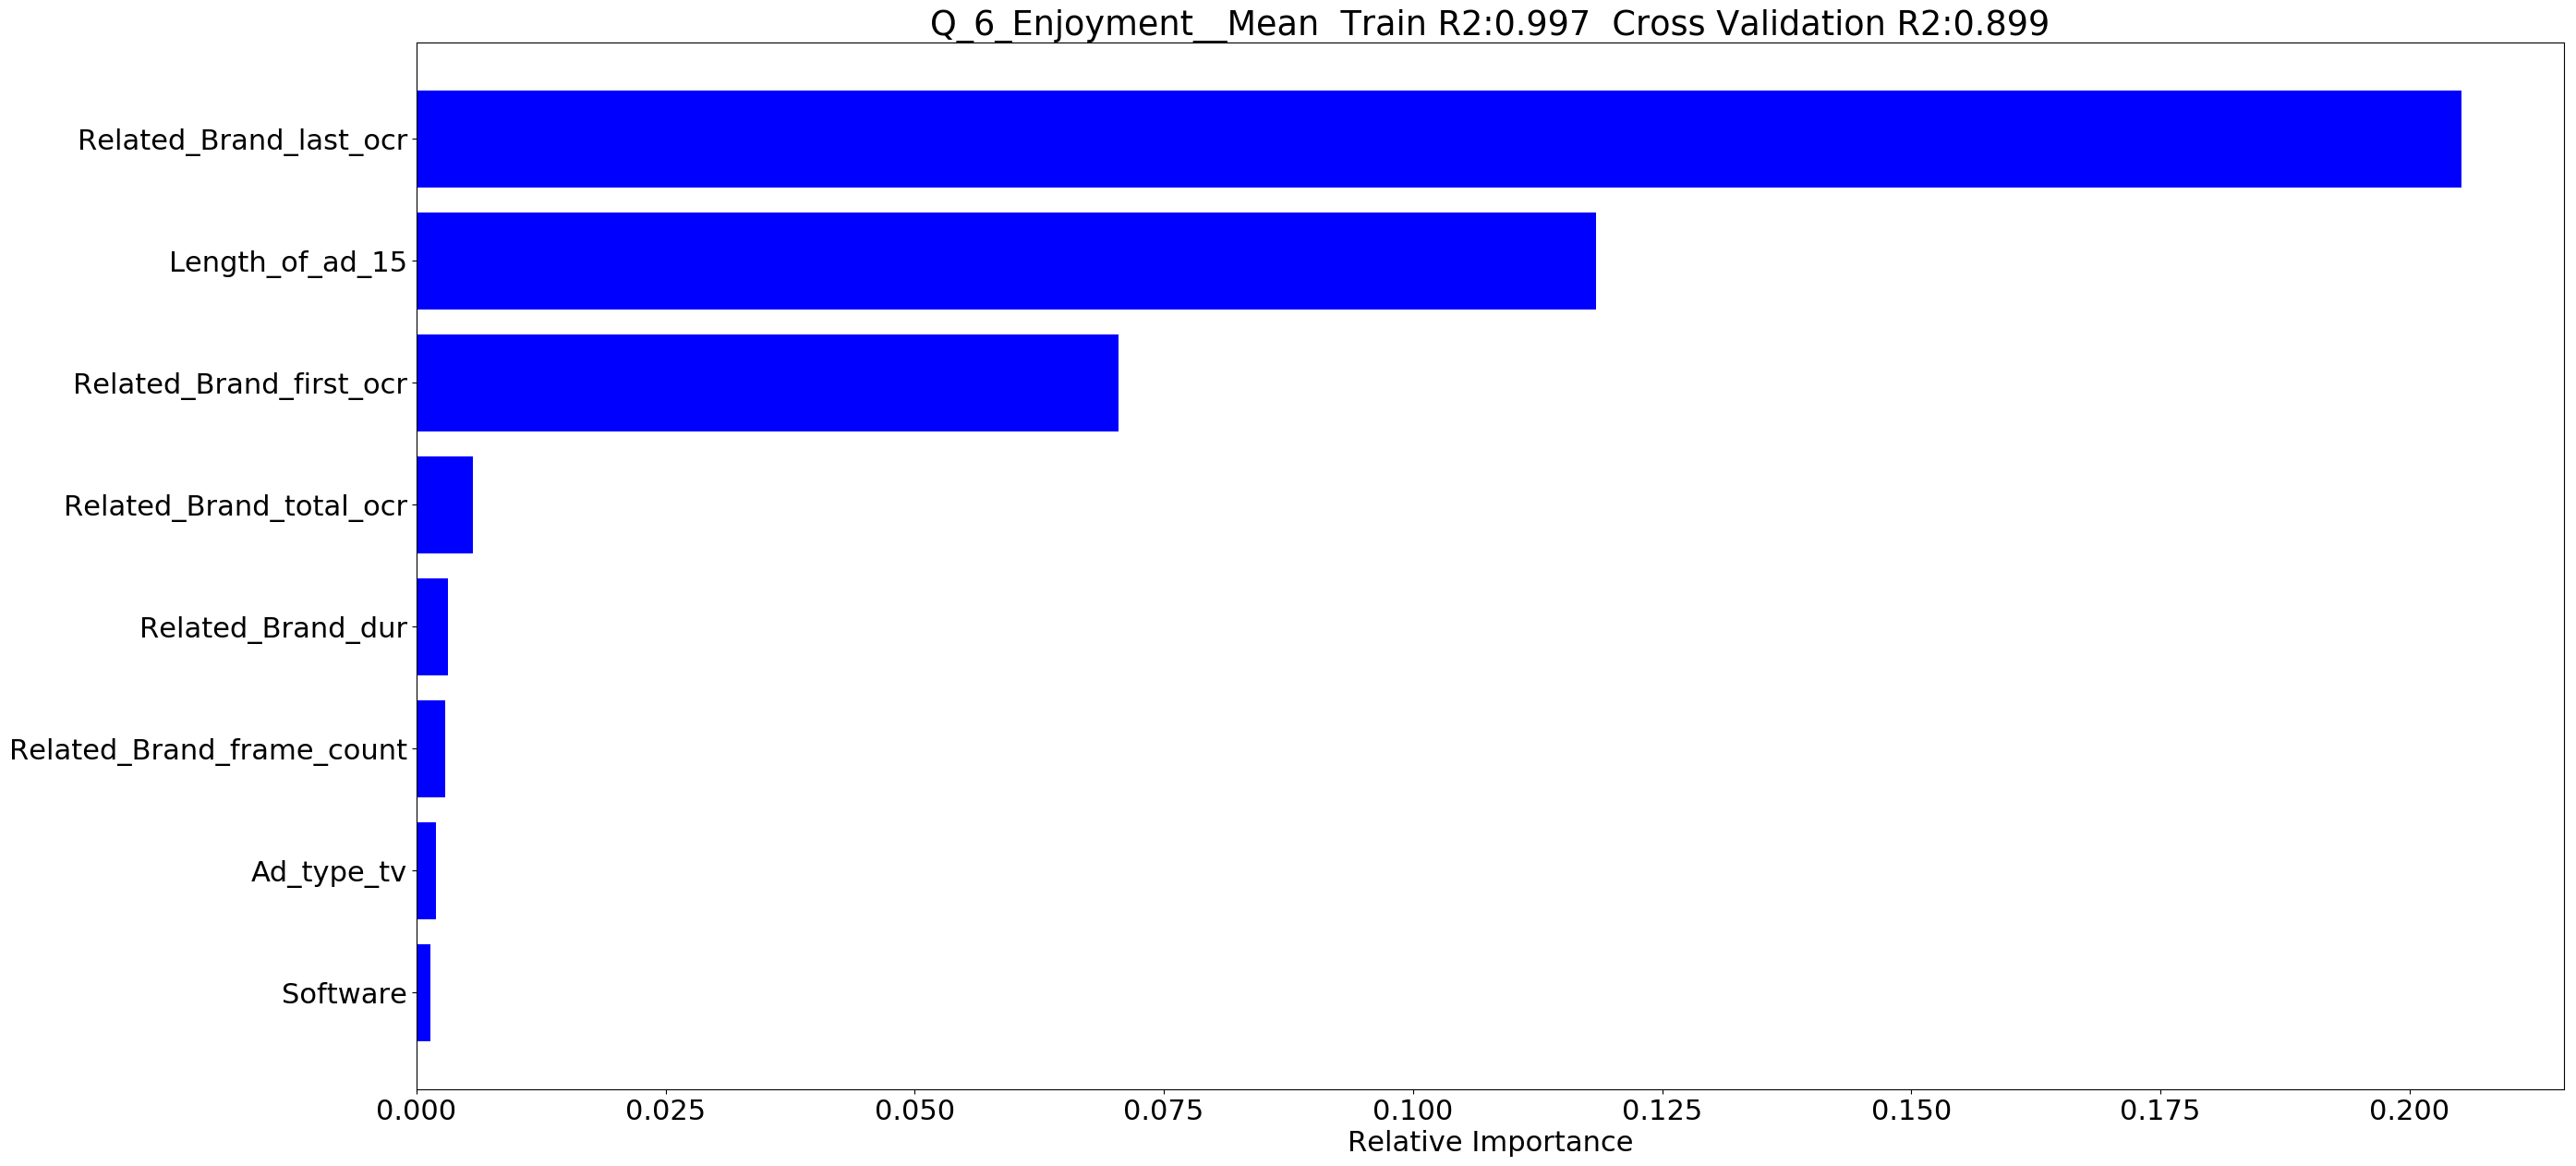

Q_20_Brand_Appeal__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


R2_SCORE (training set): 0.997086
R2_SCORE (cross validation set): 0.937454
Feature ranking:
1. Related_Brand_last_ocr (0.142516)
2. Length_of_ad_15 (0.119018)
3. Surface Book_first_ocr (0.067472)
4. Surface Book_last_ocr (0.039685)
5. Caucasian_total_duration (0.036079)
6. Caucasian_frame_count (0.035447)
7. Surface Book_total_ocr (0.029865)
8. Surface Book_frame_count (0.027256)
9. Surface Book_dur (0.025594)
10. Unrelated_last_ocr (0.017542)
11. Related_Brand_first_ocr (0.017413)
12. Software (0.016918)
13. Windows 10_first_ocr (0.016213)
14. Surface Pro 4_first_ocr (0.015991)
15. Male_total_duration (0.013374)
16. Windows 10_last_ocr (0.012695)
17. Neutral_frame_count (0.011923)
18. Neutral_total_duration (0.011846)
19. Surface Pro 4_last_ocr (0.011680)
20. Unrelated_first_ocr (0.011350)
21. Unrelated_total_ocr (0.011295)
22. Unrelated_dur (0.010969)
23. Male_frame_count (0.009757)
24. Neutral_Age_25_34_frame_count (0.008634)
25. African_total_duration (0.008537)
26. Age_25_34_East

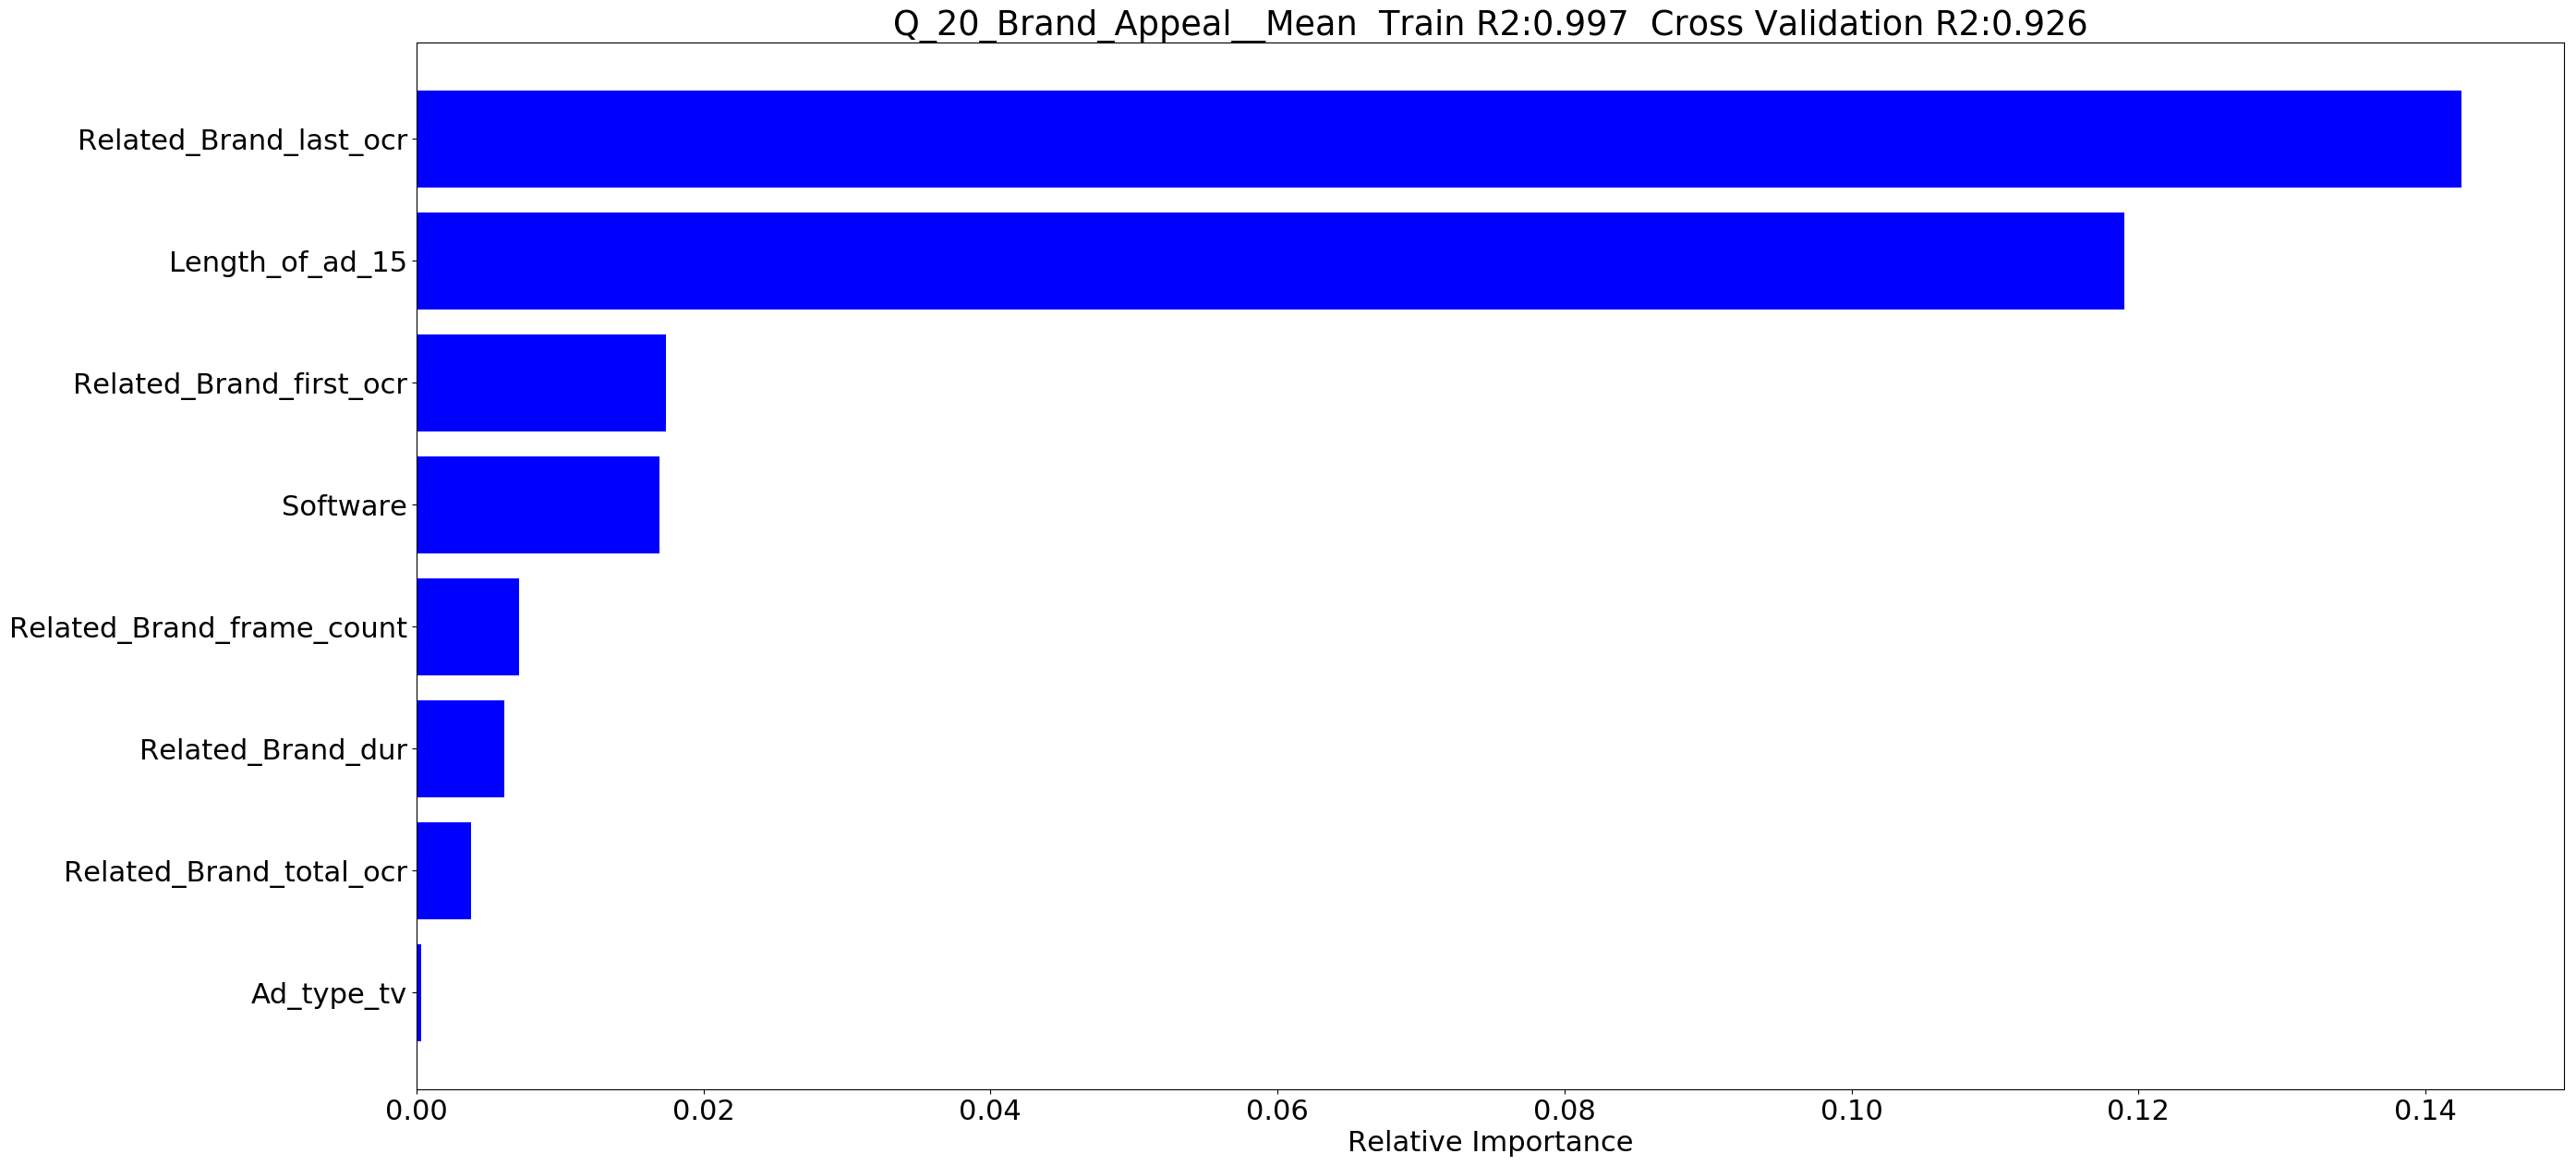

Q_32_Understanding__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


R2_SCORE (training set): 0.993599
R2_SCORE (cross validation set): 0.897145
Feature ranking:
1. Windows 10, Windows_total_ocr (0.064818)
2. Related_Brand_dur (0.042658)
3. Latino_total_duration (0.037260)
4. HP Spectre x360, Windows_frame_count (0.037053)
5. Latino_frame_count (0.034208)
6. Related_Brand_frame_count (0.033945)
7. Happiness_Female_frame_count (0.032795)
8. Age_25_34_Latino_frame_count (0.031014)
9. HP Spectre x360, Windows_dur (0.030366)
10. Windows 10_first_ocr (0.028292)
11. Male_total_duration (0.025665)
12. Neutral_Age_25_34_frame_count (0.024904)
13. Unrelated_dur (0.020275)
14. Related_Brand_first_ocr (0.020122)
15. Male_frame_count (0.019009)
16. Hp_frame_count (0.013436)
17. Unrelated_total_ocr (0.013266)
18. Related_Brand_last_ocr (0.013245)
19. Neutral_total_duration (0.012760)
20. Lenovo_dur (0.012042)
21. Neutral_frame_count (0.011031)
22. Lenovo_total_ocr (0.010540)
23. Lenovo_last_ocr (0.010388)
24. Unrelated_first_ocr (0.010197)
25. Age_15_24_frame_count 

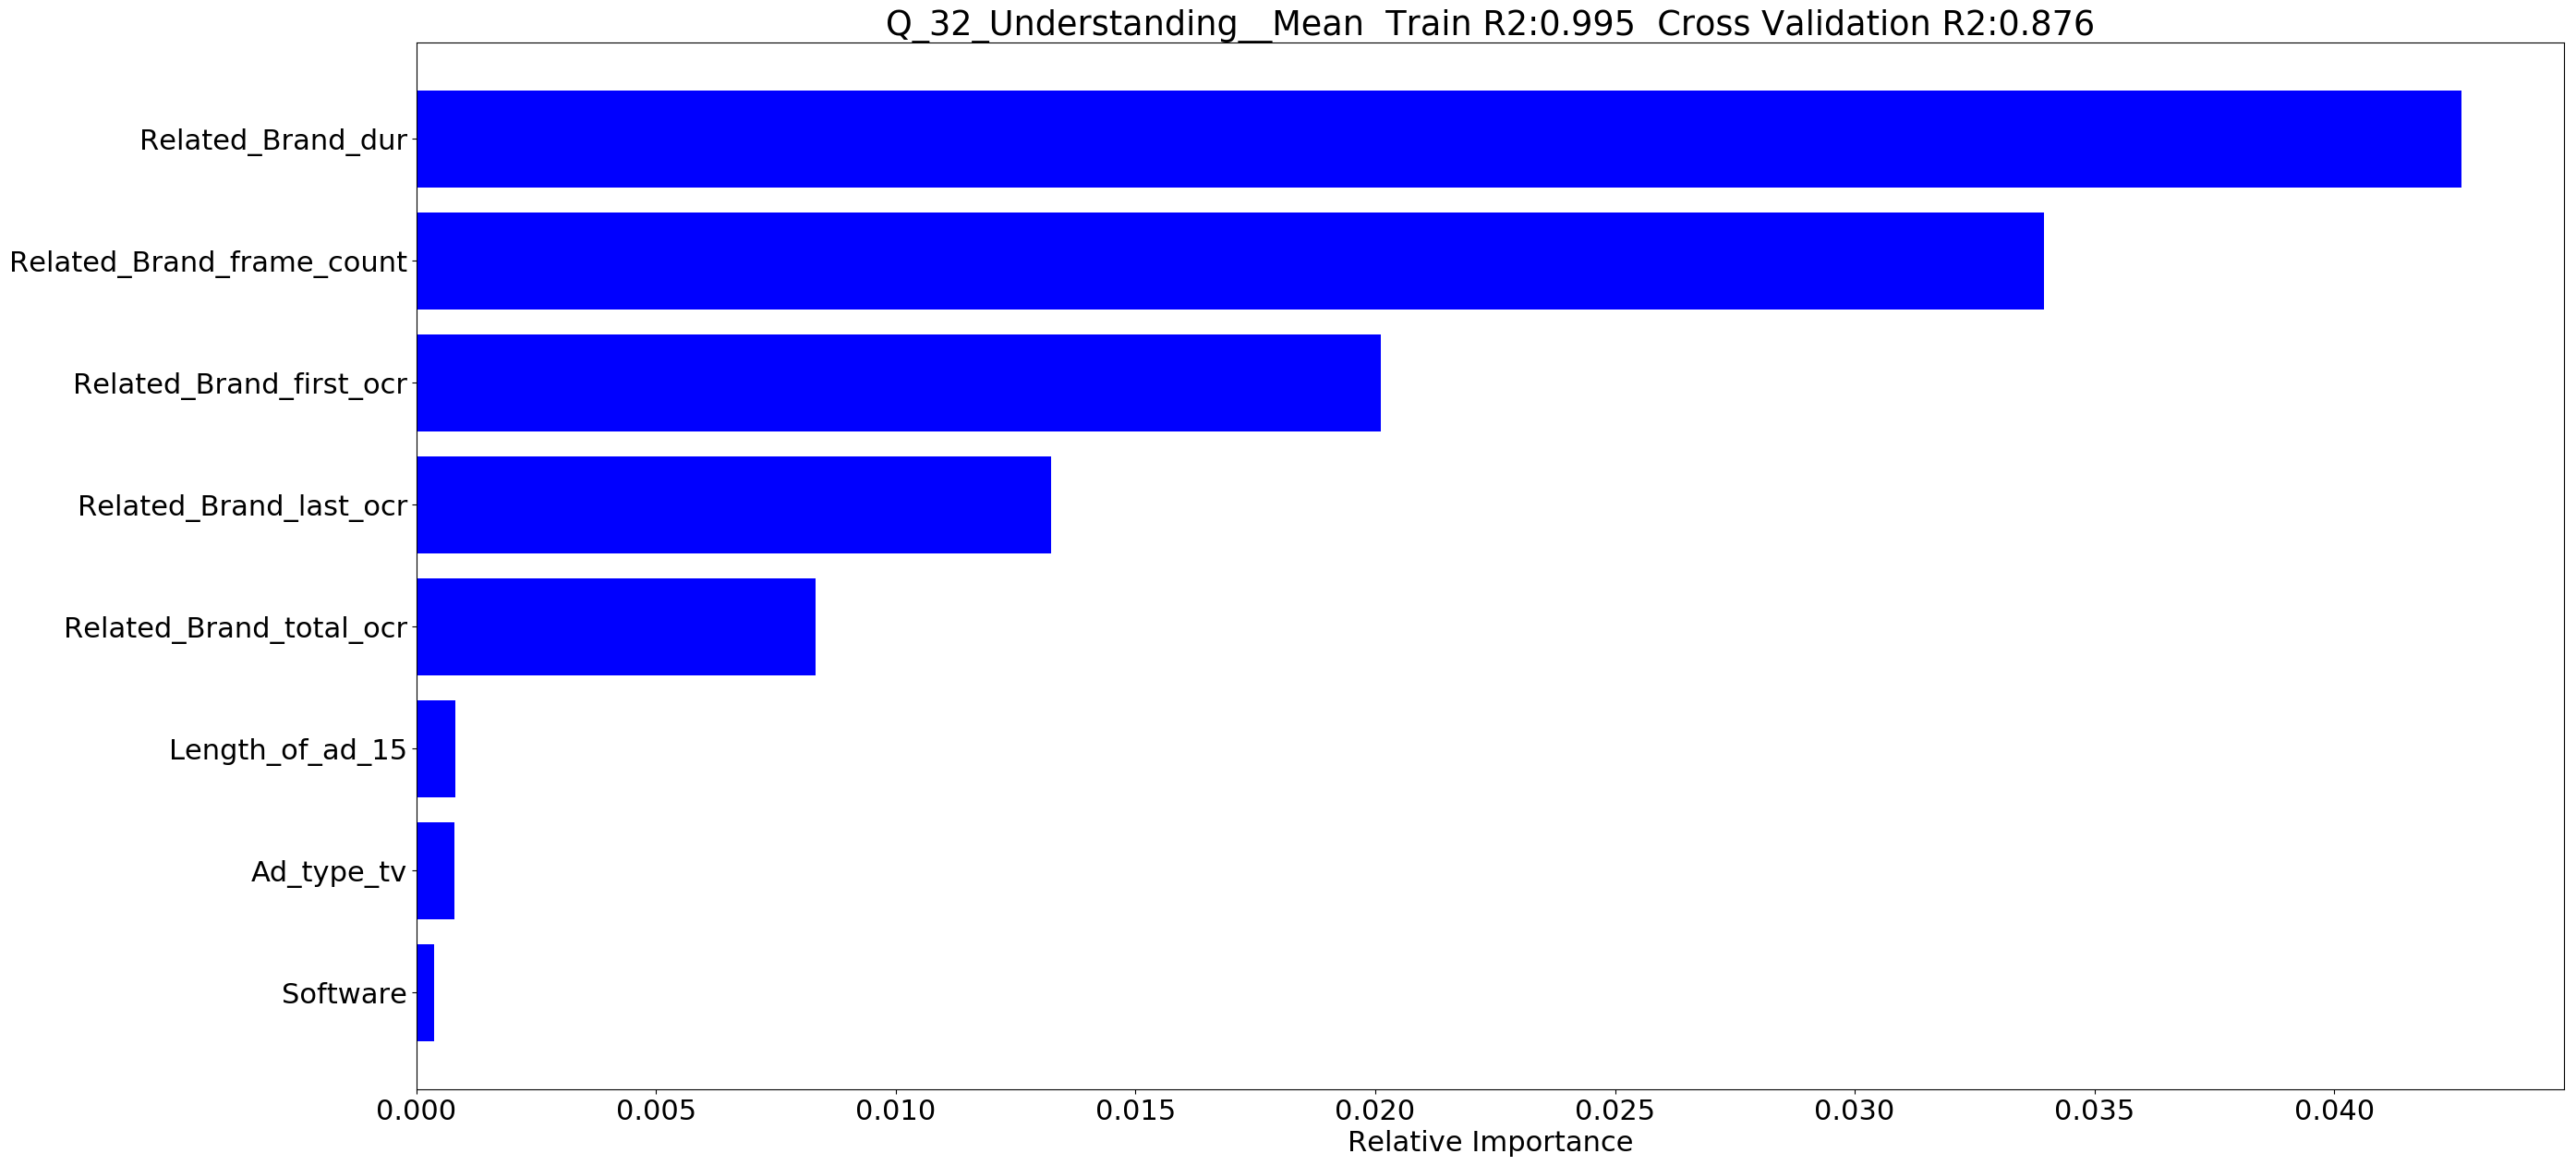

Q_33_Relevance_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


R2_SCORE (training set): 0.993680
R2_SCORE (cross validation set): 0.920936
Feature ranking:
1. Related_Brand_last_ocr (0.095348)
2. Length_of_ad_15 (0.066218)
3. Related_Brand_first_ocr (0.054016)
4. Unrelated_last_ocr (0.036584)
5. Asus_frame_count (0.026658)
6. Neutral_Age_25_34_frame_count (0.023126)
7. Male_total_duration (0.022343)
8. Happiness_frame_count (0.022328)
9. Male_frame_count (0.021413)
10. Happiness_total_duration (0.020834)
11. Age_25_34_frame_count (0.019557)
12. Age_25_34_total_duration (0.019314)
13. ASUS T102_total_ocr (0.019150)
14. African_frame_count (0.017116)
15. ASUS T102_dur (0.016537)
16. African_total_duration (0.015885)
17. Caucasian_total_duration (0.015626)
18. Asus_total_ocr.1 (0.015032)
19. ASUS T102_first_ocr (0.014804)
20. Asus_first_ocr.1 (0.014502)
21. Windows 10_last_ocr (0.013526)
22. ASUS T102_last_ocr (0.013157)
23. Surface Pro 4_last_ocr (0.012471)
24. Female_frame_count (0.012343)
25. Unrelated_total_ocr (0.012112)
26. Age_35_44 (0.011834)

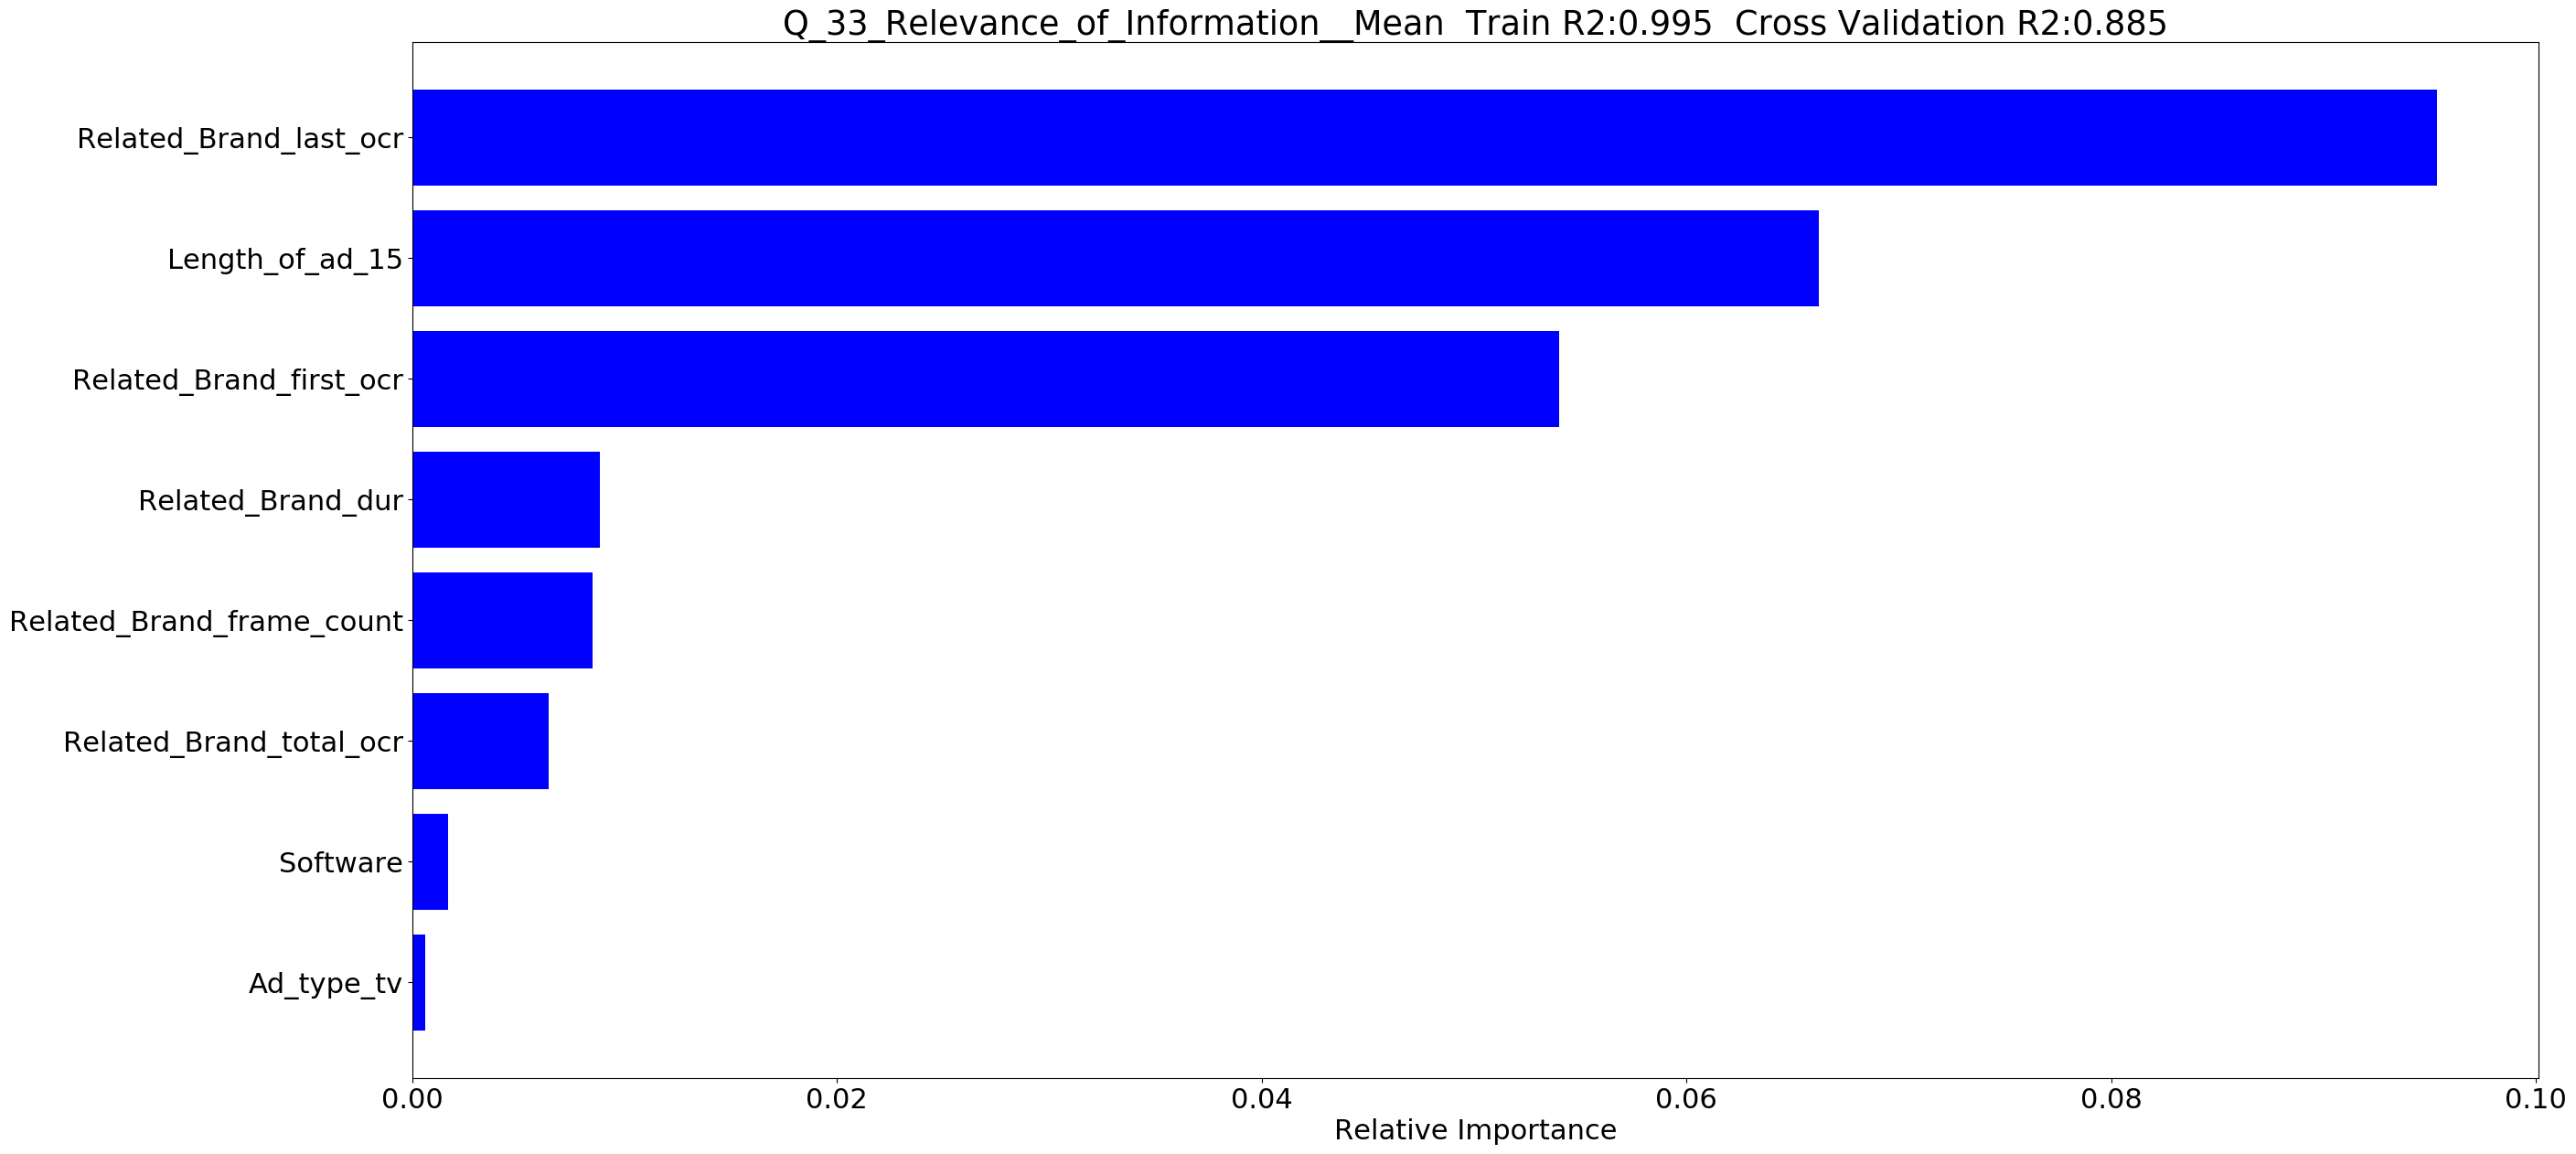

Q_34_Credibility_of_Information__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


R2_SCORE (training set): 0.988131
R2_SCORE (cross validation set): 0.886305
Feature ranking:
1. Related_Brand_last_ocr (0.064196)
2. Windows 10, Windows_total_ocr (0.057735)
3. Unrelated_last_ocr (0.042905)
4. Related_Brand_frame_count (0.033328)
5. Unrelated_total_ocr (0.031390)
6. Related_Brand_dur (0.027161)
7. Windows 10_first_ocr (0.027095)
8. Unrelated_dur (0.023588)
9. Windows 10_last_ocr (0.019649)
10. Unrelated_first_ocr (0.019569)
11. Windows 10, Windows_frame_count (0.019227)
12. Windows 10, Windows_last_ocr (0.018074)
13. Related_Brand_first_ocr (0.017566)
14. Caucasian_frame_count (0.017408)
15. Windows 10, Windows_dur (0.016689)
16. Neutral_frame_count (0.016235)
17. Windows 10, Windows_first_ocr (0.016018)
18. Caucasian_total_duration (0.015626)
19. Age_25_34_frame_count (0.015437)
20. Neutral_total_duration (0.015085)
21. Windows 10_dur (0.014377)
22. Related_Brand_total_ocr (0.014123)
23. Male_total_duration (0.014105)
24. Age_0_15_frame_count (0.012994)
25. Neutral_Ma

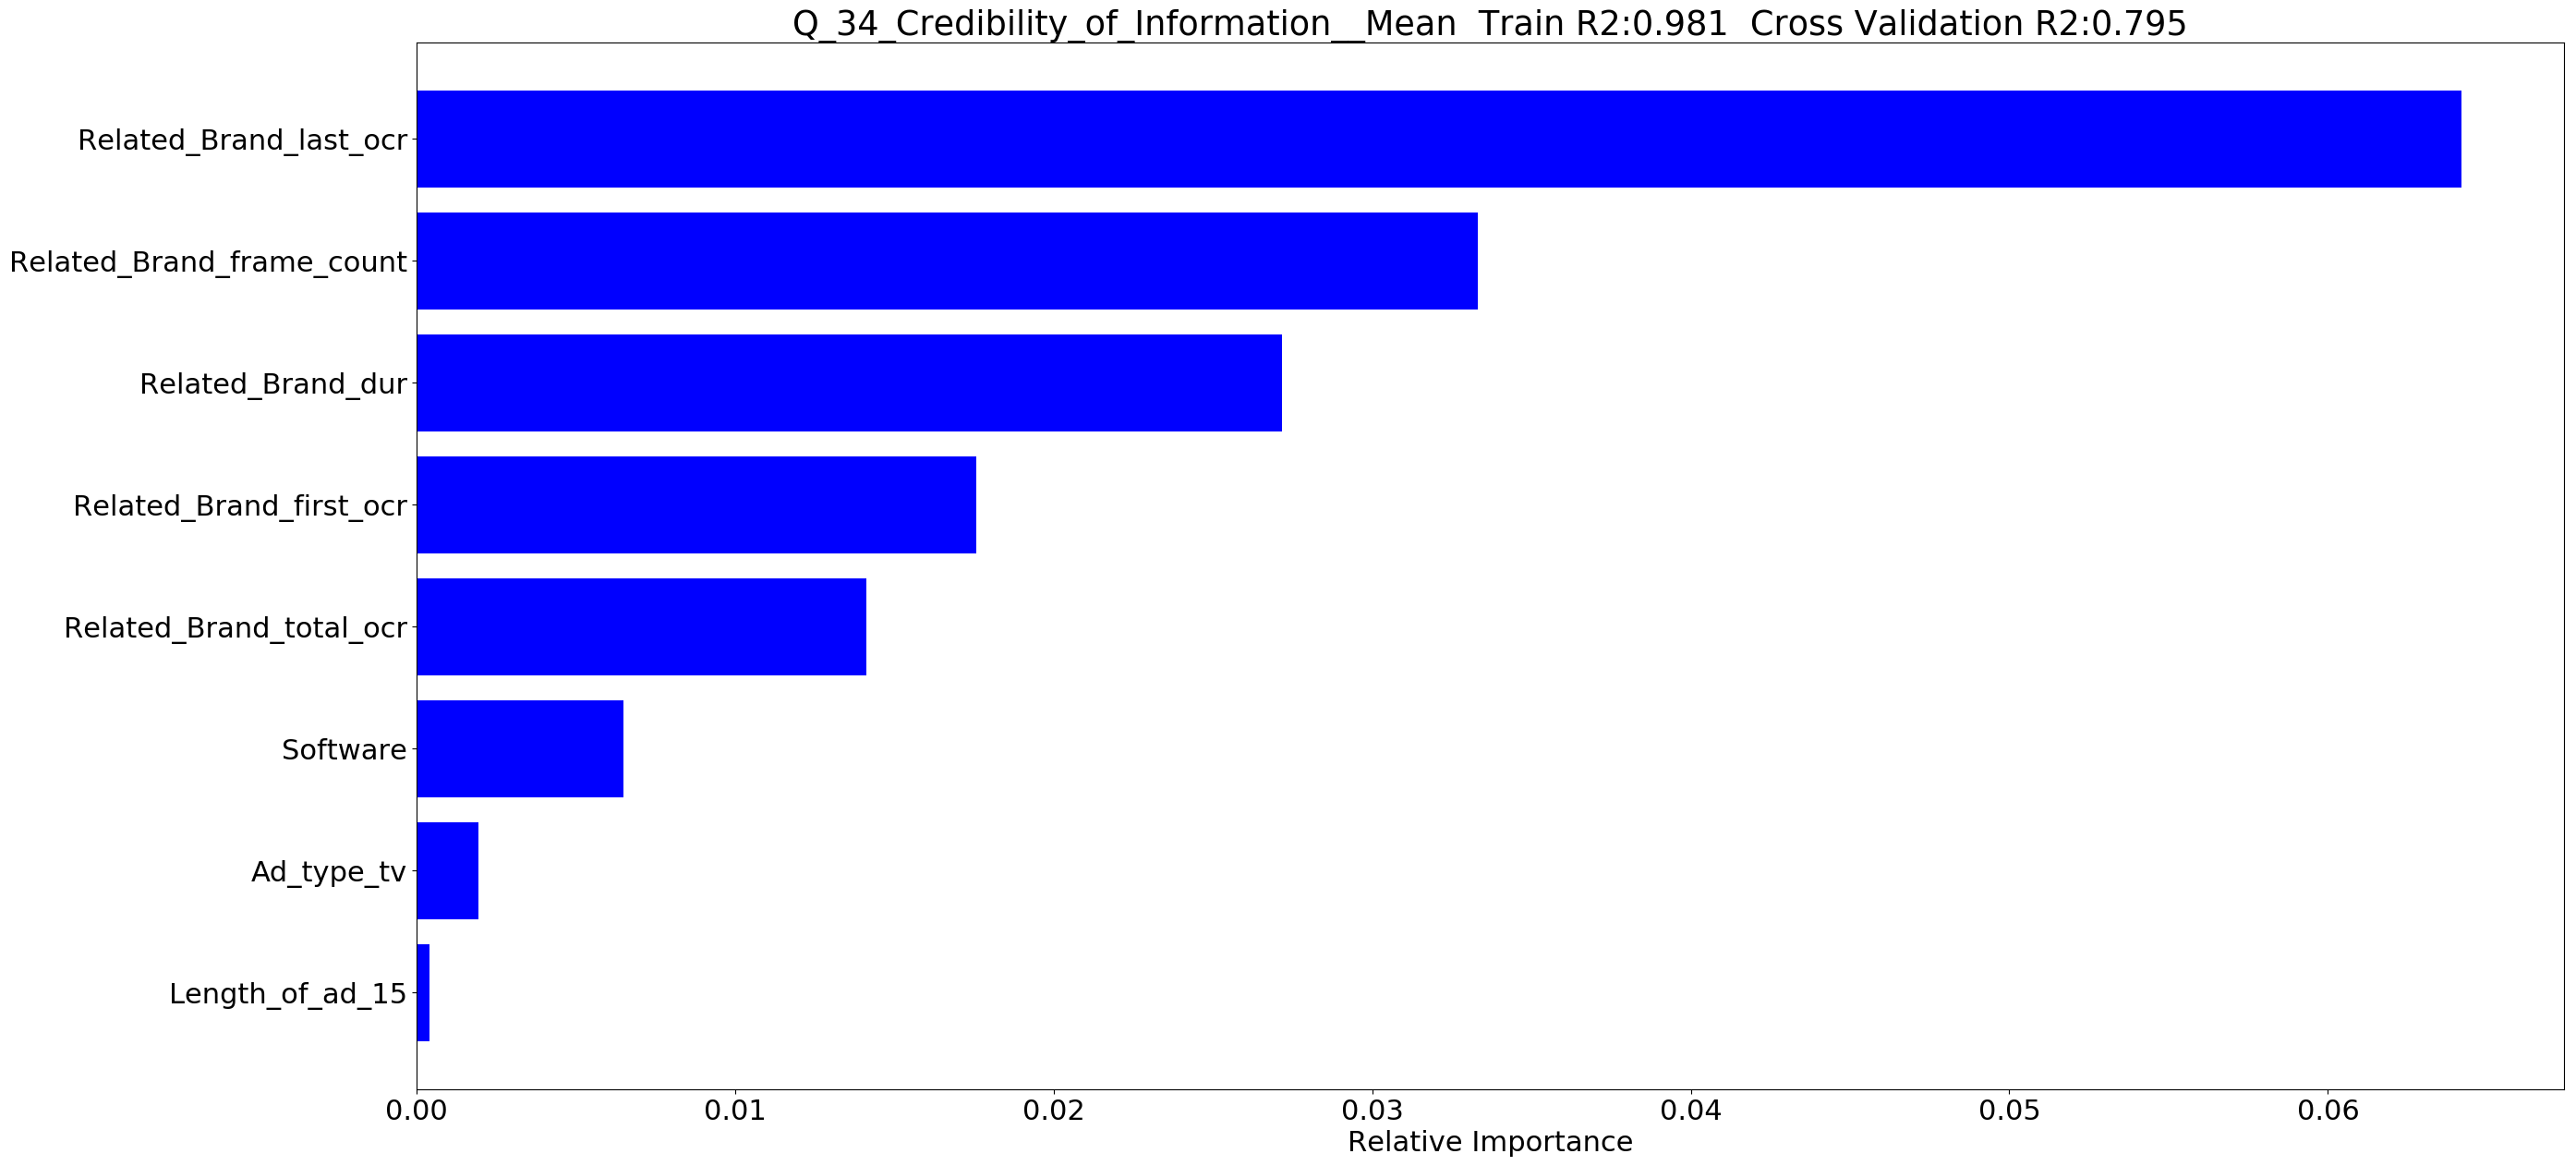

Q_35_New_Information__Mean.1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


R2_SCORE (training set): 0.997660
R2_SCORE (cross validation set): 0.955054
Feature ranking:
1. Related_Brand_last_ocr (0.164190)
2. Software (0.146167)
3. Lenovo_dur (0.073034)
4. Length_of_ad_15 (0.048326)
5. Windows 10_total_ocr (0.029885)
6. Surface Pro 4_total_ocr (0.029659)
7. Related_Brand_first_ocr (0.026995)
8. Related_Brand_total_ocr (0.023251)
9. Windows 10_last_ocr (0.023159)
10. Surface Pro 4_first_ocr (0.020685)
11. Surface Book_first_ocr (0.015682)
12. Windows 10_dur (0.015162)
13. Windows 10_frame_count (0.014196)
14. Windows 10_first_ocr (0.013944)
15. African_frame_count (0.011704)
16. Neutral_Age_25_34_frame_count (0.010774)
17. Unrelated_dur (0.010689)
18. Unrelated_last_ocr (0.010589)
19. Caucasian_frame_count (0.010290)
20. Age_35_44 (0.010287)
21. Age_35_44_total_duration (0.009844)
22. Caucasian_total_duration (0.009752)
23. Neutral_total_duration (0.009453)
24. Happiness_Female_frame_count (0.008989)
25. African_total_duration (0.008388)
26. Age_25_34_Eastasian

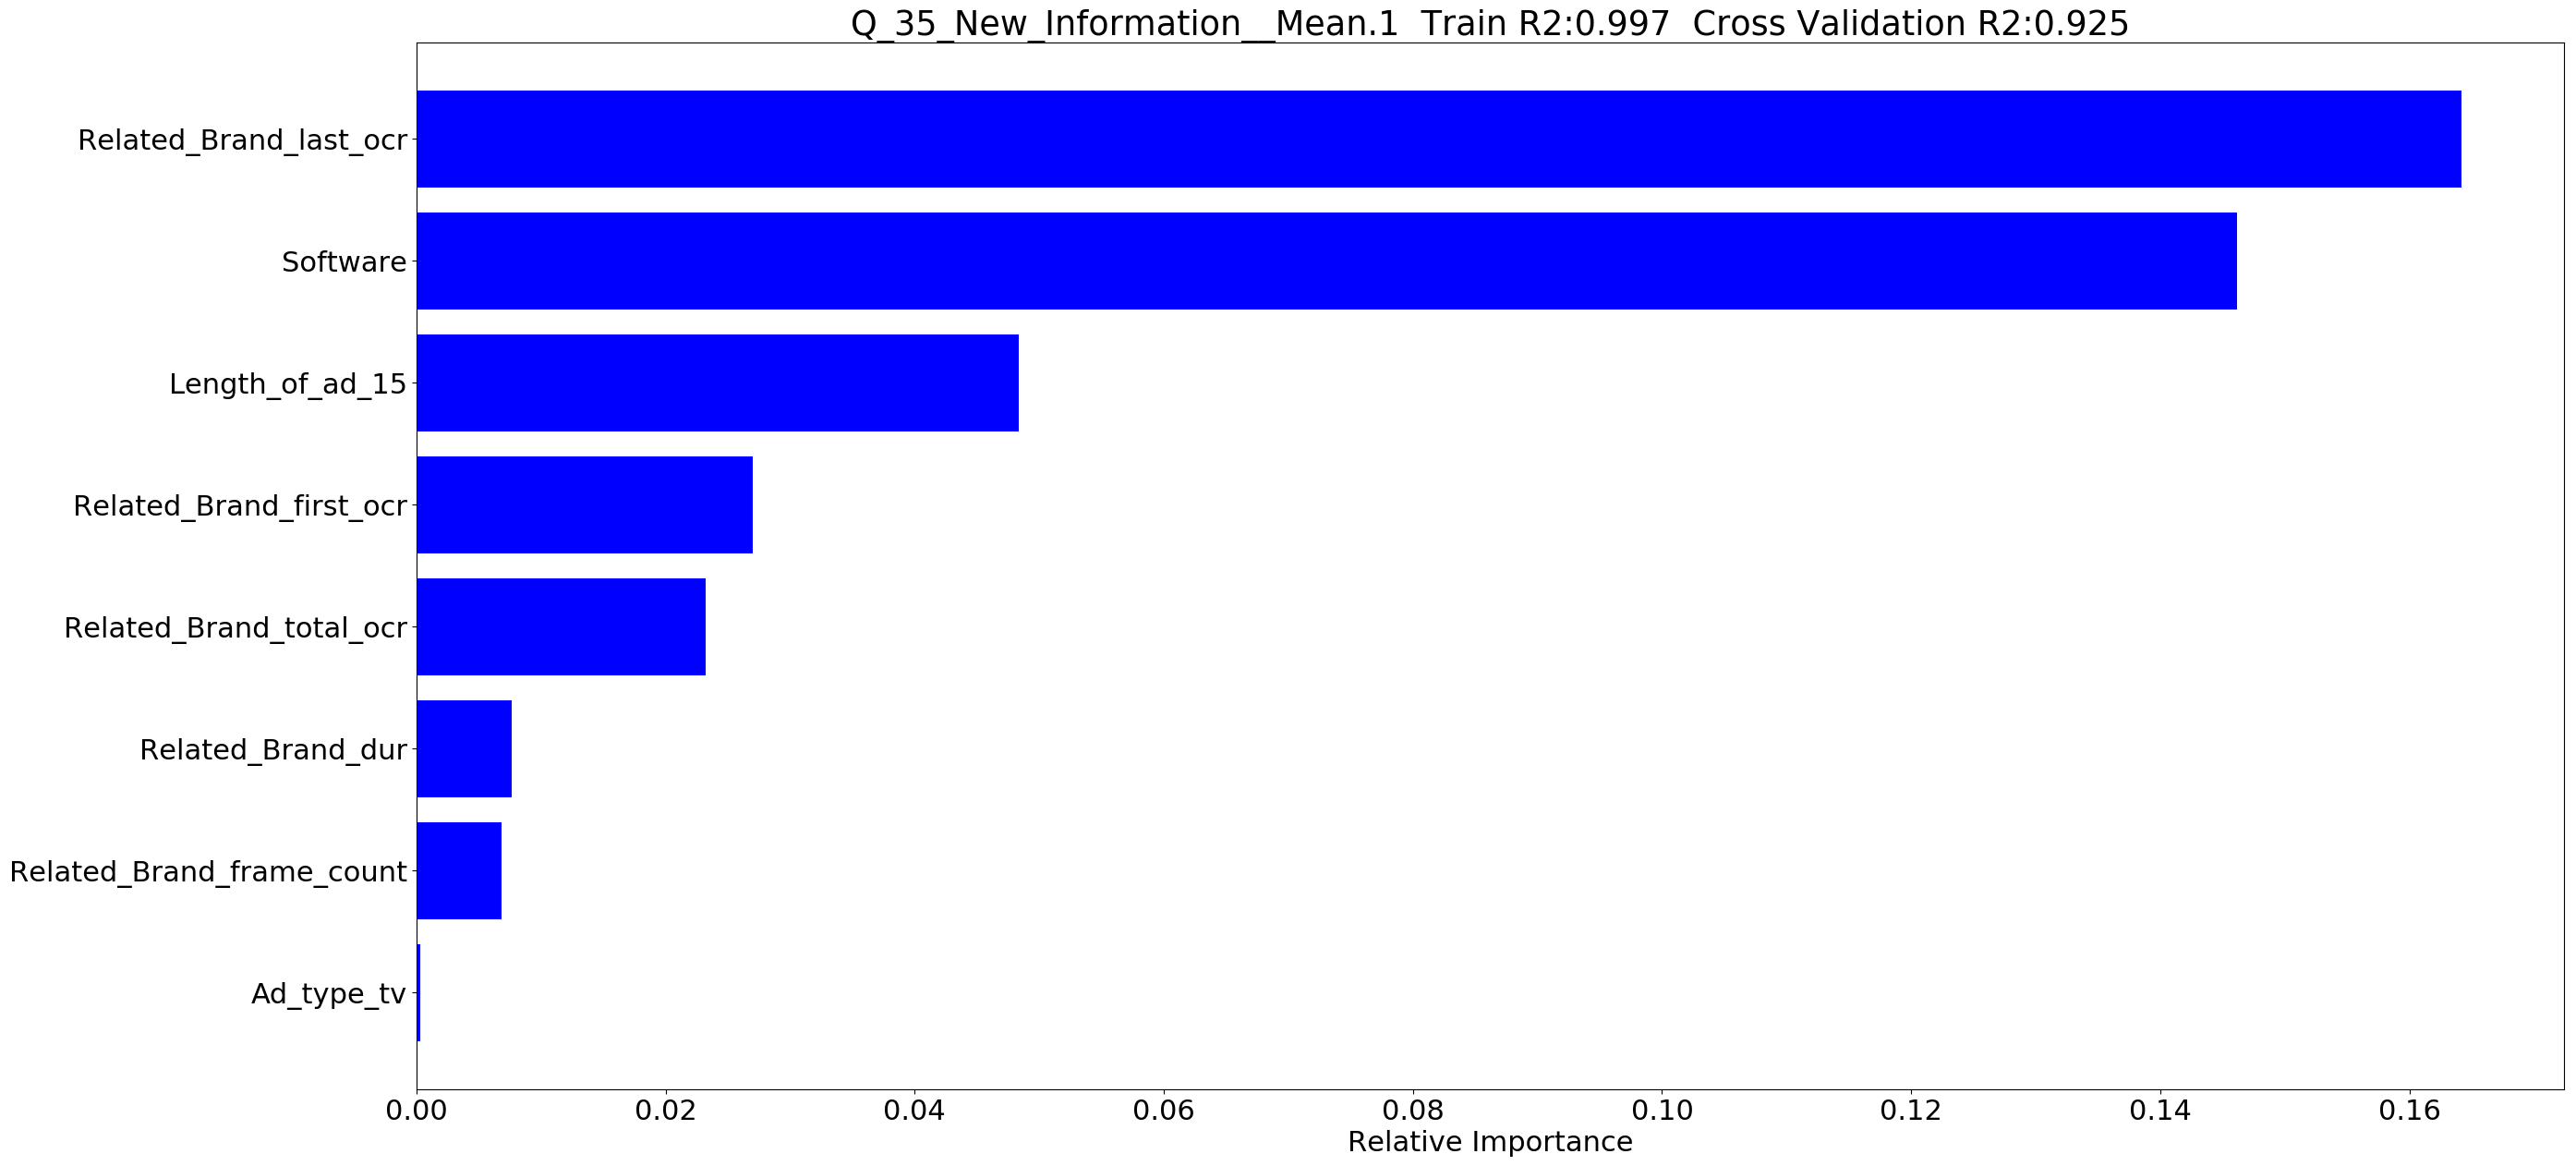

Q_36_Brand_Difference__Mean


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


R2_SCORE (training set): 0.997014
R2_SCORE (cross validation set): 0.932051
Feature ranking:
1. Related_Brand_last_ocr (0.155336)
2. Length_of_ad_15 (0.093526)
3. Caucasian_total_duration (0.053957)
4. Caucasian_frame_count (0.050580)
5. Windows 10_total_ocr (0.038564)
6. Windows 10_last_ocr (0.036009)
7. Surface Pro 4_first_ocr (0.032486)
8. Windows 10_first_ocr (0.025393)
9. Age_25_34_African_frame_count (0.022270)
10. Windows 10_dur (0.021662)
11. Lenovo_dur (0.019968)
12. Surface Pro 4_last_ocr (0.019611)
13. Age_25_34_Eastasian_frame_count (0.017968)
14. Windows 10_frame_count (0.015201)
15. Surface Book_last_ocr (0.014631)
16. Related_Brand_first_ocr (0.014352)
17. Surface Book_first_ocr (0.012518)
18. Software (0.010992)
19. African_frame_count (0.010775)
20. African_total_duration (0.010178)
21. Age_15_24_African_frame_count (0.007965)
22. Unrelated_last_ocr (0.007764)
23. Unrelated_first_ocr (0.007652)
24. Age_25_34_frame_count (0.007173)
25. Age_15_24_total_duration (0.006951

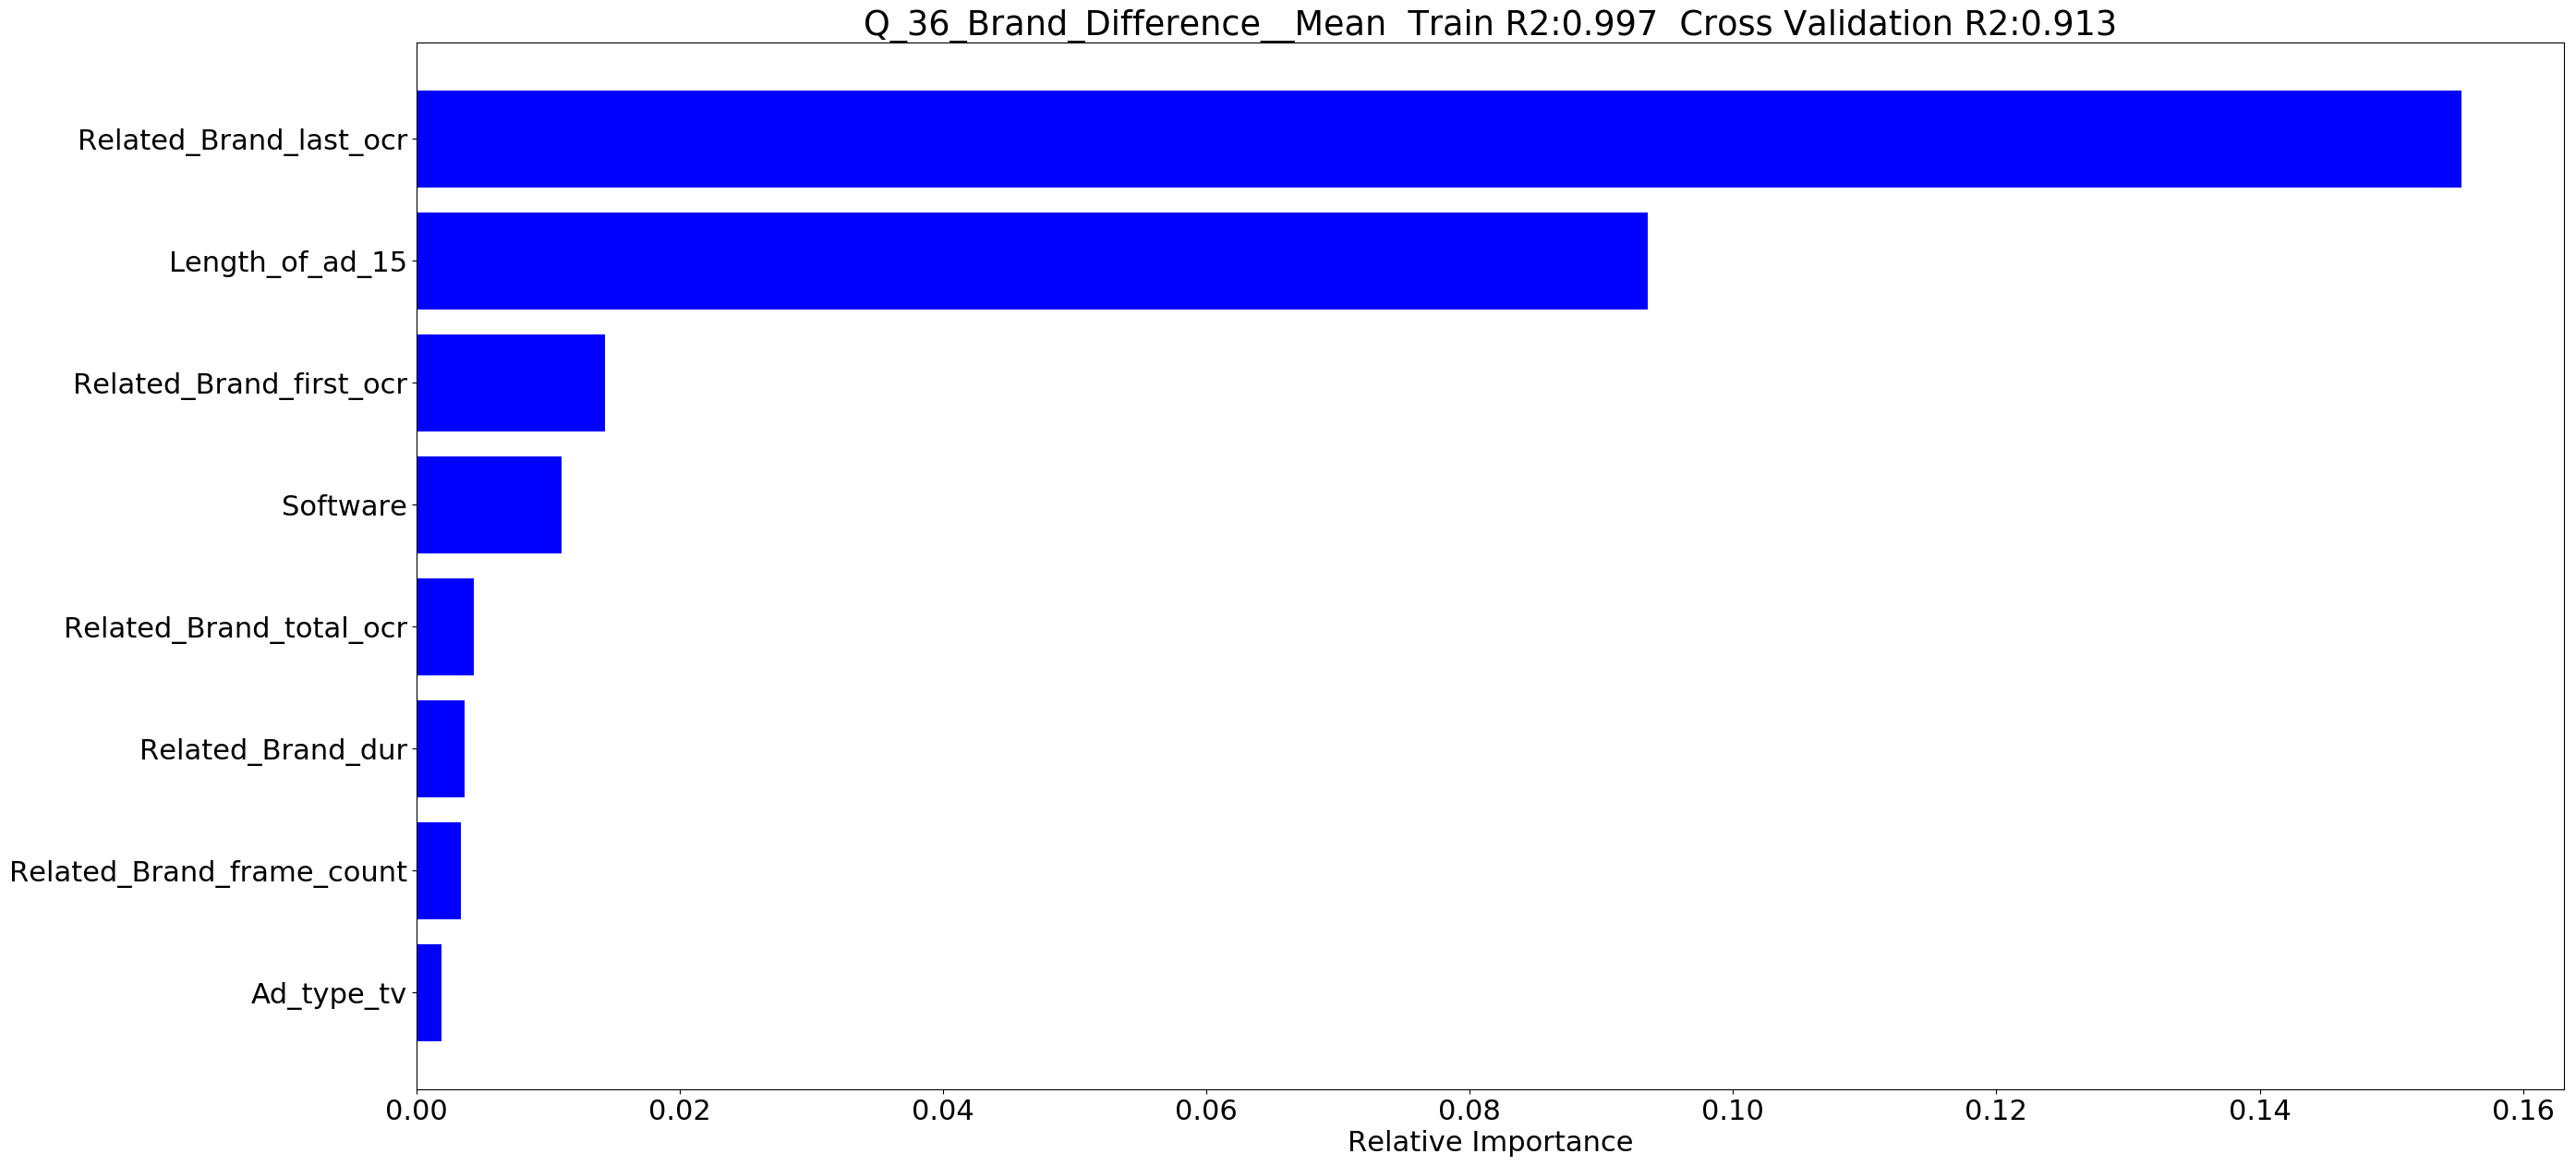

In [43]:
train_pred_rf=[]
test_pred_rf=[]
for i in range(len(resamp_target_df.columns)):
    print(resamp_target_df.columns[i])
    X, y = resamp_inputs_df.drop('Video_name',1),resamp_target_df[resamp_target_df.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    
    forest = RandomForestRegressor()
    #### Grid Search CV
#     print("Search starts")
#     hyper_tuning = GridSearchCV(forest,param_grid=parameters,cv=3,return_train_score=True,verbose=1,n_jobs=-1)
#     hyper_tuning.fit(X_train,y_train)
#     print(hyper_tuning.best_params_)
#     print("Search End")
    ####
    forest.set_params(**training_params_random_forest[i])
    scores = cross_validate(forest,X_train,y_train,return_estimator=True,return_train_score=True,verbose=1,cv=5,n_jobs=-1,scoring='r2')
    index = np.argmax(scores['test_score'])
    forest = scores['estimator'][index]
#     forest.fit(X_train,y_train)
#     train_pred_rf.append(np.vstack((train_pred_xgb[i],forest.predict(X_train))))
#     test_pred_rf.append(np.vstack((test_pred_xgb[i],forest.predict(X_test))))
#     print("R2_SCORE (training set): %f" % np.max(scores['train_score']))
    #### Earlier Code
#     print("R2_SCORE (cross validation set): %f" % np.max(scores))
#     forest.fit(X_train,y_train)
#     preds = forest.predict(X_train)
#     r2_score_train = r2_score(y_train, preds)
    ####
    print("R2_SCORE (training set): %f" % (np.mean(scores['train_score'][index])))
#     preds = forest.predict(X_test)
#     r2_score_test = r2_score(y_test, preds)
    print("R2_SCORE (cross validation set): %f" % (np.mean(scores['test_score'][index])))
#     print("R2_SCORE (test set): %f" % (r2_score(y_test,forest.predict(X_test))))
    
    #####
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    features = X.columns[0:8]
    importances = forest.feature_importances_[0:8]
    indices = np.argsort(importances)

    plt.title(resamp_target_df.columns[i] + '  Train R2:' + str(round(np.mean(scores['train_score']),3)) + '  Cross Validation R2:' + str(round(np.mean(scores['test_score']),3)))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.savefig(resamp_target_df.columns[i]+'_Random_Forest_Plot.png')
    plt.show()
#     plt.figure(figsize=(20,20))
#     plt.title("Feature importances")
#     plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
#     plt.xticks(range(X.shape[1]), indices)
#     plt.xlim([-1, X.shape[1]])
#     plt.savefig(resamp_target_df.columns[i]+'.png')
#     plt.show()

In [43]:
resamp_inputs_df.columns

Index(['Video_name', 'Software', 'Length_of_ad_15', 'Ad_type_tv',
       'Related_Brand_frame_count', 'Related_Brand_dur',
       'Related_Brand_first_ocr', 'Related_Brand_last_ocr',
       'Related_Brand_total_ocr', 'Female_frame_count',
       ...
       'Lenovo_total_ocr', 'Asus_first_ocr.1', 'Asus_last_ocr.1',
       'Asus_total_ocr.1', 'Hp_first_ocr.1', 'Hp_last_ocr.1', 'Hp_total_ocr.1',
       'Dell_first_ocr.1', 'Dell_last_ocr.1', 'Dell_total_ocr.1'],
      dtype='object', length=207)

# Stacking (Not Completed)

In [125]:
train_pred_rf = np.array(train_pred_rf)
test_pred_rf = np.array(test_pred_rf)

In [126]:
y_train_lr = np.array(y_train_lr)
y_test_lr = np.array(y_test_lr)

In [127]:
train_pred_rf[0].transpose().shape

(320, 2)

In [128]:
for i in range(len(resamp_target_df.columns)):
    print(resamp_target_df.columns[i])
    
    LR = LinearRegression()
    scores_lr = cross_validate(LR,train_pred_rf[i].transpose(),y_train_lr[i],return_estimator=True,return_train_score=True,verbose=1,cv=5,n_jobs=-1,scoring='r2')
    index_lr = np.argmax(scores['test_score'])
    LR = scores_lr['estimator'][index]
    print("R2_SCORE (training set): %f" % (np.mean(scores_lr['train_score'])))
#     preds = forest.predict(X_test)
#     r2_score_test = r2_score(y_test, preds)
    print("R2_SCORE (cross validation set): %f" % (np.mean(scores_lr['test_score'])))
    print("R2_SCORE (test set): %f" % (r2_score(y_test_lr[i],LR.predict(test_pred_rf[i].transpose()))))
    print("\n")

Unaided_Branding
R2_SCORE (training set): 0.993163
R2_SCORE (cross validation set): 0.980408
R2_SCORE (test set): 0.931131


Q_12_Brand_Cues__Mean
R2_SCORE (training set): 0.989629
R2_SCORE (cross validation set): 0.971267
R2_SCORE (test set): 0.920078


Q_11a_Aided_Branding__Mean
R2_SCORE (training set): 0.988659
R2_SCORE (cross validation set): 0.974727
R2_SCORE (test set): 0.937311


Q_7_8_9_Active_Involvement__Mean
R2_SCORE (training set): 0.984864
R2_SCORE (cross validation set): 0.984297
R2_SCORE (test set): 0.950815


Q_35_New_Information__Mean
R2_SCORE (training set): 0.986309
R2_SCORE (cross validation set): 0.987936
R2_SCORE (test set): 0.935312


Q_6_Enjoyment__Mean
R2_SCORE (training set): 0.982421
R2_SCORE (cross validation set): 0.981794
R2_SCORE (test set): 0.936094


Q_20_Brand_Appeal__Mean
R2_SCORE (training set): 0.988905
R2_SCORE (cross validation set): 0.989659
R2_SCORE (test set): 0.918076


Q_32_Understanding__Mean
R2_SCORE (training set): 0.990907
R2_SCORE (cross

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_